# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1945: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]

In [3]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = regions
)


2023-01-24 01:54:10,956 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-01-24 01:54:10,957 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-01-24 01:54:10,957 - INFO - 	Setting export engine to 'sqlite'.
2023-01-24 01:54:10,983 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-01-24 01:54:10,984 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-01-24 01:54:10,986 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-01-24 01:54:10,986 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-01-24 01:54:10,988 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-01-24 01:54:10,989 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-01-24 01:54:10,991 - WARNING - No index

###  Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [12]:
#sisepuede.attribute_strategy.table


In [4]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
strats_run = [0] + list(range(3001, 3025)) + [3027]
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run
}
# dict_filt = {
#     "future_id": [1],
#     "design_id": [0], 
#     "strategy_id": [0, 3001]
# }
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2
)

2023-01-24 02:09:00,524 - INFO - Running AFOLU model
2023-01-24 02:09:00,908 - INFO - AFOLU model run successfully completed
2023-01-24 02:09:00,910 - INFO - Running CircularEconomy model
2023-01-24 02:09:01,011 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:09:01,013 - INFO - Running IPPU model
2023-01-24 02:09:01,105 - INFO - IPPU model run successfully completed
2023-01-24 02:09:01,105 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:09:01,139 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:09:01,254 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:09:01,255 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-24-Jan 02:09:30.847 Started modeling scenario.
2023-24-Jan 02:10:02.280 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 02:10:02,573 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:10:02,597 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:10:02,670 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:10:02,674 - INFO - Model run for primary_id = 0 successfully completed in 62.15 seconds.
2023-01-24 02:10:02,680 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:10:02,954 - INFO - AFOLU model run successfully completed
2023-01-24 02:10:02,955 - INFO - Running CircularEconomy model
2023-01-24 02:10:03,041 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:10:03,041 - INFO - Running IPPU model
2023-01-24 02:10:03,140 - INFO - IPPU model run successfully completed
2023-01-24 02:10:03,141 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:10:03,174 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:10:03,292 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:10:03,292 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:10:04.236 Started modeling scenario.
2023-24-Jan 02:10:14.571 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:10:14,817 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:10:14,820 - INFO - Model run for primary_id = 5005 successfully completed in 12.14 seconds.
2023-01-24 02:10:15,249 - INFO - Table MODEL_OUTPUT successfully written to database.
2023-01-24 02:10:15,253 - INFO - Running AFOLU model
2023-01-24 02:10:15,498 - INFO - AFOLU model run successfully completed
2023-01-24 02:10:15,499 - INFO - Running CircularEconomy model
2023-01-24 02:10:15,576 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:10:15,576 - INFO - Running IPPU model
2023-01-24 02:10:15,673 - INFO - IPPU model run successfully completed
2023-01-24 02:10:15,674 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:10:15,708 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:10:15,831 - INFO - NonElectricEnergy without F

2023-24-Jan 02:10:16.792 Started modeling scenario.
2023-24-Jan 02:10:27.248 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:10:27,502 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:10:27,505 - INFO - Model run for primary_id = 6006 successfully completed in 12.25 seconds.
2023-01-24 02:10:27,509 - INFO - Running AFOLU model
2023-01-24 02:10:27,767 - INFO - AFOLU model run successfully completed
2023-01-24 02:10:27,767 - INFO - Running CircularEconomy model
2023-01-24 02:10:27,841 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:10:27,842 - INFO - Running IPPU model
2023-01-24 02:10:27,921 - INFO - IPPU model run successfully completed
2023-01-24 02:10:27,922 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:10:27,953 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:10:28,061 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:10:28,062 - INFO - Ru

2023-24-Jan 02:10:29.015 Started modeling scenario.
2023-24-Jan 02:10:39.647 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:10:39,902 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:10:39,905 - INFO - Model run for primary_id = 7007 successfully completed in 12.4 seconds.
2023-01-24 02:10:40,241 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:10:40,247 - INFO - Running AFOLU model
2023-01-24 02:10:40,613 - INFO - AFOLU model run successfully completed
2023-01-24 02:10:40,614 - INFO - Running CircularEconomy model
2023-01-24 02:10:40,685 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:10:40,686 - INFO - Running IPPU model
2023-01-24 02:10:40,763 - INFO - IPPU model run successfully completed
2023-01-24 02:10:40,763 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:10:40,793 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:10:40,899 - INFO - NonElectricEnergy without F

2023-24-Jan 02:10:41.825 Started modeling scenario.
2023-24-Jan 02:10:52.506 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:10:52,752 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:10:52,755 - INFO - Model run for primary_id = 8008 successfully completed in 12.51 seconds.
2023-01-24 02:10:52,758 - INFO - Running AFOLU model
2023-01-24 02:10:53,002 - INFO - AFOLU model run successfully completed
2023-01-24 02:10:53,002 - INFO - Running CircularEconomy model
2023-01-24 02:10:53,077 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:10:53,078 - INFO - Running IPPU model
2023-01-24 02:10:53,172 - INFO - IPPU model run successfully completed
2023-01-24 02:10:53,173 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:10:53,213 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:10:53,334 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:10:53,335 - INFO - Ru

2023-24-Jan 02:10:54.230 Started modeling scenario.
2023-24-Jan 02:11:05.037 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:11:05,286 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:11:05,289 - INFO - Model run for primary_id = 9009 successfully completed in 12.53 seconds.
2023-01-24 02:11:05,635 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:11:05,639 - INFO - Running AFOLU model
2023-01-24 02:11:05,878 - INFO - AFOLU model run successfully completed
2023-01-24 02:11:05,879 - INFO - Running CircularEconomy model
2023-01-24 02:11:05,956 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:11:05,957 - INFO - Running IPPU model
2023-01-24 02:11:06,035 - INFO - IPPU model run successfully completed
2023-01-24 02:11:06,036 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:11:06,065 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:11:06,175 - INFO - NonElectricEnergy without 

2023-24-Jan 02:11:07.117 Started modeling scenario.
2023-24-Jan 02:11:18.120 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:11:18,363 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:11:18,368 - INFO - Model run for primary_id = 10010 successfully completed in 12.73 seconds.
2023-01-24 02:11:18,371 - INFO - Running AFOLU model
2023-01-24 02:11:18,614 - INFO - AFOLU model run successfully completed
2023-01-24 02:11:18,614 - INFO - Running CircularEconomy model
2023-01-24 02:11:18,686 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:11:18,687 - INFO - Running IPPU model
2023-01-24 02:11:18,782 - INFO - IPPU model run successfully completed
2023-01-24 02:11:18,783 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:11:18,813 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:11:18,927 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:11:18,928 - INFO - R

2023-24-Jan 02:11:19.899 Started modeling scenario.
2023-24-Jan 02:11:30.681 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:11:30,929 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:11:30,932 - INFO - Model run for primary_id = 11011 successfully completed in 12.56 seconds.
2023-01-24 02:11:31,276 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:11:31,279 - INFO - Running AFOLU model
2023-01-24 02:11:31,524 - INFO - AFOLU model run successfully completed
2023-01-24 02:11:31,525 - INFO - Running CircularEconomy model
2023-01-24 02:11:31,602 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:11:31,603 - INFO - Running IPPU model
2023-01-24 02:11:31,692 - INFO - IPPU model run successfully completed
2023-01-24 02:11:31,692 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:11:31,725 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:11:31,832 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 02:11:32,176 - INFO - AFOLU model run successfully completed
2023-01-24 02:11:32,177 - INFO - Running CircularEconomy model
2023-01-24 02:11:32,247 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:11:32,247 - INFO - Running IPPU model
2023-01-24 02:11:32,328 - INFO - IPPU model run successfully completed
2023-01-24 02:11:32,329 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:11:32,358 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:11:32,468 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:11:32,469 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:11:33.365 Started modeling scenario.
2023-24-Jan 02:11:43.479 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:11:43,688 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:11:43,690 - INFO - Model run for primary_id = 13013 successfully completed in 11.76 seconds.
2023-01-24 02:11:44,110 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:11:44,113 - INFO - Running AFOLU model
2023-01-24 02:11:44,351 - INFO - AFOLU model run successfully completed
2023-01-24 02:11:44,352 - INFO - Running CircularEconomy model
2023-01-24 02:11:44,427 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:11:44,428 - INFO - Running IPPU model
2023-01-24 02:11:44,507 - INFO - IPPU model run successfully completed
2023-01-24 02:11:44,508 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:11:44,540 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:11:44,646 - INFO - NonElectricEnergy without

2023-24-Jan 02:11:45.570 Started modeling scenario.
2023-24-Jan 02:11:55.754 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:11:55,981 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:11:55,984 - INFO - Model run for primary_id = 14014 successfully completed in 11.87 seconds.
2023-01-24 02:11:55,987 - INFO - Running AFOLU model
2023-01-24 02:11:56,236 - INFO - AFOLU model run successfully completed
2023-01-24 02:11:56,237 - INFO - Running CircularEconomy model
2023-01-24 02:11:56,312 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:11:56,313 - INFO - Running IPPU model
2023-01-24 02:11:56,391 - INFO - IPPU model run successfully completed
2023-01-24 02:11:56,392 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:11:56,421 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:11:56,527 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:11:56,528 - INFO - R

2023-24-Jan 02:11:57.467 Started modeling scenario.
2023-24-Jan 02:12:07.860 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:12:08,081 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:12:08,084 - INFO - Model run for primary_id = 15015 successfully completed in 12.1 seconds.
2023-01-24 02:12:08,419 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:12:08,423 - INFO - Running AFOLU model
2023-01-24 02:12:08,674 - INFO - AFOLU model run successfully completed
2023-01-24 02:12:08,675 - INFO - Running CircularEconomy model
2023-01-24 02:12:08,756 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:12:08,757 - INFO - Running IPPU model
2023-01-24 02:12:08,834 - INFO - IPPU model run successfully completed
2023-01-24 02:12:08,835 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:12:08,865 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:12:08,971 - INFO - NonElectricEnergy without 

2023-24-Jan 02:12:09.939 Started modeling scenario.
2023-24-Jan 02:12:20.310 Finished modeling scenario.


2023-01-24 02:12:20,583 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:12:20,586 - INFO - Model run for primary_id = 16016 successfully completed in 12.16 seconds.
2023-01-24 02:12:20,590 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:12:20,851 - INFO - AFOLU model run successfully completed
2023-01-24 02:12:20,852 - INFO - Running CircularEconomy model
2023-01-24 02:12:20,940 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:12:20,941 - INFO - Running IPPU model
2023-01-24 02:12:21,035 - INFO - IPPU model run successfully completed
2023-01-24 02:12:21,036 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:12:21,071 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:12:21,210 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:12:21,211 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:12:22.151 Started modeling scenario.
2023-24-Jan 02:12:32.574 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:12:32,801 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:12:32,805 - INFO - Model run for primary_id = 17017 successfully completed in 12.21 seconds.
2023-01-24 02:12:33,148 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:12:33,152 - INFO - Running AFOLU model
2023-01-24 02:12:33,387 - INFO - AFOLU model run successfully completed
2023-01-24 02:12:33,388 - INFO - Running CircularEconomy model
2023-01-24 02:12:33,458 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:12:33,459 - INFO - Running IPPU model
2023-01-24 02:12:33,536 - INFO - IPPU model run successfully completed
2023-01-24 02:12:33,537 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:12:33,568 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:12:33,699 - INFO - NonElectricEnergy without

2023-24-Jan 02:12:34.608 Started modeling scenario.
2023-24-Jan 02:12:45.079 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:12:45,319 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:12:45,322 - INFO - Model run for primary_id = 18018 successfully completed in 12.17 seconds.
2023-01-24 02:12:45,326 - INFO - Running AFOLU model
2023-01-24 02:12:45,559 - INFO - AFOLU model run successfully completed
2023-01-24 02:12:45,560 - INFO - Running CircularEconomy model
2023-01-24 02:12:45,639 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:12:45,640 - INFO - Running IPPU model
2023-01-24 02:12:45,718 - INFO - IPPU model run successfully completed
2023-01-24 02:12:45,719 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:12:45,746 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:12:45,849 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:12:45,850 - INFO - R

2023-24-Jan 02:12:46.816 Started modeling scenario.
2023-24-Jan 02:12:56.835 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:12:57,055 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:12:57,057 - INFO - Model run for primary_id = 19019 successfully completed in 11.73 seconds.
2023-01-24 02:12:57,435 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:12:57,440 - INFO - Running AFOLU model
2023-01-24 02:12:57,707 - INFO - AFOLU model run successfully completed
2023-01-24 02:12:57,708 - INFO - Running CircularEconomy model
2023-01-24 02:12:57,776 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:12:57,777 - INFO - Running IPPU model
2023-01-24 02:12:57,853 - INFO - IPPU model run successfully completed
2023-01-24 02:12:57,853 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:12:57,880 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:12:57,990 - INFO - NonElectricEnergy without

2023-24-Jan 02:12:58.917 Started modeling scenario.
2023-24-Jan 02:13:09.767 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:13:10,013 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:13:10,016 - INFO - Model run for primary_id = 20020 successfully completed in 12.58 seconds.
2023-01-24 02:13:10,019 - INFO - Running AFOLU model
2023-01-24 02:13:10,296 - INFO - AFOLU model run successfully completed
2023-01-24 02:13:10,297 - INFO - Running CircularEconomy model
2023-01-24 02:13:10,380 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:13:10,381 - INFO - Running IPPU model
2023-01-24 02:13:10,469 - INFO - IPPU model run successfully completed
2023-01-24 02:13:10,470 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:13:10,501 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:13:10,615 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:13:10,615 - INFO - R

2023-24-Jan 02:13:11.492 Started modeling scenario.
2023-24-Jan 02:13:21.778 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:13:21,996 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:13:21,998 - INFO - Model run for primary_id = 21021 successfully completed in 11.98 seconds.
2023-01-24 02:13:22,325 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:13:22,328 - INFO - Running AFOLU model
2023-01-24 02:13:22,571 - INFO - AFOLU model run successfully completed
2023-01-24 02:13:22,571 - INFO - Running CircularEconomy model
2023-01-24 02:13:22,646 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:13:22,647 - INFO - Running IPPU model
2023-01-24 02:13:22,725 - INFO - IPPU model run successfully completed
2023-01-24 02:13:22,726 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:13:22,754 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:13:22,881 - INFO - NonElectricEnergy without

2023-24-Jan 02:13:23.851 Started modeling scenario.
2023-24-Jan 02:13:34.021 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:13:34,256 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:13:34,259 - INFO - Model run for primary_id = 22022 successfully completed in 11.93 seconds.
2023-01-24 02:13:34,262 - INFO - Running AFOLU model
2023-01-24 02:13:34,502 - INFO - AFOLU model run successfully completed
2023-01-24 02:13:34,503 - INFO - Running CircularEconomy model
2023-01-24 02:13:34,583 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:13:34,583 - INFO - Running IPPU model
2023-01-24 02:13:34,665 - INFO - IPPU model run successfully completed
2023-01-24 02:13:34,665 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:13:34,695 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:13:34,822 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:13:34,823 - INFO - R

2023-24-Jan 02:13:35.705 Started modeling scenario.
2023-24-Jan 02:13:45.860 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:13:46,080 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:13:46,083 - INFO - Model run for primary_id = 23023 successfully completed in 11.82 seconds.
2023-01-24 02:13:46,413 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:13:46,417 - INFO - Running AFOLU model
2023-01-24 02:13:46,670 - INFO - AFOLU model run successfully completed
2023-01-24 02:13:46,671 - INFO - Running CircularEconomy model
2023-01-24 02:13:46,743 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:13:46,744 - INFO - Running IPPU model
2023-01-24 02:13:46,822 - INFO - IPPU model run successfully completed
2023-01-24 02:13:46,823 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:13:46,859 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:13:46,994 - INFO - NonElectricEnergy without

2023-24-Jan 02:13:47.914 Started modeling scenario.
2023-24-Jan 02:13:58.495 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:13:58,766 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:13:58,770 - INFO - Model run for primary_id = 24024 successfully completed in 12.35 seconds.
2023-01-24 02:13:58,774 - INFO - Running AFOLU model
2023-01-24 02:13:59,044 - INFO - AFOLU model run successfully completed
2023-01-24 02:13:59,045 - INFO - Running CircularEconomy model
2023-01-24 02:13:59,132 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:13:59,133 - INFO - Running IPPU model
2023-01-24 02:13:59,226 - INFO - IPPU model run successfully completed
2023-01-24 02:13:59,227 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:13:59,259 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:13:59,379 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:13:59,380 - INFO - R

2023-24-Jan 02:14:00.323 Started modeling scenario.
2023-24-Jan 02:14:10.471 Finished modeling scenario.


2023-01-24 02:14:10,677 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:14:10,744 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:14:10,748 - INFO - Model run for primary_id = 25025 successfully completed in 11.97 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:14:11,114 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:14:11,117 - INFO - Running AFOLU model
2023-01-24 02:14:11,360 - INFO - AFOLU model run successfully completed
2023-01-24 02:14:11,361 - INFO - Running CircularEconomy model
2023-01-24 02:14:11,427 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:14:11,427 - INFO - Running IPPU model
2023-01-24 02:14:11,513 - INFO - IPPU model run successfully completed
2023-01-24 02:14:11,514 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:14:11,550 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:14:11,661 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:14:11,662 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 02:14:12.583 Started modeling scenario.
2023-24-Jan 02:14:22.918 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:14:23,169 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:14:23,173 - INFO - Model run for primary_id = 26026 successfully completed in 12.06 seconds.
2023-01-24 02:14:23,177 - INFO - Running AFOLU model
2023-01-24 02:14:23,428 - INFO - AFOLU model run successfully completed
2023-01-24 02:14:23,429 - INFO - Running CircularEconomy model
2023-01-24 02:14:23,510 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:14:23,511 - INFO - Running IPPU model
2023-01-24 02:14:23,603 - INFO - IPPU model run successfully completed
2023-01-24 02:14:23,604 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:14:23,632 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:14:23,747 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:14:23,748 - INFO - R

2023-24-Jan 02:14:24.637 Started modeling scenario.
2023-24-Jan 02:14:34.771 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:14:34,997 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:14:35,000 - INFO - Model run for primary_id = 27027 successfully completed in 11.82 seconds.
2023-01-24 02:14:35,356 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:14:35,359 - INFO - Running AFOLU model
2023-01-24 02:14:35,603 - INFO - AFOLU model run successfully completed
2023-01-24 02:14:35,603 - INFO - Running CircularEconomy model
2023-01-24 02:14:35,670 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:14:35,672 - INFO - Running IPPU model
2023-01-24 02:14:35,748 - INFO - IPPU model run successfully completed
2023-01-24 02:14:35,749 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:14:35,775 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:14:35,881 - INFO - NonElectricEnergy without

2023-24-Jan 02:14:36.763 Started modeling scenario.
2023-24-Jan 02:14:47.002 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:14:47,241 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:14:47,244 - INFO - Model run for primary_id = 28028 successfully completed in 11.88 seconds.
2023-01-24 02:14:47,249 - INFO - Running AFOLU model
2023-01-24 02:14:47,486 - INFO - AFOLU model run successfully completed
2023-01-24 02:14:47,487 - INFO - Running CircularEconomy model
2023-01-24 02:14:47,566 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:14:47,566 - INFO - Running IPPU model
2023-01-24 02:14:47,647 - INFO - IPPU model run successfully completed
2023-01-24 02:14:47,648 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:14:47,674 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:14:47,776 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:14:47,776 - INFO - R

2023-24-Jan 02:14:57.792 Started modeling scenario.
2023-24-Jan 02:15:08.360 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:15:08,594 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:15:08,596 - INFO - Model run for primary_id = 31031 successfully completed in 21.35 seconds.
2023-01-24 02:15:08,958 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:15:09,832 - INFO - Running AFOLU model
2023-01-24 02:15:10,074 - INFO - AFOLU model run successfully completed
2023-01-24 02:15:10,074 - INFO - Running CircularEconomy model
2023-01-24 02:15:10,146 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:15:10,146 - INFO - Running IPPU model
2023-01-24 02:15:10,230 - INFO - IPPU model run successfully completed
2023-01-24 02:15:10,231 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:15:10,261 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:15:10,368 - INFO - NonElectricEnergy without

2023-24-Jan 02:15:11.265 Started modeling scenario.
2023-24-Jan 02:15:21.603 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:15:21,836 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:15:21,838 - INFO - Model run for primary_id = 0 successfully completed in 12.01 seconds.
2023-01-24 02:15:21,843 - INFO - Running AFOLU model
2023-01-24 02:15:22,076 - INFO - AFOLU model run successfully completed
2023-01-24 02:15:22,076 - INFO - Running CircularEconomy model
2023-01-24 02:15:22,146 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:15:22,147 - INFO - Running IPPU model
2023-01-24 02:15:22,250 - INFO - IPPU model run successfully completed
2023-01-24 02:15:22,250 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:15:22,286 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:15:22,404 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:15:22,405 - INFO - Runni

2023-24-Jan 02:15:23.345 Started modeling scenario.
2023-24-Jan 02:15:33.979 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:15:34,246 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:15:34,249 - INFO - Model run for primary_id = 5005 successfully completed in 12.41 seconds.
2023-01-24 02:15:34,605 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:15:34,609 - INFO - Running AFOLU model
2023-01-24 02:15:34,870 - INFO - AFOLU model run successfully completed
2023-01-24 02:15:34,871 - INFO - Running CircularEconomy model
2023-01-24 02:15:34,940 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:15:34,941 - INFO - Running IPPU model
2023-01-24 02:15:35,016 - INFO - IPPU model run successfully completed
2023-01-24 02:15:35,017 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:15:35,048 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:15:35,163 - INFO - NonElectricEnergy without 

2023-24-Jan 02:15:36.006 Started modeling scenario.
2023-24-Jan 02:15:46.510 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:15:46,757 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:15:46,760 - INFO - Model run for primary_id = 6006 successfully completed in 12.15 seconds.
2023-01-24 02:15:46,764 - INFO - Running AFOLU model
2023-01-24 02:15:47,008 - INFO - AFOLU model run successfully completed
2023-01-24 02:15:47,009 - INFO - Running CircularEconomy model
2023-01-24 02:15:47,080 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:15:47,081 - INFO - Running IPPU model
2023-01-24 02:15:47,167 - INFO - IPPU model run successfully completed
2023-01-24 02:15:47,167 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:15:47,196 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:15:47,300 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:15:47,301 - INFO - Ru

2023-24-Jan 02:15:48.219 Started modeling scenario.
2023-24-Jan 02:15:58.800 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:15:59,024 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:15:59,027 - INFO - Model run for primary_id = 7007 successfully completed in 12.26 seconds.
2023-01-24 02:15:59,443 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:15:59,446 - INFO - Running AFOLU model
2023-01-24 02:15:59,689 - INFO - AFOLU model run successfully completed
2023-01-24 02:15:59,690 - INFO - Running CircularEconomy model
2023-01-24 02:15:59,761 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:15:59,761 - INFO - Running IPPU model
2023-01-24 02:15:59,847 - INFO - IPPU model run successfully completed
2023-01-24 02:15:59,847 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:15:59,874 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:15:59,981 - INFO - NonElectricEnergy without 

2023-24-Jan 02:16:00.923 Started modeling scenario.
2023-24-Jan 02:16:12.013 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:16:12,269 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:16:12,272 - INFO - Model run for primary_id = 8008 successfully completed in 12.83 seconds.
2023-01-24 02:16:12,276 - INFO - Running AFOLU model
2023-01-24 02:16:12,516 - INFO - AFOLU model run successfully completed
2023-01-24 02:16:12,517 - INFO - Running CircularEconomy model
2023-01-24 02:16:12,588 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:16:12,589 - INFO - Running IPPU model
2023-01-24 02:16:12,664 - INFO - IPPU model run successfully completed
2023-01-24 02:16:12,665 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:16:12,697 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:16:12,809 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:16:12,810 - INFO - Ru

2023-24-Jan 02:16:13.717 Started modeling scenario.
2023-24-Jan 02:16:24.307 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:16:24,529 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:16:24,532 - INFO - Model run for primary_id = 9009 successfully completed in 12.26 seconds.
2023-01-24 02:16:24,886 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:16:24,890 - INFO - Running AFOLU model
2023-01-24 02:16:25,130 - INFO - AFOLU model run successfully completed
2023-01-24 02:16:25,130 - INFO - Running CircularEconomy model
2023-01-24 02:16:25,216 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:16:25,217 - INFO - Running IPPU model
2023-01-24 02:16:25,302 - INFO - IPPU model run successfully completed
2023-01-24 02:16:25,303 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:16:25,334 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:16:25,446 - INFO - NonElectricEnergy without 

2023-24-Jan 02:16:26.376 Started modeling scenario.
2023-24-Jan 02:16:36.972 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:16:37,210 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:16:37,213 - INFO - Model run for primary_id = 10010 successfully completed in 12.32 seconds.
2023-01-24 02:16:37,216 - INFO - Running AFOLU model
2023-01-24 02:16:37,458 - INFO - AFOLU model run successfully completed
2023-01-24 02:16:37,459 - INFO - Running CircularEconomy model
2023-01-24 02:16:37,530 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:16:37,530 - INFO - Running IPPU model
2023-01-24 02:16:37,612 - INFO - IPPU model run successfully completed
2023-01-24 02:16:37,613 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:16:37,645 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:16:37,753 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:16:37,753 - INFO - R

2023-24-Jan 02:16:38.692 Started modeling scenario.
2023-24-Jan 02:16:49.164 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:16:49,429 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:16:49,432 - INFO - Model run for primary_id = 11011 successfully completed in 12.22 seconds.
2023-01-24 02:16:49,816 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:16:49,820 - INFO - Running AFOLU model
2023-01-24 02:16:50,059 - INFO - AFOLU model run successfully completed
2023-01-24 02:16:50,060 - INFO - Running CircularEconomy model
2023-01-24 02:16:50,135 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:16:50,136 - INFO - Running IPPU model
2023-01-24 02:16:50,223 - INFO - IPPU model run successfully completed
2023-01-24 02:16:50,224 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:16:50,254 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:16:50,340 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 02:16:50,677 - INFO - AFOLU model run successfully completed
2023-01-24 02:16:50,678 - INFO - Running CircularEconomy model
2023-01-24 02:16:50,751 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:16:50,751 - INFO - Running IPPU model
2023-01-24 02:16:50,829 - INFO - IPPU model run successfully completed
2023-01-24 02:16:50,830 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:16:50,864 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:16:50,980 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:16:50,981 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:16:51.866 Started modeling scenario.
2023-24-Jan 02:17:02.293 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:17:02,532 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:17:02,534 - INFO - Model run for primary_id = 13013 successfully completed in 12.11 seconds.
2023-01-24 02:17:02,937 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:17:02,941 - INFO - Running AFOLU model
2023-01-24 02:17:03,178 - INFO - AFOLU model run successfully completed
2023-01-24 02:17:03,179 - INFO - Running CircularEconomy model
2023-01-24 02:17:03,252 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:17:03,253 - INFO - Running IPPU model
2023-01-24 02:17:03,332 - INFO - IPPU model run successfully completed
2023-01-24 02:17:03,333 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:17:03,362 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:17:03,475 - INFO - NonElectricEnergy without

2023-24-Jan 02:17:04.433 Started modeling scenario.
2023-24-Jan 02:17:15.303 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:17:15,557 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:17:15,560 - INFO - Model run for primary_id = 14014 successfully completed in 12.62 seconds.
2023-01-24 02:17:15,563 - INFO - Running AFOLU model
2023-01-24 02:17:15,811 - INFO - AFOLU model run successfully completed
2023-01-24 02:17:15,811 - INFO - Running CircularEconomy model
2023-01-24 02:17:15,888 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:17:15,889 - INFO - Running IPPU model
2023-01-24 02:17:15,973 - INFO - IPPU model run successfully completed
2023-01-24 02:17:15,974 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:17:16,007 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:17:16,130 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:17:16,131 - INFO - R

2023-24-Jan 02:17:17.070 Started modeling scenario.
2023-24-Jan 02:17:27.499 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:17:27,733 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:17:27,736 - INFO - Model run for primary_id = 15015 successfully completed in 12.17 seconds.
2023-01-24 02:17:28,080 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:17:28,084 - INFO - Running AFOLU model
2023-01-24 02:17:28,329 - INFO - AFOLU model run successfully completed
2023-01-24 02:17:28,330 - INFO - Running CircularEconomy model
2023-01-24 02:17:28,398 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:17:28,399 - INFO - Running IPPU model
2023-01-24 02:17:28,476 - INFO - IPPU model run successfully completed
2023-01-24 02:17:28,477 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:17:28,505 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:17:28,624 - INFO - NonElectricEnergy without

2023-24-Jan 02:17:29.534 Started modeling scenario.
2023-24-Jan 02:17:40.268 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:17:40,505 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:17:40,508 - INFO - Model run for primary_id = 16016 successfully completed in 12.42 seconds.
2023-01-24 02:17:40,511 - INFO - Running AFOLU model
2023-01-24 02:17:40,752 - INFO - AFOLU model run successfully completed
2023-01-24 02:17:40,752 - INFO - Running CircularEconomy model
2023-01-24 02:17:40,820 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:17:40,821 - INFO - Running IPPU model
2023-01-24 02:17:40,899 - INFO - IPPU model run successfully completed
2023-01-24 02:17:40,899 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:17:40,926 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:17:41,032 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:17:41,033 - INFO - R

2023-24-Jan 02:17:41.915 Started modeling scenario.
2023-24-Jan 02:17:52.945 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:17:53,195 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:17:53,201 - INFO - Model run for primary_id = 17017 successfully completed in 12.69 seconds.
2023-01-24 02:17:53,591 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:17:53,595 - INFO - Running AFOLU model
2023-01-24 02:17:53,850 - INFO - AFOLU model run successfully completed
2023-01-24 02:17:53,851 - INFO - Running CircularEconomy model
2023-01-24 02:17:53,920 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:17:53,921 - INFO - Running IPPU model
2023-01-24 02:17:54,000 - INFO - IPPU model run successfully completed
2023-01-24 02:17:54,001 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:17:54,027 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:17:54,132 - INFO - NonElectricEnergy without

2023-24-Jan 02:17:55.021 Started modeling scenario.
2023-24-Jan 02:18:05.517 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:18:05,781 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:18:05,784 - INFO - Model run for primary_id = 18018 successfully completed in 12.19 seconds.
2023-01-24 02:18:05,787 - INFO - Running AFOLU model
2023-01-24 02:18:06,042 - INFO - AFOLU model run successfully completed
2023-01-24 02:18:06,043 - INFO - Running CircularEconomy model
2023-01-24 02:18:06,119 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:18:06,120 - INFO - Running IPPU model
2023-01-24 02:18:06,198 - INFO - IPPU model run successfully completed
2023-01-24 02:18:06,199 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:18:06,229 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:18:06,344 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:18:06,344 - INFO - R

2023-24-Jan 02:18:07.283 Started modeling scenario.
2023-24-Jan 02:18:17.874 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:18:18,084 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:18:18,087 - INFO - Model run for primary_id = 19019 successfully completed in 12.3 seconds.
2023-01-24 02:18:18,429 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:18:18,432 - INFO - Running AFOLU model
2023-01-24 02:18:18,663 - INFO - AFOLU model run successfully completed
2023-01-24 02:18:18,663 - INFO - Running CircularEconomy model
2023-01-24 02:18:18,743 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:18:18,744 - INFO - Running IPPU model
2023-01-24 02:18:18,835 - INFO - IPPU model run successfully completed
2023-01-24 02:18:18,836 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:18:18,866 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:18:18,981 - INFO - NonElectricEnergy without 

2023-24-Jan 02:18:19.909 Started modeling scenario.
2023-24-Jan 02:18:30.433 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:18:30,661 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:18:30,665 - INFO - Model run for primary_id = 20020 successfully completed in 12.23 seconds.
2023-01-24 02:18:30,668 - INFO - Running AFOLU model
2023-01-24 02:18:30,909 - INFO - AFOLU model run successfully completed
2023-01-24 02:18:30,910 - INFO - Running CircularEconomy model
2023-01-24 02:18:30,983 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:18:30,983 - INFO - Running IPPU model
2023-01-24 02:18:31,065 - INFO - IPPU model run successfully completed
2023-01-24 02:18:31,066 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:18:31,095 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:18:31,203 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:18:31,203 - INFO - R

2023-24-Jan 02:18:32.093 Started modeling scenario.
2023-24-Jan 02:18:42.680 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:18:42,937 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:18:42,940 - INFO - Model run for primary_id = 21021 successfully completed in 12.27 seconds.
2023-01-24 02:18:43,295 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:18:43,299 - INFO - Running AFOLU model
2023-01-24 02:18:43,544 - INFO - AFOLU model run successfully completed
2023-01-24 02:18:43,545 - INFO - Running CircularEconomy model
2023-01-24 02:18:43,617 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:18:43,617 - INFO - Running IPPU model
2023-01-24 02:18:43,694 - INFO - IPPU model run successfully completed
2023-01-24 02:18:43,695 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:18:43,725 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:18:43,840 - INFO - NonElectricEnergy without

2023-24-Jan 02:18:44.755 Started modeling scenario.
2023-24-Jan 02:18:55.341 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:18:55,586 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:18:55,590 - INFO - Model run for primary_id = 22022 successfully completed in 12.29 seconds.
2023-01-24 02:18:55,593 - INFO - Running AFOLU model
2023-01-24 02:18:55,829 - INFO - AFOLU model run successfully completed
2023-01-24 02:18:55,830 - INFO - Running CircularEconomy model
2023-01-24 02:18:55,905 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:18:55,906 - INFO - Running IPPU model
2023-01-24 02:18:55,981 - INFO - IPPU model run successfully completed
2023-01-24 02:18:55,981 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:18:56,009 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:18:56,120 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:18:56,120 - INFO - R

2023-24-Jan 02:18:57.005 Started modeling scenario.
2023-24-Jan 02:19:07.494 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:19:07,748 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:19:07,751 - INFO - Model run for primary_id = 23023 successfully completed in 12.16 seconds.
2023-01-24 02:19:08,085 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:19:08,089 - INFO - Running AFOLU model
2023-01-24 02:19:08,327 - INFO - AFOLU model run successfully completed
2023-01-24 02:19:08,328 - INFO - Running CircularEconomy model
2023-01-24 02:19:08,395 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:19:08,396 - INFO - Running IPPU model
2023-01-24 02:19:08,472 - INFO - IPPU model run successfully completed
2023-01-24 02:19:08,472 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:19:08,506 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:19:08,622 - INFO - NonElectricEnergy without

2023-24-Jan 02:19:09.518 Started modeling scenario.
2023-24-Jan 02:19:25.476 Finished modeling scenario.


2023-01-24 02:19:25,775 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:19:25,826 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:19:25,930 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:19:25,938 - INFO - Model run for primary_id = 24024 successfully completed in 17.85 seconds.
2023-01-24 02:19:25,947 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:19:26,330 - INFO - AFOLU model run successfully completed
2023-01-24 02:19:26,331 - INFO - Running CircularEconomy model
2023-01-24 02:19:26,442 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:19:26,443 - INFO - Running IPPU model
2023-01-24 02:19:26,599 - INFO - IPPU model run successfully completed
2023-01-24 02:19:26,600 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:19:26,674 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:19:26,907 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:19:26,909 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:19:28.426 Started modeling scenario.
2023-24-Jan 02:19:43.015 Finished modeling scenario.


2023-01-24 02:19:43,221 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:19:43,301 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:19:43,306 - INFO - Model run for primary_id = 25025 successfully completed in 17.36 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:19:43,807 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:19:43,812 - INFO - Running AFOLU model
2023-01-24 02:19:44,060 - INFO - AFOLU model run successfully completed
2023-01-24 02:19:44,060 - INFO - Running CircularEconomy model
2023-01-24 02:19:44,151 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:19:44,152 - INFO - Running IPPU model
2023-01-24 02:19:44,239 - INFO - IPPU model run successfully completed
2023-01-24 02:19:44,240 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:19:44,272 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:19:44,388 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:19:44,389 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 02:19:45.401 Started modeling scenario.
2023-24-Jan 02:19:57.684 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:19:57,940 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:19:57,943 - INFO - Model run for primary_id = 26026 successfully completed in 14.13 seconds.
2023-01-24 02:19:57,947 - INFO - Running AFOLU model
2023-01-24 02:19:58,206 - INFO - AFOLU model run successfully completed
2023-01-24 02:19:58,206 - INFO - Running CircularEconomy model
2023-01-24 02:19:58,281 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:19:58,282 - INFO - Running IPPU model
2023-01-24 02:19:58,368 - INFO - IPPU model run successfully completed
2023-01-24 02:19:58,369 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:19:58,401 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:19:58,510 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:19:58,510 - INFO - R

2023-24-Jan 02:19:59.563 Started modeling scenario.
2023-24-Jan 02:20:11.491 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 02:20:11,696 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:20:11,719 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:20:11,804 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:20:11,807 - INFO - Model run for primary_id = 27027 successfully completed in 13.86 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:20:12,196 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:20:12,200 - INFO - Running AFOLU model
2023-01-24 02:20:12,460 - INFO - AFOLU model run successfully completed
2023-01-24 02:20:12,461 - INFO - Running CircularEconomy model
2023-01-24 02:20:12,560 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:20:12,561 - INFO - Running IPPU model
2023-01-24 02:20:12,658 - INFO - IPPU model run successfully completed
2023-01-24 02:20:12,659 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:20:12,697 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:20:12,845 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:20:12,849 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-24-Jan 02:20:13.980 Started modeling scenario.
2023-24-Jan 02:20:26.771 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 02:20:26,995 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:20:27,017 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:20:27,089 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:20:27,092 - INFO - Model run for primary_id = 28028 successfully completed in 14.89 seconds.
2023-01-24 02:20:27,097 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:20:27,361 - INFO - AFOLU model run successfully completed
2023-01-24 02:20:27,362 - INFO - Running CircularEconomy model
2023-01-24 02:20:27,455 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:20:27,456 - INFO - Running IPPU model
2023-01-24 02:20:27,565 - INFO - IPPU model run successfully completed
2023-01-24 02:20:27,565 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:20:27,599 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:20:27,718 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:20:27,719 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:20:28.967 Started modeling scenario.
2023-24-Jan 02:20:43.421 Finished modeling scenario.


2023-01-24 02:20:43,669 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:20:43,710 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:20:43,795 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:20:43,800 - INFO - Model run for primary_id = 31031 successfully completed in 16.7 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:20:44,189 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:20:45,478 - INFO - Running AFOLU model
2023-01-24 02:20:45,792 - INFO - AFOLU model run successfully completed
2023-01-24 02:20:45,793 - INFO - Running CircularEconomy model
2023-01-24 02:20:45,901 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:20:45,903 - INFO - Running IPPU model
2023-01-24 02:20:46,000 - INFO - IPPU model run successfully completed
2023-01-24 02:20:46,001 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:20:46,035 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:20:46,160 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:20:46,161 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-24-Jan 02:20:47.385 Started modeling scenario.
2023-24-Jan 02:21:05.500 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 02:21:05,741 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:21:05,768 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:21:05,849 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:21:05,855 - INFO - Model run for primary_id = 0 successfully completed in 20.38 seconds.
2023-01-24 02:21:05,865 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:21:06,174 - INFO - AFOLU model run successfully completed
2023-01-24 02:21:06,174 - INFO - Running CircularEconomy model
2023-01-24 02:21:06,263 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:21:06,263 - INFO - Running IPPU model
2023-01-24 02:21:06,385 - INFO - IPPU model run successfully completed
2023-01-24 02:21:06,386 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:21:06,414 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:21:06,524 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:21:06,525 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:21:07.594 Started modeling scenario.
2023-24-Jan 02:21:22.998 Finished modeling scenario.


2023-01-24 02:21:23,260 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:21:23,344 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:21:23,347 - INFO - Model run for primary_id = 5005 successfully completed in 17.48 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:21:23,791 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:21:23,797 - INFO - Running AFOLU model
2023-01-24 02:21:24,068 - INFO - AFOLU model run successfully completed
2023-01-24 02:21:24,075 - INFO - Running CircularEconomy model
2023-01-24 02:21:24,183 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:21:24,184 - INFO - Running IPPU model
2023-01-24 02:21:24,281 - INFO - IPPU model run successfully completed
2023-01-24 02:21:24,282 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:21:24,314 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:21:24,427 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:21:24,427 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-24-Jan 02:21:25.456 Started modeling scenario.
2023-24-Jan 02:21:38.981 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 02:21:39,187 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:21:39,206 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:21:39,270 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:21:39,273 - INFO - Model run for primary_id = 6006 successfully completed in 15.48 seconds.
2023-01-24 02:21:39,278 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:21:39,547 - INFO - AFOLU model run successfully completed
2023-01-24 02:21:39,548 - INFO - Running CircularEconomy model
2023-01-24 02:21:39,627 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:21:39,630 - INFO - Running IPPU model
2023-01-24 02:21:39,736 - INFO - IPPU model run successfully completed
2023-01-24 02:21:39,737 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:21:39,777 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:21:39,914 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:21:39,915 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:21:40.858 Started modeling scenario.
2023-24-Jan 02:21:54.500 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:21:54,763 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:21:54,765 - INFO - Model run for primary_id = 7007 successfully completed in 15.49 seconds.
2023-01-24 02:21:55,134 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:21:55,138 - INFO - Running AFOLU model
2023-01-24 02:21:55,388 - INFO - AFOLU model run successfully completed
2023-01-24 02:21:55,389 - INFO - Running CircularEconomy model
2023-01-24 02:21:55,469 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:21:55,470 - INFO - Running IPPU model
2023-01-24 02:21:55,558 - INFO - IPPU model run successfully completed
2023-01-24 02:21:55,559 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:21:55,600 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:21:55,720 - INFO - NonElectricEnergy without 

2023-24-Jan 02:21:56.635 Started modeling scenario.
2023-24-Jan 02:22:10.766 Finished modeling scenario.


2023-01-24 02:22:10,973 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:22:11,040 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:22:11,043 - INFO - Model run for primary_id = 8008 successfully completed in 15.9 seconds.
2023-01-24 02:22:11,049 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:22:11,349 - INFO - AFOLU model run successfully completed
2023-01-24 02:22:11,351 - INFO - Running CircularEconomy model
2023-01-24 02:22:11,430 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:22:11,430 - INFO - Running IPPU model
2023-01-24 02:22:11,514 - INFO - IPPU model run successfully completed
2023-01-24 02:22:11,515 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:22:11,550 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:22:11,702 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:22:11,703 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:22:12.780 Started modeling scenario.
2023-24-Jan 02:22:27.220 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:22:27,484 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:22:27,488 - INFO - Model run for primary_id = 9009 successfully completed in 16.44 seconds.
2023-01-24 02:22:27,902 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:22:27,907 - INFO - Running AFOLU model
2023-01-24 02:22:28,155 - INFO - AFOLU model run successfully completed
2023-01-24 02:22:28,156 - INFO - Running CircularEconomy model
2023-01-24 02:22:28,235 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:22:28,236 - INFO - Running IPPU model
2023-01-24 02:22:28,332 - INFO - IPPU model run successfully completed
2023-01-24 02:22:28,333 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:22:28,365 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:22:28,483 - INFO - NonElectricEnergy without 

2023-24-Jan 02:22:29.586 Started modeling scenario.
2023-24-Jan 02:22:44.666 Finished modeling scenario.


2023-01-24 02:22:44,906 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:22:44,932 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:22:45,021 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:22:45,027 - INFO - Model run for primary_id = 10010 successfully completed in 17.12 seconds.
2023-01-24 02:22:45,041 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:22:45,393 - INFO - AFOLU model run successfully completed
2023-01-24 02:22:45,394 - INFO - Running CircularEconomy model
2023-01-24 02:22:45,486 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:22:45,487 - INFO - Running IPPU model
2023-01-24 02:22:45,583 - INFO - IPPU model run successfully completed
2023-01-24 02:22:45,584 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:22:45,616 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:22:45,758 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:22:45,759 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:22:46.854 Started modeling scenario.
2023-24-Jan 02:23:01.411 Finished modeling scenario.


2023-01-24 02:23:01,622 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:23:01,695 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:23:01,699 - INFO - Model run for primary_id = 11011 successfully completed in 16.66 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:23:02,113 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:23:02,123 - INFO - Running AFOLU model
2023-01-24 02:23:02,382 - INFO - AFOLU model run successfully completed
2023-01-24 02:23:02,383 - INFO - Running CircularEconomy model
2023-01-24 02:23:02,465 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:23:02,466 - INFO - Running IPPU model
2023-01-24 02:23:02,551 - INFO - IPPU model run successfully completed
2023-01-24 02:23:02,551 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:23:02,584 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:23:02,680 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-24 


	Running Energy (Fugitive Emissions)


2023-01-24 02:23:03,030 - INFO - AFOLU model run successfully completed
2023-01-24 02:23:03,031 - INFO - Running CircularEconomy model
2023-01-24 02:23:03,137 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:23:03,138 - INFO - Running IPPU model
2023-01-24 02:23:03,267 - INFO - IPPU model run successfully completed
2023-01-24 02:23:03,269 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:23:03,316 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:23:03,516 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:23:03,518 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:23:04.827 Started modeling scenario.
2023-24-Jan 02:23:20.115 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:23:20,393 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:23:20,397 - INFO - Model run for primary_id = 13013 successfully completed in 17.63 seconds.
2023-01-24 02:23:20,880 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:23:20,890 - INFO - Running AFOLU model
2023-01-24 02:23:21,184 - INFO - AFOLU model run successfully completed
2023-01-24 02:23:21,185 - INFO - Running CircularEconomy model
2023-01-24 02:23:21,279 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:23:21,280 - INFO - Running IPPU model
2023-01-24 02:23:21,371 - INFO - IPPU model run successfully completed
2023-01-24 02:23:21,371 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:23:21,405 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:23:21,521 - INFO - NonElectricEnergy without

2023-24-Jan 02:23:22.657 Started modeling scenario.
2023-24-Jan 02:23:36.082 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 02:23:36,287 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:23:36,309 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:23:36,386 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:23:36,390 - INFO - Model run for primary_id = 14014 successfully completed in 15.5 seconds.
2023-01-24 02:23:36,403 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:23:36,706 - INFO - AFOLU model run successfully completed
2023-01-24 02:23:36,708 - INFO - Running CircularEconomy model
2023-01-24 02:23:36,807 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:23:36,808 - INFO - Running IPPU model
2023-01-24 02:23:36,914 - INFO - IPPU model run successfully completed
2023-01-24 02:23:36,915 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:23:36,952 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:23:37,071 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:23:37,072 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:23:38.089 Started modeling scenario.
2023-24-Jan 02:23:52.409 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:23:52,678 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:23:52,681 - INFO - Model run for primary_id = 15015 successfully completed in 16.28 seconds.
2023-01-24 02:23:53,047 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:23:53,058 - INFO - Running AFOLU model
2023-01-24 02:23:53,380 - INFO - AFOLU model run successfully completed
2023-01-24 02:23:53,381 - INFO - Running CircularEconomy model
2023-01-24 02:23:53,471 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:23:53,471 - INFO - Running IPPU model
2023-01-24 02:23:53,566 - INFO - IPPU model run successfully completed
2023-01-24 02:23:53,566 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:23:53,614 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:23:53,799 - INFO - NonElectricEnergy without

2023-24-Jan 02:23:54.764 Started modeling scenario.
2023-24-Jan 02:24:07.781 Finished modeling scenario.


2023-01-24 02:24:08,072 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:24:08,106 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:24:08,248 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:24:08,253 - INFO - Model run for primary_id = 16016 successfully completed in 15.19 seconds.
2023-01-24 02:24:08,272 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:24:08,595 - INFO - AFOLU model run successfully completed
2023-01-24 02:24:08,596 - INFO - Running CircularEconomy model
2023-01-24 02:24:08,683 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:24:08,684 - INFO - Running IPPU model
2023-01-24 02:24:08,792 - INFO - IPPU model run successfully completed
2023-01-24 02:24:08,792 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:24:08,829 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:24:08,964 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:24:08,965 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:24:10.229 Started modeling scenario.
2023-24-Jan 02:24:24.505 Finished modeling scenario.


2023-01-24 02:24:24,728 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:24:24,811 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:24:24,814 - INFO - Model run for primary_id = 17017 successfully completed in 16.54 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:24:34,470 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:24:34,480 - INFO - Running AFOLU model
2023-01-24 02:24:34,762 - INFO - AFOLU model run successfully completed
2023-01-24 02:24:34,763 - INFO - Running CircularEconomy model
2023-01-24 02:24:34,846 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:24:34,847 - INFO - Running IPPU model
2023-01-24 02:24:34,935 - INFO - IPPU model run successfully completed
2023-01-24 02:24:34,936 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:24:34,976 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:24:35,128 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:24:35,129 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 02:24:36.081 Started modeling scenario.
2023-24-Jan 02:24:49.051 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:24:49,305 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:24:49,308 - INFO - Model run for primary_id = 18018 successfully completed in 14.83 seconds.
2023-01-24 02:24:49,319 - INFO - Running AFOLU model
2023-01-24 02:24:49,567 - INFO - AFOLU model run successfully completed
2023-01-24 02:24:49,567 - INFO - Running CircularEconomy model
2023-01-24 02:24:49,644 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:24:49,644 - INFO - Running IPPU model
2023-01-24 02:24:49,740 - INFO - IPPU model run successfully completed
2023-01-24 02:24:49,740 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:24:49,780 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:24:49,949 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:24:49,951 - INFO - R

2023-24-Jan 02:24:51.155 Started modeling scenario.
2023-24-Jan 02:25:06.507 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 02:25:06,750 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:25:06,788 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:25:06,890 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:25:06,896 - INFO - Model run for primary_id = 19019 successfully completed in 17.58 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:25:07,433 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:25:07,449 - INFO - Running AFOLU model
2023-01-24 02:25:07,769 - INFO - AFOLU model run successfully completed
2023-01-24 02:25:07,771 - INFO - Running CircularEconomy model
2023-01-24 02:25:07,861 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:25:07,861 - INFO - Running IPPU model
2023-01-24 02:25:07,943 - INFO - IPPU model run successfully completed
2023-01-24 02:25:07,943 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:25:07,974 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:25:08,110 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:25:08,111 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 02:25:09.357 Started modeling scenario.
2023-24-Jan 02:25:25.593 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:25:25,867 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:25:25,871 - INFO - Model run for primary_id = 20020 successfully completed in 18.42 seconds.
2023-01-24 02:25:25,883 - INFO - Running AFOLU model
2023-01-24 02:25:26,218 - INFO - AFOLU model run successfully completed
2023-01-24 02:25:26,219 - INFO - Running CircularEconomy model
2023-01-24 02:25:26,317 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:25:26,319 - INFO - Running IPPU model
2023-01-24 02:25:26,431 - INFO - IPPU model run successfully completed
2023-01-24 02:25:26,432 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:25:26,472 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:25:26,624 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:25:26,625 - INFO - R

2023-24-Jan 02:25:27.682 Started modeling scenario.
2023-24-Jan 02:25:42.099 Finished modeling scenario.


2023-01-24 02:25:42,308 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:25:42,414 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:25:42,419 - INFO - Model run for primary_id = 21021 successfully completed in 16.54 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:25:42,928 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:25:42,938 - INFO - Running AFOLU model
2023-01-24 02:25:43,284 - INFO - AFOLU model run successfully completed
2023-01-24 02:25:43,285 - INFO - Running CircularEconomy model
2023-01-24 02:25:43,411 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:25:43,412 - INFO - Running IPPU model
2023-01-24 02:25:43,549 - INFO - IPPU model run successfully completed
2023-01-24 02:25:43,550 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:25:43,600 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:25:43,782 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:25:43,784 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 02:25:45.166 Started modeling scenario.
2023-24-Jan 02:26:01.219 Finished modeling scenario.


2023-01-24 02:26:01,432 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:26:01,502 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:26:01,505 - INFO - Model run for primary_id = 22022 successfully completed in 18.57 seconds.
2023-01-24 02:26:01,516 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:26:01,777 - INFO - AFOLU model run successfully completed
2023-01-24 02:26:01,777 - INFO - Running CircularEconomy model
2023-01-24 02:26:01,849 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:26:01,850 - INFO - Running IPPU model
2023-01-24 02:26:01,932 - INFO - IPPU model run successfully completed
2023-01-24 02:26:01,933 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:26:01,966 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:26:02,083 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:26:02,084 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:26:03.048 Started modeling scenario.
2023-24-Jan 02:26:16.904 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:26:17,174 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:26:17,177 - INFO - Model run for primary_id = 23023 successfully completed in 15.66 seconds.
2023-01-24 02:26:17,599 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:26:17,612 - INFO - Running AFOLU model
2023-01-24 02:26:17,922 - INFO - AFOLU model run successfully completed
2023-01-24 02:26:17,923 - INFO - Running CircularEconomy model
2023-01-24 02:26:18,025 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:26:18,026 - INFO - Running IPPU model
2023-01-24 02:26:18,122 - INFO - IPPU model run successfully completed
2023-01-24 02:26:18,123 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:26:18,162 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:26:18,296 - INFO - NonElectricEnergy without

2023-24-Jan 02:26:19.403 Started modeling scenario.
2023-24-Jan 02:26:33.563 Finished modeling scenario.


2023-01-24 02:26:33,765 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:26:33,826 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:26:33,829 - INFO - Model run for primary_id = 24024 successfully completed in 16.22 seconds.
2023-01-24 02:26:33,839 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:26:34,100 - INFO - AFOLU model run successfully completed
2023-01-24 02:26:34,101 - INFO - Running CircularEconomy model
2023-01-24 02:26:34,204 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:26:34,205 - INFO - Running IPPU model
2023-01-24 02:26:34,317 - INFO - IPPU model run successfully completed
2023-01-24 02:26:34,318 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:26:34,356 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:26:34,493 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:26:34,494 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:26:35.500 Started modeling scenario.
2023-24-Jan 02:26:49.996 Finished modeling scenario.


2023-01-24 02:26:50,219 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:26:50,301 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:26:50,304 - INFO - Model run for primary_id = 25025 successfully completed in 16.47 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:26:50,798 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:26:50,813 - INFO - Running AFOLU model
2023-01-24 02:26:51,075 - INFO - AFOLU model run successfully completed
2023-01-24 02:26:51,076 - INFO - Running CircularEconomy model
2023-01-24 02:26:51,157 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:26:51,158 - INFO - Running IPPU model
2023-01-24 02:26:51,273 - INFO - IPPU model run successfully completed
2023-01-24 02:26:51,274 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:26:51,313 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:26:51,463 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:26:51,464 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 02:26:52.502 Started modeling scenario.
2023-24-Jan 02:27:06.126 Finished modeling scenario.


2023-01-24 02:27:06,345 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:27:06,421 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:27:06,425 - INFO - Model run for primary_id = 26026 successfully completed in 15.61 seconds.
2023-01-24 02:27:06,432 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:27:06,750 - INFO - AFOLU model run successfully completed
2023-01-24 02:27:06,750 - INFO - Running CircularEconomy model
2023-01-24 02:27:06,851 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:27:06,852 - INFO - Running IPPU model
2023-01-24 02:27:06,959 - INFO - IPPU model run successfully completed
2023-01-24 02:27:06,960 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:27:06,996 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:27:07,113 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:27:07,114 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:27:08.283 Started modeling scenario.
2023-24-Jan 02:27:22.555 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:27:22,834 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:27:22,838 - INFO - Model run for primary_id = 27027 successfully completed in 16.41 seconds.
2023-01-24 02:27:23,326 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:27:23,338 - INFO - Running AFOLU model
2023-01-24 02:27:23,640 - INFO - AFOLU model run successfully completed
2023-01-24 02:27:23,641 - INFO - Running CircularEconomy model
2023-01-24 02:27:23,746 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:27:23,747 - INFO - Running IPPU model
2023-01-24 02:27:23,863 - INFO - IPPU model run successfully completed
2023-01-24 02:27:23,864 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:27:23,904 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:27:24,059 - INFO - NonElectricEnergy without

2023-24-Jan 02:27:25.086 Started modeling scenario.
2023-24-Jan 02:27:42.629 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 02:27:42,925 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:27:42,992 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:27:43,079 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:27:43,091 - INFO - Model run for primary_id = 28028 successfully completed in 19.75 seconds.
2023-01-24 02:27:43,112 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:27:43,463 - INFO - AFOLU model run successfully completed
2023-01-24 02:27:43,463 - INFO - Running CircularEconomy model
2023-01-24 02:27:43,564 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:27:43,564 - INFO - Running IPPU model
2023-01-24 02:27:43,677 - INFO - IPPU model run successfully completed
2023-01-24 02:27:43,678 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:27:43,720 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:27:43,880 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:27:43,881 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:27:45.292 Started modeling scenario.
2023-24-Jan 02:28:00.102 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:28:00,340 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:28:00,343 - INFO - Model run for primary_id = 31031 successfully completed in 17.23 seconds.
2023-01-24 02:28:00,829 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:28:02,005 - INFO - Running AFOLU model
2023-01-24 02:28:02,255 - INFO - AFOLU model run successfully completed
2023-01-24 02:28:02,255 - INFO - Running CircularEconomy model
2023-01-24 02:28:02,338 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:28:02,340 - INFO - Running IPPU model
2023-01-24 02:28:02,424 - INFO - IPPU model run successfully completed
2023-01-24 02:28:02,424 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:28:02,458 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:28:02,583 - INFO - NonElectricEnergy without

2023-24-Jan 02:28:03.591 Started modeling scenario.
2023-24-Jan 02:28:16.601 Finished modeling scenario.


2023-01-24 02:28:16,810 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:28:16,889 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:28:16,892 - INFO - Model run for primary_id = 0 successfully completed in 14.89 seconds.
2023-01-24 02:28:16,899 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:28:17,220 - INFO - AFOLU model run successfully completed
2023-01-24 02:28:17,220 - INFO - Running CircularEconomy model
2023-01-24 02:28:17,301 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:28:17,301 - INFO - Running IPPU model
2023-01-24 02:28:17,386 - INFO - IPPU model run successfully completed
2023-01-24 02:28:17,387 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:28:17,422 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:28:17,551 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:28:17,552 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:28:18.576 Started modeling scenario.
2023-24-Jan 02:28:31.161 Finished modeling scenario.


2023-01-24 02:28:31,375 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:28:31,401 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:28:31,478 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:28:31,481 - INFO - Model run for primary_id = 5005 successfully completed in 14.58 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:28:31,937 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:28:31,941 - INFO - Running AFOLU model
2023-01-24 02:28:32,257 - INFO - AFOLU model run successfully completed
2023-01-24 02:28:32,258 - INFO - Running CircularEconomy model
2023-01-24 02:28:32,345 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:28:32,345 - INFO - Running IPPU model
2023-01-24 02:28:32,444 - INFO - IPPU model run successfully completed
2023-01-24 02:28:32,445 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:28:32,481 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:28:32,622 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:28:32,623 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 02:28:33.800 Started modeling scenario.
2023-24-Jan 02:28:44.547 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:28:44,808 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:28:44,813 - INFO - Model run for primary_id = 6006 successfully completed in 12.87 seconds.
2023-01-24 02:28:44,818 - INFO - Running AFOLU model
2023-01-24 02:28:45,083 - INFO - AFOLU model run successfully completed
2023-01-24 02:28:45,084 - INFO - Running CircularEconomy model
2023-01-24 02:28:45,167 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:28:45,168 - INFO - Running IPPU model
2023-01-24 02:28:45,254 - INFO - IPPU model run successfully completed
2023-01-24 02:28:45,254 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:28:45,282 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:28:45,392 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:28:45,392 - INFO - Ru

2023-24-Jan 02:28:46.323 Started modeling scenario.
2023-24-Jan 02:28:57.140 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:28:57,406 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:28:57,409 - INFO - Model run for primary_id = 7007 successfully completed in 12.59 seconds.
2023-01-24 02:28:57,818 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:28:57,822 - INFO - Running AFOLU model
2023-01-24 02:28:58,075 - INFO - AFOLU model run successfully completed
2023-01-24 02:28:58,075 - INFO - Running CircularEconomy model
2023-01-24 02:28:58,155 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:28:58,156 - INFO - Running IPPU model
2023-01-24 02:28:58,236 - INFO - IPPU model run successfully completed
2023-01-24 02:28:58,237 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:28:58,268 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:28:58,378 - INFO - NonElectricEnergy without 

2023-24-Jan 02:28:59.286 Started modeling scenario.
2023-24-Jan 02:29:10.284 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:29:10,555 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:29:10,559 - INFO - Model run for primary_id = 8008 successfully completed in 12.74 seconds.
2023-01-24 02:29:10,562 - INFO - Running AFOLU model
2023-01-24 02:29:10,828 - INFO - AFOLU model run successfully completed
2023-01-24 02:29:10,830 - INFO - Running CircularEconomy model
2023-01-24 02:29:10,917 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:29:10,918 - INFO - Running IPPU model
2023-01-24 02:29:11,006 - INFO - IPPU model run successfully completed
2023-01-24 02:29:11,008 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:29:11,038 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:29:11,143 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:29:11,147 - INFO - Ru

2023-24-Jan 02:29:12.104 Started modeling scenario.
2023-24-Jan 02:29:22.912 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:29:23,135 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:29:23,139 - INFO - Model run for primary_id = 9009 successfully completed in 12.58 seconds.
2023-01-24 02:29:23,523 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:29:23,526 - INFO - Running AFOLU model
2023-01-24 02:29:23,796 - INFO - AFOLU model run successfully completed
2023-01-24 02:29:23,797 - INFO - Running CircularEconomy model
2023-01-24 02:29:23,872 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:29:23,873 - INFO - Running IPPU model
2023-01-24 02:29:23,965 - INFO - IPPU model run successfully completed
2023-01-24 02:29:23,966 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:29:24,002 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:29:24,117 - INFO - NonElectricEnergy without 

2023-24-Jan 02:29:25.279 Started modeling scenario.
2023-24-Jan 02:29:41.595 Finished modeling scenario.


2023-01-24 02:29:41,833 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:29:41,903 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:29:41,966 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:29:41,974 - INFO - Model run for primary_id = 10010 successfully completed in 18.45 seconds.
2023-01-24 02:29:41,986 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:29:42,265 - INFO - AFOLU model run successfully completed
2023-01-24 02:29:42,266 - INFO - Running CircularEconomy model
2023-01-24 02:29:42,369 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:29:42,370 - INFO - Running IPPU model
2023-01-24 02:29:42,480 - INFO - IPPU model run successfully completed
2023-01-24 02:29:42,481 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:29:42,515 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:29:42,652 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:29:42,653 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:29:43.908 Started modeling scenario.
2023-24-Jan 02:29:57.116 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:29:57,368 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:29:57,371 - INFO - Model run for primary_id = 11011 successfully completed in 15.39 seconds.
2023-01-24 02:29:57,769 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:29:57,777 - INFO - Running AFOLU model
2023-01-24 02:29:58,050 - INFO - AFOLU model run successfully completed
2023-01-24 02:29:58,051 - INFO - Running CircularEconomy model
2023-01-24 02:29:58,142 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:29:58,143 - INFO - Running IPPU model
2023-01-24 02:29:58,250 - INFO - IPPU model run successfully completed
2023-01-24 02:29:58,251 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:29:58,287 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:29:58,379 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 02:29:58,716 - INFO - AFOLU model run successfully completed
2023-01-24 02:29:58,717 - INFO - Running CircularEconomy model
2023-01-24 02:29:58,804 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:29:58,804 - INFO - Running IPPU model
2023-01-24 02:29:58,886 - INFO - IPPU model run successfully completed
2023-01-24 02:29:58,886 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:29:58,913 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:29:59,021 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:29:59,022 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:30:00.017 Started modeling scenario.
2023-24-Jan 02:30:11.783 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:30:12,051 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:30:12,055 - INFO - Model run for primary_id = 13013 successfully completed in 13.59 seconds.
2023-01-24 02:30:12,466 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:30:12,474 - INFO - Running AFOLU model
2023-01-24 02:30:12,723 - INFO - AFOLU model run successfully completed
2023-01-24 02:30:12,724 - INFO - Running CircularEconomy model
2023-01-24 02:30:12,796 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:30:12,797 - INFO - Running IPPU model
2023-01-24 02:30:12,873 - INFO - IPPU model run successfully completed
2023-01-24 02:30:12,873 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:30:12,909 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:30:13,033 - INFO - NonElectricEnergy without

2023-24-Jan 02:30:14.061 Started modeling scenario.
2023-24-Jan 02:30:26.344 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:30:26,578 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:30:26,581 - INFO - Model run for primary_id = 14014 successfully completed in 14.11 seconds.
2023-01-24 02:30:26,588 - INFO - Running AFOLU model
2023-01-24 02:30:26,830 - INFO - AFOLU model run successfully completed
2023-01-24 02:30:26,831 - INFO - Running CircularEconomy model
2023-01-24 02:30:26,914 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:30:26,914 - INFO - Running IPPU model
2023-01-24 02:30:27,001 - INFO - IPPU model run successfully completed
2023-01-24 02:30:27,002 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:30:27,031 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:30:27,141 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:30:27,142 - INFO - R

2023-24-Jan 02:30:28.010 Started modeling scenario.
2023-24-Jan 02:30:39.122 Finished modeling scenario.


2023-01-24 02:30:39,388 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:30:39,408 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:30:39,478 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:30:39,482 - INFO - Model run for primary_id = 15015 successfully completed in 12.89 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:30:39,860 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:30:39,865 - INFO - Running AFOLU model
2023-01-24 02:30:40,105 - INFO - AFOLU model run successfully completed
2023-01-24 02:30:40,107 - INFO - Running CircularEconomy model
2023-01-24 02:30:40,180 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:30:40,180 - INFO - Running IPPU model
2023-01-24 02:30:40,285 - INFO - IPPU model run successfully completed
2023-01-24 02:30:40,286 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:30:40,317 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:30:40,427 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:30:40,427 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 02:30:41.348 Started modeling scenario.
2023-24-Jan 02:30:52.839 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:30:53,083 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:30:53,086 - INFO - Model run for primary_id = 16016 successfully completed in 13.22 seconds.
2023-01-24 02:30:53,095 - INFO - Running AFOLU model
2023-01-24 02:30:53,359 - INFO - AFOLU model run successfully completed
2023-01-24 02:30:53,363 - INFO - Running CircularEconomy model
2023-01-24 02:30:53,441 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:30:53,441 - INFO - Running IPPU model
2023-01-24 02:30:53,529 - INFO - IPPU model run successfully completed
2023-01-24 02:30:53,530 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:30:53,562 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:30:53,671 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:30:53,672 - INFO - R

2023-24-Jan 02:30:54.637 Started modeling scenario.
2023-24-Jan 02:31:05.404 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:31:05,662 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:31:05,666 - INFO - Model run for primary_id = 17017 successfully completed in 12.57 seconds.
2023-01-24 02:31:06,003 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:31:06,012 - INFO - Running AFOLU model
2023-01-24 02:31:06,258 - INFO - AFOLU model run successfully completed
2023-01-24 02:31:06,260 - INFO - Running CircularEconomy model
2023-01-24 02:31:06,331 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:31:06,332 - INFO - Running IPPU model
2023-01-24 02:31:06,406 - INFO - IPPU model run successfully completed
2023-01-24 02:31:06,407 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:31:06,433 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:31:06,540 - INFO - NonElectricEnergy without

2023-24-Jan 02:31:07.443 Started modeling scenario.
2023-24-Jan 02:31:19.390 Finished modeling scenario.


2023-01-24 02:31:19,596 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:31:19,617 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:31:19,718 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:31:19,722 - INFO - Model run for primary_id = 18018 successfully completed in 13.71 seconds.
2023-01-24 02:31:19,732 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:31:20,049 - INFO - AFOLU model run successfully completed
2023-01-24 02:31:20,050 - INFO - Running CircularEconomy model
2023-01-24 02:31:20,165 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:31:20,167 - INFO - Running IPPU model
2023-01-24 02:31:20,286 - INFO - IPPU model run successfully completed
2023-01-24 02:31:20,287 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:31:20,326 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:31:20,466 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:31:20,467 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:31:21.680 Started modeling scenario.
2023-24-Jan 02:31:34.141 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:31:34,407 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:31:34,412 - INFO - Model run for primary_id = 19019 successfully completed in 14.68 seconds.
2023-01-24 02:31:34,887 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:31:34,896 - INFO - Running AFOLU model
2023-01-24 02:31:35,195 - INFO - AFOLU model run successfully completed
2023-01-24 02:31:35,196 - INFO - Running CircularEconomy model
2023-01-24 02:31:35,295 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:31:35,296 - INFO - Running IPPU model
2023-01-24 02:31:35,399 - INFO - IPPU model run successfully completed
2023-01-24 02:31:35,400 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:31:35,438 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:31:35,563 - INFO - NonElectricEnergy without

2023-24-Jan 02:31:36.622 Started modeling scenario.
2023-24-Jan 02:31:48.335 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:31:48,578 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:31:48,581 - INFO - Model run for primary_id = 20020 successfully completed in 13.68 seconds.
2023-01-24 02:31:48,590 - INFO - Running AFOLU model
2023-01-24 02:31:48,846 - INFO - AFOLU model run successfully completed
2023-01-24 02:31:48,847 - INFO - Running CircularEconomy model
2023-01-24 02:31:48,929 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:31:48,929 - INFO - Running IPPU model
2023-01-24 02:31:49,009 - INFO - IPPU model run successfully completed
2023-01-24 02:31:49,009 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:31:49,036 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:31:49,140 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:31:49,141 - INFO - R

2023-24-Jan 02:31:50.072 Started modeling scenario.
2023-24-Jan 02:32:00.826 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:32:01,074 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:32:01,077 - INFO - Model run for primary_id = 21021 successfully completed in 12.49 seconds.
2023-01-24 02:32:01,441 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:32:01,446 - INFO - Running AFOLU model
2023-01-24 02:32:01,701 - INFO - AFOLU model run successfully completed
2023-01-24 02:32:01,702 - INFO - Running CircularEconomy model
2023-01-24 02:32:01,788 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:32:01,789 - INFO - Running IPPU model
2023-01-24 02:32:01,886 - INFO - IPPU model run successfully completed
2023-01-24 02:32:01,887 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:32:01,930 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:32:02,057 - INFO - NonElectricEnergy without

2023-24-Jan 02:32:02.905 Started modeling scenario.
2023-24-Jan 02:32:13.468 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:32:13,724 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:32:13,728 - INFO - Model run for primary_id = 22022 successfully completed in 12.28 seconds.
2023-01-24 02:32:13,734 - INFO - Running AFOLU model
2023-01-24 02:32:13,978 - INFO - AFOLU model run successfully completed
2023-01-24 02:32:13,978 - INFO - Running CircularEconomy model
2023-01-24 02:32:14,053 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:32:14,053 - INFO - Running IPPU model
2023-01-24 02:32:14,140 - INFO - IPPU model run successfully completed
2023-01-24 02:32:14,141 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:32:14,167 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:32:14,270 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:32:14,271 - INFO - R

2023-24-Jan 02:32:15.228 Started modeling scenario.
2023-24-Jan 02:32:26.337 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:32:26,571 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:32:26,574 - INFO - Model run for primary_id = 23023 successfully completed in 12.84 seconds.
2023-01-24 02:32:26,919 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:32:26,924 - INFO - Running AFOLU model
2023-01-24 02:32:27,164 - INFO - AFOLU model run successfully completed
2023-01-24 02:32:27,165 - INFO - Running CircularEconomy model
2023-01-24 02:32:27,247 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:32:27,248 - INFO - Running IPPU model
2023-01-24 02:32:27,332 - INFO - IPPU model run successfully completed
2023-01-24 02:32:27,333 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:32:27,363 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:32:27,481 - INFO - NonElectricEnergy without

2023-24-Jan 02:32:28.391 Started modeling scenario.
2023-24-Jan 02:32:39.362 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:32:39,594 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:32:39,597 - INFO - Model run for primary_id = 24024 successfully completed in 12.67 seconds.
2023-01-24 02:32:39,605 - INFO - Running AFOLU model
2023-01-24 02:32:39,856 - INFO - AFOLU model run successfully completed
2023-01-24 02:32:39,857 - INFO - Running CircularEconomy model
2023-01-24 02:32:39,927 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:32:39,928 - INFO - Running IPPU model
2023-01-24 02:32:40,007 - INFO - IPPU model run successfully completed
2023-01-24 02:32:40,008 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:32:40,036 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:32:40,139 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:32:40,140 - INFO - R

2023-24-Jan 02:32:41.038 Started modeling scenario.
2023-24-Jan 02:32:51.475 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:32:51,717 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:32:51,719 - INFO - Model run for primary_id = 25025 successfully completed in 12.11 seconds.
2023-01-24 02:32:52,054 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:32:52,059 - INFO - Running AFOLU model
2023-01-24 02:32:52,303 - INFO - AFOLU model run successfully completed
2023-01-24 02:32:52,304 - INFO - Running CircularEconomy model
2023-01-24 02:32:52,382 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:32:52,383 - INFO - Running IPPU model
2023-01-24 02:32:52,466 - INFO - IPPU model run successfully completed
2023-01-24 02:32:52,467 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:32:52,497 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:32:52,604 - INFO - NonElectricEnergy without

2023-24-Jan 02:32:53.586 Started modeling scenario.
2023-24-Jan 02:33:05.464 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:33:05,713 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:33:05,716 - INFO - Model run for primary_id = 26026 successfully completed in 13.66 seconds.
2023-01-24 02:33:05,721 - INFO - Running AFOLU model
2023-01-24 02:33:05,956 - INFO - AFOLU model run successfully completed
2023-01-24 02:33:05,957 - INFO - Running CircularEconomy model
2023-01-24 02:33:06,029 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:33:06,030 - INFO - Running IPPU model
2023-01-24 02:33:06,105 - INFO - IPPU model run successfully completed
2023-01-24 02:33:06,105 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:33:06,130 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:33:06,241 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:33:06,242 - INFO - R

2023-24-Jan 02:33:07.120 Started modeling scenario.
2023-24-Jan 02:33:21.303 Finished modeling scenario.


2023-01-24 02:33:21,579 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:33:21,620 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:33:21,679 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:33:21,681 - INFO - Model run for primary_id = 27027 successfully completed in 15.96 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:33:22,088 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:33:22,110 - INFO - Running AFOLU model
2023-01-24 02:33:22,362 - INFO - AFOLU model run successfully completed
2023-01-24 02:33:22,363 - INFO - Running CircularEconomy model
2023-01-24 02:33:22,447 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:33:22,448 - INFO - Running IPPU model
2023-01-24 02:33:22,556 - INFO - IPPU model run successfully completed
2023-01-24 02:33:22,557 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:33:22,596 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:33:22,718 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:33:22,718 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 02:33:23.769 Started modeling scenario.
2023-24-Jan 02:33:36.285 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:33:36,533 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:33:36,537 - INFO - Model run for primary_id = 28028 successfully completed in 14.43 seconds.
2023-01-24 02:33:36,544 - INFO - Running AFOLU model
2023-01-24 02:33:36,787 - INFO - AFOLU model run successfully completed
2023-01-24 02:33:36,789 - INFO - Running CircularEconomy model
2023-01-24 02:33:36,869 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:33:36,870 - INFO - Running IPPU model
2023-01-24 02:33:36,958 - INFO - IPPU model run successfully completed
2023-01-24 02:33:36,958 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:33:36,988 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:33:37,093 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:33:37,093 - INFO - R

2023-24-Jan 02:33:37.955 Started modeling scenario.
2023-24-Jan 02:33:48.969 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:33:49,187 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:33:49,190 - INFO - Model run for primary_id = 31031 successfully completed in 12.65 seconds.
2023-01-24 02:33:49,535 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:33:51,105 - INFO - Running AFOLU model
2023-01-24 02:33:51,358 - INFO - AFOLU model run successfully completed
2023-01-24 02:33:51,359 - INFO - Running CircularEconomy model
2023-01-24 02:33:51,436 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:33:51,436 - INFO - Running IPPU model
2023-01-24 02:33:51,525 - INFO - IPPU model run successfully completed
2023-01-24 02:33:51,526 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:33:51,562 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:33:51,701 - INFO - NonElectricEnergy without

2023-24-Jan 02:33:52.653 Started modeling scenario.
2023-24-Jan 02:34:07.162 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:34:07,414 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:34:07,417 - INFO - Model run for primary_id = 0 successfully completed in 16.31 seconds.
2023-01-24 02:34:07,422 - INFO - Running AFOLU model
2023-01-24 02:34:07,679 - INFO - AFOLU model run successfully completed
2023-01-24 02:34:07,680 - INFO - Running CircularEconomy model
2023-01-24 02:34:07,749 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:34:07,749 - INFO - Running IPPU model
2023-01-24 02:34:07,829 - INFO - IPPU model run successfully completed
2023-01-24 02:34:07,830 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:34:07,863 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:34:07,978 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:34:07,979 - INFO - Runni

2023-24-Jan 02:34:08.932 Started modeling scenario.
2023-24-Jan 02:34:22.813 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:34:23,039 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:34:23,042 - INFO - Model run for primary_id = 5005 successfully completed in 15.62 seconds.
2023-01-24 02:34:23,389 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:34:23,392 - INFO - Running AFOLU model
2023-01-24 02:34:23,642 - INFO - AFOLU model run successfully completed
2023-01-24 02:34:23,643 - INFO - Running CircularEconomy model
2023-01-24 02:34:23,732 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:34:23,734 - INFO - Running IPPU model
2023-01-24 02:34:23,820 - INFO - IPPU model run successfully completed
2023-01-24 02:34:23,821 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:34:23,851 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:34:23,972 - INFO - NonElectricEnergy without 

2023-24-Jan 02:34:24.895 Started modeling scenario.
2023-24-Jan 02:34:38.419 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:34:38,660 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:34:38,663 - INFO - Model run for primary_id = 6006 successfully completed in 15.27 seconds.
2023-01-24 02:34:38,666 - INFO - Running AFOLU model
2023-01-24 02:34:38,920 - INFO - AFOLU model run successfully completed
2023-01-24 02:34:38,921 - INFO - Running CircularEconomy model
2023-01-24 02:34:38,990 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:34:38,991 - INFO - Running IPPU model
2023-01-24 02:34:39,068 - INFO - IPPU model run successfully completed
2023-01-24 02:34:39,068 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:34:39,098 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:34:39,204 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:34:39,206 - INFO - Ru

2023-24-Jan 02:34:49.354 Started modeling scenario.
2023-24-Jan 02:35:03.355 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:35:03,567 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:35:03,570 - INFO - Model run for primary_id = 7007 successfully completed in 24.9 seconds.
2023-01-24 02:35:03,933 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:35:03,939 - INFO - Running AFOLU model
2023-01-24 02:35:04,171 - INFO - AFOLU model run successfully completed
2023-01-24 02:35:04,172 - INFO - Running CircularEconomy model
2023-01-24 02:35:04,245 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:35:04,246 - INFO - Running IPPU model
2023-01-24 02:35:04,330 - INFO - IPPU model run successfully completed
2023-01-24 02:35:04,330 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:35:04,361 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:35:04,490 - INFO - NonElectricEnergy without F

2023-24-Jan 02:35:05.393 Started modeling scenario.
2023-24-Jan 02:35:19.718 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:35:19,971 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:35:19,974 - INFO - Model run for primary_id = 8008 successfully completed in 16.03 seconds.
2023-01-24 02:35:19,980 - INFO - Running AFOLU model
2023-01-24 02:35:20,211 - INFO - AFOLU model run successfully completed
2023-01-24 02:35:20,212 - INFO - Running CircularEconomy model
2023-01-24 02:35:20,284 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:35:20,285 - INFO - Running IPPU model
2023-01-24 02:35:20,367 - INFO - IPPU model run successfully completed
2023-01-24 02:35:20,367 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:35:20,397 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:35:20,504 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:35:20,505 - INFO - Ru

2023-24-Jan 02:35:21.438 Started modeling scenario.
2023-24-Jan 02:35:35.513 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:35:35,755 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:35:35,757 - INFO - Model run for primary_id = 9009 successfully completed in 15.78 seconds.
2023-01-24 02:35:36,089 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:35:36,096 - INFO - Running AFOLU model
2023-01-24 02:35:36,354 - INFO - AFOLU model run successfully completed
2023-01-24 02:35:36,354 - INFO - Running CircularEconomy model
2023-01-24 02:35:36,428 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:35:36,428 - INFO - Running IPPU model
2023-01-24 02:35:36,514 - INFO - IPPU model run successfully completed
2023-01-24 02:35:36,515 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:35:36,544 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:35:36,647 - INFO - NonElectricEnergy without 

2023-24-Jan 02:35:37.554 Started modeling scenario.
2023-24-Jan 02:35:51.254 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:35:51,492 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:35:51,495 - INFO - Model run for primary_id = 10010 successfully completed in 15.4 seconds.
2023-01-24 02:35:51,502 - INFO - Running AFOLU model
2023-01-24 02:35:51,746 - INFO - AFOLU model run successfully completed
2023-01-24 02:35:51,746 - INFO - Running CircularEconomy model
2023-01-24 02:35:51,823 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:35:51,824 - INFO - Running IPPU model
2023-01-24 02:35:51,898 - INFO - IPPU model run successfully completed
2023-01-24 02:35:51,899 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:35:51,928 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:35:52,044 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:35:52,045 - INFO - Ru

2023-24-Jan 02:35:52.926 Started modeling scenario.
2023-24-Jan 02:36:06.464 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:36:06,714 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:36:06,717 - INFO - Model run for primary_id = 11011 successfully completed in 15.21 seconds.
2023-01-24 02:36:07,071 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:36:07,080 - INFO - Running AFOLU model
2023-01-24 02:36:07,319 - INFO - AFOLU model run successfully completed
2023-01-24 02:36:07,320 - INFO - Running CircularEconomy model
2023-01-24 02:36:07,389 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:36:07,389 - INFO - Running IPPU model
2023-01-24 02:36:07,465 - INFO - IPPU model run successfully completed
2023-01-24 02:36:07,466 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:36:07,497 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:36:07,605 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 02:36:07,988 - INFO - AFOLU model run successfully completed
2023-01-24 02:36:07,989 - INFO - Running CircularEconomy model
2023-01-24 02:36:08,057 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:36:08,058 - INFO - Running IPPU model
2023-01-24 02:36:08,135 - INFO - IPPU model run successfully completed
2023-01-24 02:36:08,135 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:36:08,165 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:36:08,274 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:36:08,274 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:36:09.300 Started modeling scenario.
2023-24-Jan 02:36:23.038 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:36:23,299 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:36:23,301 - INFO - Model run for primary_id = 13013 successfully completed in 15.6 seconds.
2023-01-24 02:36:23,695 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:36:23,702 - INFO - Running AFOLU model
2023-01-24 02:36:23,964 - INFO - AFOLU model run successfully completed
2023-01-24 02:36:23,965 - INFO - Running CircularEconomy model
2023-01-24 02:36:24,035 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:36:24,035 - INFO - Running IPPU model
2023-01-24 02:36:24,113 - INFO - IPPU model run successfully completed
2023-01-24 02:36:24,114 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:36:24,141 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:36:24,246 - INFO - NonElectricEnergy without 

2023-24-Jan 02:36:25.200 Started modeling scenario.
2023-24-Jan 02:36:38.419 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:36:38,644 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:36:38,647 - INFO - Model run for primary_id = 14014 successfully completed in 14.94 seconds.
2023-01-24 02:36:38,654 - INFO - Running AFOLU model
2023-01-24 02:36:38,919 - INFO - AFOLU model run successfully completed
2023-01-24 02:36:38,920 - INFO - Running CircularEconomy model
2023-01-24 02:36:38,996 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:36:38,997 - INFO - Running IPPU model
2023-01-24 02:36:39,081 - INFO - IPPU model run successfully completed
2023-01-24 02:36:39,082 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:36:39,109 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:36:39,223 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:36:39,224 - INFO - R

2023-24-Jan 02:36:40.193 Started modeling scenario.
2023-24-Jan 02:36:54.022 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:36:54,291 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:36:54,294 - INFO - Model run for primary_id = 15015 successfully completed in 15.64 seconds.
2023-01-24 02:36:54,653 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:36:54,660 - INFO - Running AFOLU model
2023-01-24 02:36:54,916 - INFO - AFOLU model run successfully completed
2023-01-24 02:36:54,917 - INFO - Running CircularEconomy model
2023-01-24 02:36:54,990 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:36:54,991 - INFO - Running IPPU model
2023-01-24 02:36:55,076 - INFO - IPPU model run successfully completed
2023-01-24 02:36:55,077 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:36:55,104 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:36:55,219 - INFO - NonElectricEnergy without

2023-24-Jan 02:36:56.214 Started modeling scenario.
2023-24-Jan 02:37:09.455 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:37:09,708 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:37:09,712 - INFO - Model run for primary_id = 16016 successfully completed in 15.05 seconds.
2023-01-24 02:37:09,716 - INFO - Running AFOLU model
2023-01-24 02:37:09,981 - INFO - AFOLU model run successfully completed
2023-01-24 02:37:09,982 - INFO - Running CircularEconomy model
2023-01-24 02:37:10,059 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:37:10,060 - INFO - Running IPPU model
2023-01-24 02:37:10,142 - INFO - IPPU model run successfully completed
2023-01-24 02:37:10,143 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:37:10,171 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:37:10,286 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:37:10,286 - INFO - R

2023-24-Jan 02:37:11.277 Started modeling scenario.
2023-24-Jan 02:37:24.709 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:37:24,944 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:37:24,947 - INFO - Model run for primary_id = 17017 successfully completed in 15.23 seconds.
2023-01-24 02:37:25,311 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:37:25,315 - INFO - Running AFOLU model
2023-01-24 02:37:25,555 - INFO - AFOLU model run successfully completed
2023-01-24 02:37:25,555 - INFO - Running CircularEconomy model
2023-01-24 02:37:25,626 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:37:25,627 - INFO - Running IPPU model
2023-01-24 02:37:25,705 - INFO - IPPU model run successfully completed
2023-01-24 02:37:25,706 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:37:25,735 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:37:25,859 - INFO - NonElectricEnergy without

2023-24-Jan 02:37:26.775 Started modeling scenario.
2023-24-Jan 02:37:40.134 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:37:40,396 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:37:40,399 - INFO - Model run for primary_id = 18018 successfully completed in 15.08 seconds.
2023-01-24 02:37:40,403 - INFO - Running AFOLU model
2023-01-24 02:37:40,642 - INFO - AFOLU model run successfully completed
2023-01-24 02:37:40,642 - INFO - Running CircularEconomy model
2023-01-24 02:37:40,712 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:37:40,712 - INFO - Running IPPU model
2023-01-24 02:37:40,788 - INFO - IPPU model run successfully completed
2023-01-24 02:37:40,789 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:37:40,818 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:37:40,940 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:37:40,940 - INFO - R

2023-24-Jan 02:37:41.805 Started modeling scenario.
2023-24-Jan 02:37:56.324 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:37:56,588 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:37:56,592 - INFO - Model run for primary_id = 19019 successfully completed in 16.19 seconds.
2023-01-24 02:37:56,949 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:37:56,956 - INFO - Running AFOLU model
2023-01-24 02:37:57,192 - INFO - AFOLU model run successfully completed
2023-01-24 02:37:57,192 - INFO - Running CircularEconomy model
2023-01-24 02:37:57,264 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:37:57,265 - INFO - Running IPPU model
2023-01-24 02:37:57,342 - INFO - IPPU model run successfully completed
2023-01-24 02:37:57,343 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:37:57,371 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:37:57,503 - INFO - NonElectricEnergy without

2023-24-Jan 02:37:58.401 Started modeling scenario.
2023-24-Jan 02:38:12.070 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:38:12,307 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:38:12,310 - INFO - Model run for primary_id = 20020 successfully completed in 15.35 seconds.
2023-01-24 02:38:12,313 - INFO - Running AFOLU model
2023-01-24 02:38:12,551 - INFO - AFOLU model run successfully completed
2023-01-24 02:38:12,552 - INFO - Running CircularEconomy model
2023-01-24 02:38:12,633 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:38:12,634 - INFO - Running IPPU model
2023-01-24 02:38:12,714 - INFO - IPPU model run successfully completed
2023-01-24 02:38:12,715 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:38:12,744 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:38:12,846 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:38:12,847 - INFO - R

2023-24-Jan 02:38:13.747 Started modeling scenario.
2023-24-Jan 02:38:27.198 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:38:27,444 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:38:27,447 - INFO - Model run for primary_id = 21021 successfully completed in 15.13 seconds.
2023-01-24 02:38:27,791 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:38:27,797 - INFO - Running AFOLU model
2023-01-24 02:38:28,040 - INFO - AFOLU model run successfully completed
2023-01-24 02:38:28,040 - INFO - Running CircularEconomy model
2023-01-24 02:38:28,109 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:38:28,109 - INFO - Running IPPU model
2023-01-24 02:38:28,189 - INFO - IPPU model run successfully completed
2023-01-24 02:38:28,189 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:38:28,220 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:38:28,348 - INFO - NonElectricEnergy without

2023-24-Jan 02:38:29.236 Started modeling scenario.
2023-24-Jan 02:38:42.943 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:38:43,200 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:38:43,203 - INFO - Model run for primary_id = 22022 successfully completed in 15.41 seconds.
2023-01-24 02:38:43,206 - INFO - Running AFOLU model
2023-01-24 02:38:43,467 - INFO - AFOLU model run successfully completed
2023-01-24 02:38:43,467 - INFO - Running CircularEconomy model
2023-01-24 02:38:43,545 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:38:43,546 - INFO - Running IPPU model
2023-01-24 02:38:43,627 - INFO - IPPU model run successfully completed
2023-01-24 02:38:43,627 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:38:43,655 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:38:43,772 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:38:43,773 - INFO - R

2023-24-Jan 02:38:44.752 Started modeling scenario.
2023-24-Jan 02:38:58.759 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:38:59,008 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:38:59,010 - INFO - Model run for primary_id = 23023 successfully completed in 15.8 seconds.
2023-01-24 02:38:59,361 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:38:59,367 - INFO - Running AFOLU model
2023-01-24 02:38:59,608 - INFO - AFOLU model run successfully completed
2023-01-24 02:38:59,609 - INFO - Running CircularEconomy model
2023-01-24 02:38:59,680 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:38:59,681 - INFO - Running IPPU model
2023-01-24 02:38:59,770 - INFO - IPPU model run successfully completed
2023-01-24 02:38:59,771 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:38:59,804 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:38:59,931 - INFO - NonElectricEnergy without 

2023-24-Jan 02:39:00.865 Started modeling scenario.
2023-24-Jan 02:39:14.497 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:39:14,744 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:39:14,746 - INFO - Model run for primary_id = 24024 successfully completed in 15.38 seconds.
2023-01-24 02:39:14,750 - INFO - Running AFOLU model
2023-01-24 02:39:15,005 - INFO - AFOLU model run successfully completed
2023-01-24 02:39:15,006 - INFO - Running CircularEconomy model
2023-01-24 02:39:15,083 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:39:15,084 - INFO - Running IPPU model
2023-01-24 02:39:15,162 - INFO - IPPU model run successfully completed
2023-01-24 02:39:15,163 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:39:15,191 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:39:15,305 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:39:15,306 - INFO - R

2023-24-Jan 02:39:16.239 Started modeling scenario.
2023-24-Jan 02:39:30.441 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:39:30,695 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:39:30,699 - INFO - Model run for primary_id = 25025 successfully completed in 15.95 seconds.
2023-01-24 02:39:31,038 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:39:31,041 - INFO - Running AFOLU model
2023-01-24 02:39:31,289 - INFO - AFOLU model run successfully completed
2023-01-24 02:39:31,290 - INFO - Running CircularEconomy model
2023-01-24 02:39:31,374 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:39:31,375 - INFO - Running IPPU model
2023-01-24 02:39:31,472 - INFO - IPPU model run successfully completed
2023-01-24 02:39:31,473 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:39:31,507 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:39:31,624 - INFO - NonElectricEnergy without

2023-24-Jan 02:39:32.554 Started modeling scenario.
2023-24-Jan 02:39:46.788 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:39:47,030 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:39:47,033 - INFO - Model run for primary_id = 26026 successfully completed in 15.99 seconds.
2023-01-24 02:39:47,037 - INFO - Running AFOLU model
2023-01-24 02:39:47,284 - INFO - AFOLU model run successfully completed
2023-01-24 02:39:47,285 - INFO - Running CircularEconomy model
2023-01-24 02:39:47,357 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:39:47,358 - INFO - Running IPPU model
2023-01-24 02:39:47,436 - INFO - IPPU model run successfully completed
2023-01-24 02:39:47,436 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:39:47,468 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:39:47,592 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:39:47,593 - INFO - R

2023-24-Jan 02:39:48.469 Started modeling scenario.
2023-24-Jan 02:40:02.060 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:40:02,329 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:40:02,333 - INFO - Model run for primary_id = 27027 successfully completed in 15.3 seconds.
2023-01-24 02:40:02,718 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:40:02,722 - INFO - Running AFOLU model
2023-01-24 02:40:02,973 - INFO - AFOLU model run successfully completed
2023-01-24 02:40:02,974 - INFO - Running CircularEconomy model
2023-01-24 02:40:03,046 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:40:03,047 - INFO - Running IPPU model
2023-01-24 02:40:03,147 - INFO - IPPU model run successfully completed
2023-01-24 02:40:03,148 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:40:03,187 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:40:03,312 - INFO - NonElectricEnergy without 

2023-24-Jan 02:40:04.244 Started modeling scenario.
2023-24-Jan 02:40:17.178 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:40:17,429 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:40:17,432 - INFO - Model run for primary_id = 28028 successfully completed in 14.71 seconds.
2023-01-24 02:40:17,436 - INFO - Running AFOLU model
2023-01-24 02:40:17,675 - INFO - AFOLU model run successfully completed
2023-01-24 02:40:17,676 - INFO - Running CircularEconomy model
2023-01-24 02:40:17,747 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:40:17,748 - INFO - Running IPPU model
2023-01-24 02:40:17,823 - INFO - IPPU model run successfully completed
2023-01-24 02:40:17,824 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:40:17,853 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:40:17,973 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:40:17,973 - INFO - R

2023-24-Jan 02:40:18.883 Started modeling scenario.
2023-24-Jan 02:40:31.999 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:40:32,259 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:40:32,261 - INFO - Model run for primary_id = 31031 successfully completed in 14.83 seconds.
2023-01-24 02:40:32,602 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:40:33,352 - INFO - Running AFOLU model
2023-01-24 02:40:33,592 - INFO - AFOLU model run successfully completed
2023-01-24 02:40:33,592 - INFO - Running CircularEconomy model
2023-01-24 02:40:33,665 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:40:33,666 - INFO - Running IPPU model
2023-01-24 02:40:33,759 - INFO - IPPU model run successfully completed
2023-01-24 02:40:33,759 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:40:33,789 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:40:33,898 - INFO - NonElectricEnergy without

2023-24-Jan 02:40:34.865 Started modeling scenario.
2023-24-Jan 02:40:50.816 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:40:51,068 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:40:51,070 - INFO - Model run for primary_id = 0 successfully completed in 17.72 seconds.
2023-01-24 02:40:51,075 - INFO - Running AFOLU model
2023-01-24 02:40:51,316 - INFO - AFOLU model run successfully completed
2023-01-24 02:40:51,317 - INFO - Running CircularEconomy model
2023-01-24 02:40:51,391 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:40:51,391 - INFO - Running IPPU model
2023-01-24 02:40:51,464 - INFO - IPPU model run successfully completed
2023-01-24 02:40:51,464 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:40:51,492 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:40:51,599 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:40:51,599 - INFO - Runni

2023-24-Jan 02:40:52.546 Started modeling scenario.
2023-24-Jan 02:41:08.814 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 02:41:09,051 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:41:09,085 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:41:09,180 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:41:09,183 - INFO - Model run for primary_id = 5005 successfully completed in 18.11 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:41:09,562 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:41:09,566 - INFO - Running AFOLU model
2023-01-24 02:41:09,826 - INFO - AFOLU model run successfully completed
2023-01-24 02:41:09,826 - INFO - Running CircularEconomy model
2023-01-24 02:41:09,910 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:41:09,911 - INFO - Running IPPU model
2023-01-24 02:41:09,989 - INFO - IPPU model run successfully completed
2023-01-24 02:41:09,989 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:41:10,016 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:41:10,121 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:41:10,122 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 02:41:10.984 Started modeling scenario.
2023-24-Jan 02:41:27.331 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:41:27,582 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:41:27,585 - INFO - Model run for primary_id = 6006 successfully completed in 18.02 seconds.
2023-01-24 02:41:27,587 - INFO - Running AFOLU model
2023-01-24 02:41:27,832 - INFO - AFOLU model run successfully completed
2023-01-24 02:41:27,832 - INFO - Running CircularEconomy model
2023-01-24 02:41:27,912 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:41:27,913 - INFO - Running IPPU model
2023-01-24 02:41:27,990 - INFO - IPPU model run successfully completed
2023-01-24 02:41:27,991 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:41:28,020 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:41:28,123 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:41:28,124 - INFO - Ru

2023-24-Jan 02:41:29.134 Started modeling scenario.
2023-24-Jan 02:41:46.123 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:41:46,367 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:41:46,370 - INFO - Model run for primary_id = 7007 successfully completed in 18.78 seconds.
2023-01-24 02:41:46,742 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:41:46,746 - INFO - Running AFOLU model
2023-01-24 02:41:46,985 - INFO - AFOLU model run successfully completed
2023-01-24 02:41:46,986 - INFO - Running CircularEconomy model
2023-01-24 02:41:47,054 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:41:47,054 - INFO - Running IPPU model
2023-01-24 02:41:47,134 - INFO - IPPU model run successfully completed
2023-01-24 02:41:47,135 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:41:47,164 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:41:47,288 - INFO - NonElectricEnergy without 

2023-24-Jan 02:41:48.154 Started modeling scenario.
2023-24-Jan 02:42:04.262 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:42:04,512 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:42:04,515 - INFO - Model run for primary_id = 8008 successfully completed in 17.77 seconds.
2023-01-24 02:42:04,518 - INFO - Running AFOLU model
2023-01-24 02:42:04,785 - INFO - AFOLU model run successfully completed
2023-01-24 02:42:04,786 - INFO - Running CircularEconomy model
2023-01-24 02:42:04,863 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:42:04,864 - INFO - Running IPPU model
2023-01-24 02:42:04,946 - INFO - IPPU model run successfully completed
2023-01-24 02:42:04,947 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:42:04,976 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:42:05,091 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:42:05,092 - INFO - Ru

2023-24-Jan 02:42:05.994 Started modeling scenario.
2023-24-Jan 02:42:22.403 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:42:22,649 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:42:22,652 - INFO - Model run for primary_id = 9009 successfully completed in 18.13 seconds.
2023-01-24 02:42:23,001 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:42:23,005 - INFO - Running AFOLU model
2023-01-24 02:42:23,291 - INFO - AFOLU model run successfully completed
2023-01-24 02:42:23,292 - INFO - Running CircularEconomy model
2023-01-24 02:42:23,362 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:42:23,363 - INFO - Running IPPU model
2023-01-24 02:42:23,443 - INFO - IPPU model run successfully completed
2023-01-24 02:42:23,443 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:42:23,473 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:42:23,578 - INFO - NonElectricEnergy without 

2023-24-Jan 02:42:24.531 Started modeling scenario.
2023-24-Jan 02:42:40.627 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:42:40,872 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:42:40,875 - INFO - Model run for primary_id = 10010 successfully completed in 17.87 seconds.
2023-01-24 02:42:40,879 - INFO - Running AFOLU model
2023-01-24 02:42:41,129 - INFO - AFOLU model run successfully completed
2023-01-24 02:42:41,130 - INFO - Running CircularEconomy model
2023-01-24 02:42:41,204 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:42:41,204 - INFO - Running IPPU model
2023-01-24 02:42:41,278 - INFO - IPPU model run successfully completed
2023-01-24 02:42:41,279 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:42:41,304 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:42:41,406 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:42:41,407 - INFO - R

2023-24-Jan 02:42:42.370 Started modeling scenario.
2023-24-Jan 02:42:58.410 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:42:58,651 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:42:58,654 - INFO - Model run for primary_id = 11011 successfully completed in 17.77 seconds.
2023-01-24 02:42:59,019 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:42:59,023 - INFO - Running AFOLU model
2023-01-24 02:42:59,281 - INFO - AFOLU model run successfully completed
2023-01-24 02:42:59,282 - INFO - Running CircularEconomy model
2023-01-24 02:42:59,366 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:42:59,367 - INFO - Running IPPU model
2023-01-24 02:42:59,455 - INFO - IPPU model run successfully completed
2023-01-24 02:42:59,455 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:42:59,485 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:42:59,586 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 02:42:59,932 - INFO - AFOLU model run successfully completed
2023-01-24 02:42:59,933 - INFO - Running CircularEconomy model
2023-01-24 02:43:00,000 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:43:00,001 - INFO - Running IPPU model
2023-01-24 02:43:00,084 - INFO - IPPU model run successfully completed
2023-01-24 02:43:00,084 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:43:00,114 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:43:00,217 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:43:00,217 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:43:01.067 Started modeling scenario.
2023-24-Jan 02:43:17.634 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:43:17,879 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:43:17,882 - INFO - Model run for primary_id = 13013 successfully completed in 18.21 seconds.
2023-01-24 02:43:18,308 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:43:18,312 - INFO - Running AFOLU model
2023-01-24 02:43:18,575 - INFO - AFOLU model run successfully completed
2023-01-24 02:43:18,576 - INFO - Running CircularEconomy model
2023-01-24 02:43:18,653 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:43:18,653 - INFO - Running IPPU model
2023-01-24 02:43:18,747 - INFO - IPPU model run successfully completed
2023-01-24 02:43:18,748 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:43:18,776 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:43:18,892 - INFO - NonElectricEnergy without

2023-24-Jan 02:43:19.821 Started modeling scenario.
2023-24-Jan 02:43:36.753 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:43:37,018 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:43:37,021 - INFO - Model run for primary_id = 14014 successfully completed in 18.71 seconds.
2023-01-24 02:43:37,024 - INFO - Running AFOLU model
2023-01-24 02:43:37,310 - INFO - AFOLU model run successfully completed
2023-01-24 02:43:37,311 - INFO - Running CircularEconomy model
2023-01-24 02:43:37,389 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:43:37,390 - INFO - Running IPPU model
2023-01-24 02:43:37,476 - INFO - IPPU model run successfully completed
2023-01-24 02:43:37,476 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:43:37,507 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:43:37,624 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:43:37,625 - INFO - R

2023-24-Jan 02:43:38.573 Started modeling scenario.
2023-24-Jan 02:43:54.487 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:43:54,716 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:43:54,719 - INFO - Model run for primary_id = 15015 successfully completed in 17.69 seconds.
2023-01-24 02:43:55,083 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:43:55,087 - INFO - Running AFOLU model
2023-01-24 02:43:55,323 - INFO - AFOLU model run successfully completed
2023-01-24 02:43:55,324 - INFO - Running CircularEconomy model
2023-01-24 02:43:55,398 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:43:55,399 - INFO - Running IPPU model
2023-01-24 02:43:55,481 - INFO - IPPU model run successfully completed
2023-01-24 02:43:55,482 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:43:55,510 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:43:55,611 - INFO - NonElectricEnergy without

2023-24-Jan 02:43:56.500 Started modeling scenario.
2023-24-Jan 02:44:12.654 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:44:12,886 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:44:12,889 - INFO - Model run for primary_id = 16016 successfully completed in 17.8 seconds.
2023-01-24 02:44:12,892 - INFO - Running AFOLU model
2023-01-24 02:44:13,131 - INFO - AFOLU model run successfully completed
2023-01-24 02:44:13,132 - INFO - Running CircularEconomy model
2023-01-24 02:44:13,207 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:44:13,208 - INFO - Running IPPU model
2023-01-24 02:44:13,287 - INFO - IPPU model run successfully completed
2023-01-24 02:44:13,287 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:44:13,315 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:44:13,419 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:44:13,419 - INFO - Ru

2023-24-Jan 02:44:14.335 Started modeling scenario.
2023-24-Jan 02:44:30.727 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:44:31,003 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:44:31,006 - INFO - Model run for primary_id = 17017 successfully completed in 18.11 seconds.
2023-01-24 02:44:31,444 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:44:31,451 - INFO - Running AFOLU model
2023-01-24 02:44:31,760 - INFO - AFOLU model run successfully completed
2023-01-24 02:44:31,761 - INFO - Running CircularEconomy model
2023-01-24 02:44:31,859 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:44:31,859 - INFO - Running IPPU model
2023-01-24 02:44:31,945 - INFO - IPPU model run successfully completed
2023-01-24 02:44:31,946 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:44:31,976 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:44:32,083 - INFO - NonElectricEnergy without

2023-24-Jan 02:44:32.937 Started modeling scenario.
2023-24-Jan 02:44:49.197 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:44:49,427 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:44:49,430 - INFO - Model run for primary_id = 18018 successfully completed in 17.98 seconds.
2023-01-24 02:44:49,434 - INFO - Running AFOLU model
2023-01-24 02:44:49,676 - INFO - AFOLU model run successfully completed
2023-01-24 02:44:49,676 - INFO - Running CircularEconomy model
2023-01-24 02:44:49,745 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:44:49,745 - INFO - Running IPPU model
2023-01-24 02:44:49,836 - INFO - IPPU model run successfully completed
2023-01-24 02:44:49,837 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:44:49,866 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:44:49,969 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:44:49,970 - INFO - R

2023-24-Jan 02:44:50.948 Started modeling scenario.
2023-24-Jan 02:45:08.075 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:45:08,339 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:45:08,342 - INFO - Model run for primary_id = 19019 successfully completed in 18.91 seconds.
2023-01-24 02:45:08,755 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:45:08,761 - INFO - Running AFOLU model
2023-01-24 02:45:09,011 - INFO - AFOLU model run successfully completed
2023-01-24 02:45:09,012 - INFO - Running CircularEconomy model
2023-01-24 02:45:09,080 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:45:09,081 - INFO - Running IPPU model
2023-01-24 02:45:09,161 - INFO - IPPU model run successfully completed
2023-01-24 02:45:09,162 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:45:09,203 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:45:09,327 - INFO - NonElectricEnergy without

2023-24-Jan 02:45:10.201 Started modeling scenario.
2023-24-Jan 02:45:26.834 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:45:27,050 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:45:27,053 - INFO - Model run for primary_id = 20020 successfully completed in 18.29 seconds.
2023-01-24 02:45:27,059 - INFO - Running AFOLU model
2023-01-24 02:45:27,300 - INFO - AFOLU model run successfully completed
2023-01-24 02:45:27,300 - INFO - Running CircularEconomy model
2023-01-24 02:45:27,372 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:45:27,373 - INFO - Running IPPU model
2023-01-24 02:45:27,460 - INFO - IPPU model run successfully completed
2023-01-24 02:45:27,461 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:45:27,489 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:45:27,594 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:45:27,595 - INFO - R

2023-24-Jan 02:45:28.494 Started modeling scenario.
2023-24-Jan 02:45:44.844 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:45:45,066 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:45:45,070 - INFO - Model run for primary_id = 21021 successfully completed in 18.01 seconds.
2023-01-24 02:45:45,446 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:45:45,450 - INFO - Running AFOLU model
2023-01-24 02:45:45,701 - INFO - AFOLU model run successfully completed
2023-01-24 02:45:45,702 - INFO - Running CircularEconomy model
2023-01-24 02:45:45,770 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:45:45,770 - INFO - Running IPPU model
2023-01-24 02:45:45,846 - INFO - IPPU model run successfully completed
2023-01-24 02:45:45,847 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:45:45,877 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:45:45,983 - INFO - NonElectricEnergy without

2023-24-Jan 02:45:46.950 Started modeling scenario.
2023-24-Jan 02:46:03.337 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:46:03,576 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:46:03,580 - INFO - Model run for primary_id = 22022 successfully completed in 18.13 seconds.
2023-01-24 02:46:03,586 - INFO - Running AFOLU model
2023-01-24 02:46:03,859 - INFO - AFOLU model run successfully completed
2023-01-24 02:46:03,860 - INFO - Running CircularEconomy model
2023-01-24 02:46:03,943 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:46:03,944 - INFO - Running IPPU model
2023-01-24 02:46:04,038 - INFO - IPPU model run successfully completed
2023-01-24 02:46:04,039 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:46:04,073 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:46:04,187 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:46:04,188 - INFO - R

2023-24-Jan 02:46:05.182 Started modeling scenario.
2023-24-Jan 02:46:21.311 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:46:21,552 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:46:21,556 - INFO - Model run for primary_id = 23023 successfully completed in 17.97 seconds.
2023-01-24 02:46:21,893 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:46:21,898 - INFO - Running AFOLU model
2023-01-24 02:46:22,138 - INFO - AFOLU model run successfully completed
2023-01-24 02:46:22,139 - INFO - Running CircularEconomy model
2023-01-24 02:46:22,207 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:46:22,207 - INFO - Running IPPU model
2023-01-24 02:46:22,285 - INFO - IPPU model run successfully completed
2023-01-24 02:46:22,285 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:46:22,312 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:46:22,417 - INFO - NonElectricEnergy without

2023-24-Jan 02:46:23.362 Started modeling scenario.
2023-24-Jan 02:46:41.533 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:46:41,775 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:46:41,780 - INFO - Model run for primary_id = 24024 successfully completed in 19.88 seconds.
2023-01-24 02:46:41,788 - INFO - Running AFOLU model
2023-01-24 02:46:42,032 - INFO - AFOLU model run successfully completed
2023-01-24 02:46:42,032 - INFO - Running CircularEconomy model
2023-01-24 02:46:42,105 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:46:42,106 - INFO - Running IPPU model
2023-01-24 02:46:42,181 - INFO - IPPU model run successfully completed
2023-01-24 02:46:42,182 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:46:42,211 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:46:42,322 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:46:42,323 - INFO - R

2023-24-Jan 02:46:47.455 Started modeling scenario.
2023-24-Jan 02:47:03.674 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:47:03,907 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:47:03,909 - INFO - Model run for primary_id = 25025 successfully completed in 22.12 seconds.
2023-01-24 02:47:04,248 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:47:04,252 - INFO - Running AFOLU model
2023-01-24 02:47:04,500 - INFO - AFOLU model run successfully completed
2023-01-24 02:47:04,500 - INFO - Running CircularEconomy model
2023-01-24 02:47:04,579 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:47:04,579 - INFO - Running IPPU model
2023-01-24 02:47:04,653 - INFO - IPPU model run successfully completed
2023-01-24 02:47:04,654 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:47:04,684 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:47:04,821 - INFO - NonElectricEnergy without

2023-24-Jan 02:47:05.699 Started modeling scenario.
2023-24-Jan 02:47:21.527 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:47:21,787 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:47:21,790 - INFO - Model run for primary_id = 26026 successfully completed in 17.54 seconds.
2023-01-24 02:47:21,793 - INFO - Running AFOLU model
2023-01-24 02:47:22,031 - INFO - AFOLU model run successfully completed
2023-01-24 02:47:22,032 - INFO - Running CircularEconomy model
2023-01-24 02:47:22,104 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:47:22,105 - INFO - Running IPPU model
2023-01-24 02:47:22,180 - INFO - IPPU model run successfully completed
2023-01-24 02:47:22,181 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:47:22,210 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:47:22,315 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:47:22,316 - INFO - R

2023-24-Jan 02:47:23.268 Started modeling scenario.
2023-24-Jan 02:47:39.083 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:47:39,340 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:47:39,343 - INFO - Model run for primary_id = 27027 successfully completed in 17.55 seconds.
2023-01-24 02:47:39,696 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:47:39,700 - INFO - Running AFOLU model
2023-01-24 02:47:39,967 - INFO - AFOLU model run successfully completed
2023-01-24 02:47:39,967 - INFO - Running CircularEconomy model
2023-01-24 02:47:40,038 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:47:40,039 - INFO - Running IPPU model
2023-01-24 02:47:40,114 - INFO - IPPU model run successfully completed
2023-01-24 02:47:40,115 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:47:40,143 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:47:40,245 - INFO - NonElectricEnergy without

2023-24-Jan 02:47:41.132 Started modeling scenario.
2023-24-Jan 02:47:56.943 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:47:57,199 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:47:57,202 - INFO - Model run for primary_id = 28028 successfully completed in 17.5 seconds.
2023-01-24 02:47:57,206 - INFO - Running AFOLU model
2023-01-24 02:47:57,438 - INFO - AFOLU model run successfully completed
2023-01-24 02:47:57,439 - INFO - Running CircularEconomy model
2023-01-24 02:47:57,512 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:47:57,513 - INFO - Running IPPU model
2023-01-24 02:47:57,589 - INFO - IPPU model run successfully completed
2023-01-24 02:47:57,590 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:47:57,619 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:47:57,721 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:47:57,722 - INFO - Ru

2023-24-Jan 02:47:58.726 Started modeling scenario.
2023-24-Jan 02:48:15.015 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:48:15,271 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:48:15,273 - INFO - Model run for primary_id = 31031 successfully completed in 18.07 seconds.
2023-01-24 02:48:15,624 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:48:16,264 - INFO - Running AFOLU model
2023-01-24 02:48:16,507 - INFO - AFOLU model run successfully completed
2023-01-24 02:48:16,508 - INFO - Running CircularEconomy model
2023-01-24 02:48:16,596 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:48:16,596 - INFO - Running IPPU model
2023-01-24 02:48:16,679 - INFO - IPPU model run successfully completed
2023-01-24 02:48:16,680 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:48:16,711 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:48:16,820 - INFO - NonElectricEnergy without

2023-24-Jan 02:48:17.743 Started modeling scenario.
2023-24-Jan 02:48:31.582 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:48:31,822 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:48:31,825 - INFO - Model run for primary_id = 0 successfully completed in 15.56 seconds.
2023-01-24 02:48:31,831 - INFO - Running AFOLU model
2023-01-24 02:48:32,100 - INFO - AFOLU model run successfully completed
2023-01-24 02:48:32,101 - INFO - Running CircularEconomy model
2023-01-24 02:48:32,177 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:48:32,178 - INFO - Running IPPU model
2023-01-24 02:48:32,257 - INFO - IPPU model run successfully completed
2023-01-24 02:48:32,257 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:48:32,285 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:48:32,391 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:48:32,391 - INFO - Runni

2023-24-Jan 02:48:33.324 Started modeling scenario.
2023-24-Jan 02:48:47.645 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 02:48:47,877 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 02:48:47,917 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:48:48,056 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:48:48,061 - INFO - Model run for primary_id = 5005 successfully completed in 16.23 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 02:48:48,654 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:48:48,668 - INFO - Running AFOLU model
2023-01-24 02:48:48,988 - INFO - AFOLU model run successfully completed
2023-01-24 02:48:48,989 - INFO - Running CircularEconomy model
2023-01-24 02:48:49,074 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:48:49,074 - INFO - Running IPPU model
2023-01-24 02:48:49,254 - INFO - IPPU model run successfully completed
2023-01-24 02:48:49,255 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:48:49,288 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:48:49,462 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:48:49,463 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 02:48:50.762 Started modeling scenario.
2023-24-Jan 02:49:09.359 Finished modeling scenario.


2023-01-24 02:49:09,602 - INFO - ElectricEnergy model run successfully completed
2023-01-24 02:49:09,669 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:49:09,697 - INFO - Model run for primary_id = 6006 successfully completed in 21.03 seconds.
2023-01-24 02:49:09,706 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 02:49:10,005 - INFO - AFOLU model run successfully completed
2023-01-24 02:49:10,006 - INFO - Running CircularEconomy model
2023-01-24 02:49:10,093 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:49:10,093 - INFO - Running IPPU model
2023-01-24 02:49:10,173 - INFO - IPPU model run successfully completed
2023-01-24 02:49:10,173 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:49:10,201 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:49:10,303 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:49:10,305 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:49:11.322 Started modeling scenario.
2023-24-Jan 02:49:25.033 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:49:25,292 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:49:25,295 - INFO - Model run for primary_id = 7007 successfully completed in 15.59 seconds.
2023-01-24 02:49:25,836 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:49:25,847 - INFO - Running AFOLU model
2023-01-24 02:49:26,104 - INFO - AFOLU model run successfully completed
2023-01-24 02:49:26,105 - INFO - Running CircularEconomy model
2023-01-24 02:49:26,186 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:49:26,187 - INFO - Running IPPU model
2023-01-24 02:49:26,266 - INFO - IPPU model run successfully completed
2023-01-24 02:49:26,267 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:49:26,297 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:49:26,402 - INFO - NonElectricEnergy without 

2023-24-Jan 02:49:27.401 Started modeling scenario.
2023-24-Jan 02:49:41.390 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:49:41,637 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:49:41,640 - INFO - Model run for primary_id = 8008 successfully completed in 15.79 seconds.
2023-01-24 02:49:41,651 - INFO - Running AFOLU model
2023-01-24 02:49:41,893 - INFO - AFOLU model run successfully completed
2023-01-24 02:49:41,894 - INFO - Running CircularEconomy model
2023-01-24 02:49:41,972 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:49:41,972 - INFO - Running IPPU model
2023-01-24 02:49:42,052 - INFO - IPPU model run successfully completed
2023-01-24 02:49:42,053 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:49:42,082 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:49:42,184 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:49:42,185 - INFO - Ru

2023-24-Jan 02:49:43.161 Started modeling scenario.
2023-24-Jan 02:49:58.097 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:49:58,336 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:49:58,339 - INFO - Model run for primary_id = 9009 successfully completed in 16.69 seconds.
2023-01-24 02:49:58,780 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:49:58,789 - INFO - Running AFOLU model
2023-01-24 02:49:59,027 - INFO - AFOLU model run successfully completed
2023-01-24 02:49:59,028 - INFO - Running CircularEconomy model
2023-01-24 02:49:59,106 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:49:59,106 - INFO - Running IPPU model
2023-01-24 02:49:59,199 - INFO - IPPU model run successfully completed
2023-01-24 02:49:59,201 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:49:59,238 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:49:59,347 - INFO - NonElectricEnergy without 

2023-24-Jan 02:50:00.281 Started modeling scenario.
2023-24-Jan 02:50:13.564 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:50:13,818 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:50:13,821 - INFO - Model run for primary_id = 10010 successfully completed in 15.03 seconds.
2023-01-24 02:50:13,831 - INFO - Running AFOLU model
2023-01-24 02:50:14,075 - INFO - AFOLU model run successfully completed
2023-01-24 02:50:14,076 - INFO - Running CircularEconomy model
2023-01-24 02:50:14,151 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:50:14,151 - INFO - Running IPPU model
2023-01-24 02:50:14,236 - INFO - IPPU model run successfully completed
2023-01-24 02:50:14,237 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:50:14,264 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:50:14,371 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:50:14,371 - INFO - R

2023-24-Jan 02:50:15.309 Started modeling scenario.
2023-24-Jan 02:50:30.038 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:50:30,271 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:50:30,274 - INFO - Model run for primary_id = 11011 successfully completed in 16.44 seconds.
2023-01-24 02:50:30,672 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:50:30,680 - INFO - Running AFOLU model
2023-01-24 02:50:30,925 - INFO - AFOLU model run successfully completed
2023-01-24 02:50:30,925 - INFO - Running CircularEconomy model
2023-01-24 02:50:30,996 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:50:30,997 - INFO - Running IPPU model
2023-01-24 02:50:31,083 - INFO - IPPU model run successfully completed
2023-01-24 02:50:31,083 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:50:31,114 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:50:31,216 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 02:50:31,558 - INFO - AFOLU model run successfully completed
2023-01-24 02:50:31,558 - INFO - Running CircularEconomy model
2023-01-24 02:50:31,631 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:50:31,631 - INFO - Running IPPU model
2023-01-24 02:50:31,709 - INFO - IPPU model run successfully completed
2023-01-24 02:50:31,710 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:50:31,740 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:50:31,861 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:50:31,861 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:50:32.795 Started modeling scenario.
2023-24-Jan 02:50:46.173 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:50:46,433 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:50:46,436 - INFO - Model run for primary_id = 13013 successfully completed in 15.13 seconds.
2023-01-24 02:50:46,897 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:50:46,906 - INFO - Running AFOLU model
2023-01-24 02:50:47,146 - INFO - AFOLU model run successfully completed
2023-01-24 02:50:47,147 - INFO - Running CircularEconomy model
2023-01-24 02:50:47,224 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:50:47,225 - INFO - Running IPPU model
2023-01-24 02:50:47,304 - INFO - IPPU model run successfully completed
2023-01-24 02:50:47,305 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:50:47,333 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:50:47,440 - INFO - NonElectricEnergy without

2023-24-Jan 02:50:48.344 Started modeling scenario.
2023-24-Jan 02:51:01.737 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:51:01,967 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:51:01,970 - INFO - Model run for primary_id = 14014 successfully completed in 15.06 seconds.
2023-01-24 02:51:01,973 - INFO - Running AFOLU model
2023-01-24 02:51:02,222 - INFO - AFOLU model run successfully completed
2023-01-24 02:51:02,223 - INFO - Running CircularEconomy model
2023-01-24 02:51:02,299 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:51:02,300 - INFO - Running IPPU model
2023-01-24 02:51:02,379 - INFO - IPPU model run successfully completed
2023-01-24 02:51:02,379 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:51:02,405 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:51:02,507 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:51:02,508 - INFO - R

2023-24-Jan 02:51:03.420 Started modeling scenario.
2023-24-Jan 02:51:16.934 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:51:17,189 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:51:17,192 - INFO - Model run for primary_id = 15015 successfully completed in 15.22 seconds.
2023-01-24 02:51:17,623 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:51:17,632 - INFO - Running AFOLU model
2023-01-24 02:51:17,894 - INFO - AFOLU model run successfully completed
2023-01-24 02:51:17,895 - INFO - Running CircularEconomy model
2023-01-24 02:51:17,967 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:51:17,967 - INFO - Running IPPU model
2023-01-24 02:51:18,043 - INFO - IPPU model run successfully completed
2023-01-24 02:51:18,044 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:51:18,072 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:51:18,177 - INFO - NonElectricEnergy without

2023-24-Jan 02:51:19.125 Started modeling scenario.
2023-24-Jan 02:51:32.794 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:51:33,029 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:51:33,032 - INFO - Model run for primary_id = 16016 successfully completed in 15.4 seconds.
2023-01-24 02:51:33,041 - INFO - Running AFOLU model
2023-01-24 02:51:33,284 - INFO - AFOLU model run successfully completed
2023-01-24 02:51:33,284 - INFO - Running CircularEconomy model
2023-01-24 02:51:33,360 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:51:33,361 - INFO - Running IPPU model
2023-01-24 02:51:33,440 - INFO - IPPU model run successfully completed
2023-01-24 02:51:33,441 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:51:33,471 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:51:33,599 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:51:33,600 - INFO - Ru

2023-24-Jan 02:51:34.549 Started modeling scenario.
2023-24-Jan 02:51:48.675 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:51:48,921 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:51:48,924 - INFO - Model run for primary_id = 17017 successfully completed in 15.88 seconds.
2023-01-24 02:51:49,329 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:51:49,340 - INFO - Running AFOLU model
2023-01-24 02:51:49,581 - INFO - AFOLU model run successfully completed
2023-01-24 02:51:49,581 - INFO - Running CircularEconomy model
2023-01-24 02:51:49,664 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:51:49,665 - INFO - Running IPPU model
2023-01-24 02:51:49,761 - INFO - IPPU model run successfully completed
2023-01-24 02:51:49,762 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:51:49,795 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:51:49,903 - INFO - NonElectricEnergy without

2023-24-Jan 02:51:50.818 Started modeling scenario.
2023-24-Jan 02:52:04.365 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:52:04,588 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:52:04,591 - INFO - Model run for primary_id = 18018 successfully completed in 15.25 seconds.
2023-01-24 02:52:04,595 - INFO - Running AFOLU model
2023-01-24 02:52:04,860 - INFO - AFOLU model run successfully completed
2023-01-24 02:52:04,860 - INFO - Running CircularEconomy model
2023-01-24 02:52:04,938 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:52:04,938 - INFO - Running IPPU model
2023-01-24 02:52:05,016 - INFO - IPPU model run successfully completed
2023-01-24 02:52:05,018 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:52:05,046 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:52:05,152 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:52:05,153 - INFO - R

2023-24-Jan 02:52:06.050 Started modeling scenario.
2023-24-Jan 02:52:19.444 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:52:19,677 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:52:19,682 - INFO - Model run for primary_id = 19019 successfully completed in 15.09 seconds.
2023-01-24 02:52:20,058 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:52:20,063 - INFO - Running AFOLU model
2023-01-24 02:52:20,307 - INFO - AFOLU model run successfully completed
2023-01-24 02:52:20,308 - INFO - Running CircularEconomy model
2023-01-24 02:52:20,378 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:52:20,379 - INFO - Running IPPU model
2023-01-24 02:52:20,455 - INFO - IPPU model run successfully completed
2023-01-24 02:52:20,456 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:52:20,482 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:52:20,589 - INFO - NonElectricEnergy without

2023-24-Jan 02:52:21.474 Started modeling scenario.
2023-24-Jan 02:52:35.162 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:52:35,414 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:52:35,417 - INFO - Model run for primary_id = 20020 successfully completed in 15.35 seconds.
2023-01-24 02:52:35,426 - INFO - Running AFOLU model
2023-01-24 02:52:35,670 - INFO - AFOLU model run successfully completed
2023-01-24 02:52:35,671 - INFO - Running CircularEconomy model
2023-01-24 02:52:35,742 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:52:35,743 - INFO - Running IPPU model
2023-01-24 02:52:35,821 - INFO - IPPU model run successfully completed
2023-01-24 02:52:35,822 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:52:35,849 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:52:35,952 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:52:35,952 - INFO - R

2023-24-Jan 02:52:36.905 Started modeling scenario.
2023-24-Jan 02:52:50.429 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:52:50,707 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:52:50,711 - INFO - Model run for primary_id = 21021 successfully completed in 15.28 seconds.
2023-01-24 02:52:51,126 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:52:51,135 - INFO - Running AFOLU model
2023-01-24 02:52:51,413 - INFO - AFOLU model run successfully completed
2023-01-24 02:52:51,413 - INFO - Running CircularEconomy model
2023-01-24 02:52:51,502 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:52:51,503 - INFO - Running IPPU model
2023-01-24 02:52:51,589 - INFO - IPPU model run successfully completed
2023-01-24 02:52:51,590 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:52:51,620 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:52:51,732 - INFO - NonElectricEnergy without

2023-24-Jan 02:52:52.724 Started modeling scenario.
2023-24-Jan 02:53:07.542 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:53:07,796 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:53:07,798 - INFO - Model run for primary_id = 22022 successfully completed in 16.66 seconds.
2023-01-24 02:53:07,808 - INFO - Running AFOLU model
2023-01-24 02:53:08,051 - INFO - AFOLU model run successfully completed
2023-01-24 02:53:08,052 - INFO - Running CircularEconomy model
2023-01-24 02:53:08,126 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:53:08,127 - INFO - Running IPPU model
2023-01-24 02:53:08,209 - INFO - IPPU model run successfully completed
2023-01-24 02:53:08,210 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:53:08,238 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:53:08,349 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:53:08,350 - INFO - R

2023-24-Jan 02:53:09.268 Started modeling scenario.
2023-24-Jan 02:53:23.267 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:53:23,505 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:53:23,508 - INFO - Model run for primary_id = 23023 successfully completed in 15.7 seconds.
2023-01-24 02:53:23,864 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:53:23,868 - INFO - Running AFOLU model
2023-01-24 02:53:24,103 - INFO - AFOLU model run successfully completed
2023-01-24 02:53:24,104 - INFO - Running CircularEconomy model
2023-01-24 02:53:24,171 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:53:24,171 - INFO - Running IPPU model
2023-01-24 02:53:24,246 - INFO - IPPU model run successfully completed
2023-01-24 02:53:24,247 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:53:24,279 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:53:24,411 - INFO - NonElectricEnergy without 

2023-24-Jan 02:53:25.286 Started modeling scenario.
2023-24-Jan 02:53:38.829 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:53:39,055 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:53:39,058 - INFO - Model run for primary_id = 24024 successfully completed in 15.19 seconds.
2023-01-24 02:53:39,065 - INFO - Running AFOLU model
2023-01-24 02:53:39,302 - INFO - AFOLU model run successfully completed
2023-01-24 02:53:39,302 - INFO - Running CircularEconomy model
2023-01-24 02:53:39,376 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:53:39,377 - INFO - Running IPPU model
2023-01-24 02:53:39,453 - INFO - IPPU model run successfully completed
2023-01-24 02:53:39,454 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:53:39,480 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:53:39,596 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:53:39,596 - INFO - R

2023-24-Jan 02:53:40.485 Started modeling scenario.
2023-24-Jan 02:53:53.833 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:53:54,063 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:53:54,066 - INFO - Model run for primary_id = 25025 successfully completed in 15.0 seconds.
2023-01-24 02:53:54,413 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:53:54,417 - INFO - Running AFOLU model
2023-01-24 02:53:54,664 - INFO - AFOLU model run successfully completed
2023-01-24 02:53:54,665 - INFO - Running CircularEconomy model
2023-01-24 02:53:54,738 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:53:54,738 - INFO - Running IPPU model
2023-01-24 02:53:54,828 - INFO - IPPU model run successfully completed
2023-01-24 02:53:54,828 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:53:54,857 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:53:54,962 - INFO - NonElectricEnergy without 

2023-24-Jan 02:53:55.845 Started modeling scenario.
2023-24-Jan 02:54:09.335 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:54:09,586 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:54:09,589 - INFO - Model run for primary_id = 26026 successfully completed in 15.17 seconds.
2023-01-24 02:54:09,592 - INFO - Running AFOLU model
2023-01-24 02:54:09,849 - INFO - AFOLU model run successfully completed
2023-01-24 02:54:09,849 - INFO - Running CircularEconomy model
2023-01-24 02:54:09,924 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:54:09,925 - INFO - Running IPPU model
2023-01-24 02:54:10,000 - INFO - IPPU model run successfully completed
2023-01-24 02:54:10,000 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:54:10,029 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:54:10,132 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:54:10,132 - INFO - R

2023-24-Jan 02:54:11.004 Started modeling scenario.
2023-24-Jan 02:54:24.455 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:54:24,678 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:54:24,681 - INFO - Model run for primary_id = 27027 successfully completed in 15.09 seconds.
2023-01-24 02:54:25,037 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:54:25,041 - INFO - Running AFOLU model
2023-01-24 02:54:25,273 - INFO - AFOLU model run successfully completed
2023-01-24 02:54:25,274 - INFO - Running CircularEconomy model
2023-01-24 02:54:25,345 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:54:25,345 - INFO - Running IPPU model
2023-01-24 02:54:25,430 - INFO - IPPU model run successfully completed
2023-01-24 02:54:25,430 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:54:25,460 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:54:25,586 - INFO - NonElectricEnergy without

2023-24-Jan 02:54:26.490 Started modeling scenario.
2023-24-Jan 02:54:39.821 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:54:40,050 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:54:40,054 - INFO - Model run for primary_id = 28028 successfully completed in 15.01 seconds.
2023-01-24 02:54:40,058 - INFO - Running AFOLU model
2023-01-24 02:54:40,290 - INFO - AFOLU model run successfully completed
2023-01-24 02:54:40,290 - INFO - Running CircularEconomy model
2023-01-24 02:54:40,359 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:54:40,359 - INFO - Running IPPU model
2023-01-24 02:54:40,437 - INFO - IPPU model run successfully completed
2023-01-24 02:54:40,437 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:54:40,465 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:54:40,574 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:54:40,575 - INFO - R

2023-24-Jan 02:54:41.457 Started modeling scenario.
2023-24-Jan 02:54:54.236 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:54:54,481 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:54:54,484 - INFO - Model run for primary_id = 31031 successfully completed in 14.43 seconds.
2023-01-24 02:54:54,841 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:54:55,946 - INFO - Running AFOLU model
2023-01-24 02:54:56,182 - INFO - AFOLU model run successfully completed
2023-01-24 02:54:56,183 - INFO - Running CircularEconomy model
2023-01-24 02:54:56,256 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:54:56,256 - INFO - Running IPPU model
2023-01-24 02:54:56,337 - INFO - IPPU model run successfully completed
2023-01-24 02:54:56,337 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:54:56,423 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:54:56,535 - INFO - NonElectricEnergy without

2023-24-Jan 02:54:57.466 Started modeling scenario.
2023-24-Jan 02:55:10.921 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:55:11,173 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:55:11,178 - INFO - Model run for primary_id = 0 successfully completed in 15.23 seconds.
2023-01-24 02:55:11,183 - INFO - Running AFOLU model
2023-01-24 02:55:11,432 - INFO - AFOLU model run successfully completed
2023-01-24 02:55:11,433 - INFO - Running CircularEconomy model
2023-01-24 02:55:11,503 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:55:11,504 - INFO - Running IPPU model
2023-01-24 02:55:11,581 - INFO - IPPU model run successfully completed
2023-01-24 02:55:11,581 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:55:11,628 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:55:11,727 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:55:11,728 - INFO - Runni

2023-24-Jan 02:55:12.606 Started modeling scenario.
2023-24-Jan 02:55:26.092 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:55:26,347 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:55:26,351 - INFO - Model run for primary_id = 5005 successfully completed in 15.17 seconds.
2023-01-24 02:55:26,727 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:55:26,730 - INFO - Running AFOLU model
2023-01-24 02:55:26,969 - INFO - AFOLU model run successfully completed
2023-01-24 02:55:26,969 - INFO - Running CircularEconomy model
2023-01-24 02:55:27,055 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:55:27,056 - INFO - Running IPPU model
2023-01-24 02:55:27,155 - INFO - IPPU model run successfully completed
2023-01-24 02:55:27,156 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:55:27,214 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:55:27,350 - INFO - NonElectricEnergy without 

2023-24-Jan 02:55:28.264 Started modeling scenario.
2023-24-Jan 02:55:41.834 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:55:42,063 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:55:42,066 - INFO - Model run for primary_id = 6006 successfully completed in 15.34 seconds.
2023-01-24 02:55:42,069 - INFO - Running AFOLU model
2023-01-24 02:55:42,322 - INFO - AFOLU model run successfully completed
2023-01-24 02:55:42,322 - INFO - Running CircularEconomy model
2023-01-24 02:55:42,403 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:55:42,403 - INFO - Running IPPU model
2023-01-24 02:55:42,486 - INFO - IPPU model run successfully completed
2023-01-24 02:55:42,487 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:55:42,531 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:55:42,633 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:55:42,633 - INFO - Ru

2023-24-Jan 02:55:43.556 Started modeling scenario.
2023-24-Jan 02:55:56.836 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:55:57,093 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:55:57,096 - INFO - Model run for primary_id = 7007 successfully completed in 15.03 seconds.
2023-01-24 02:55:57,448 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:55:57,452 - INFO - Running AFOLU model
2023-01-24 02:55:57,690 - INFO - AFOLU model run successfully completed
2023-01-24 02:55:57,691 - INFO - Running CircularEconomy model
2023-01-24 02:55:57,762 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:55:57,763 - INFO - Running IPPU model
2023-01-24 02:55:57,840 - INFO - IPPU model run successfully completed
2023-01-24 02:55:57,841 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:55:57,890 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:55:57,995 - INFO - NonElectricEnergy without 

2023-24-Jan 02:55:58.914 Started modeling scenario.
2023-24-Jan 02:56:12.203 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:56:12,466 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:56:12,469 - INFO - Model run for primary_id = 8008 successfully completed in 15.02 seconds.
2023-01-24 02:56:12,472 - INFO - Running AFOLU model
2023-01-24 02:56:12,706 - INFO - AFOLU model run successfully completed
2023-01-24 02:56:12,707 - INFO - Running CircularEconomy model
2023-01-24 02:56:12,782 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:56:12,783 - INFO - Running IPPU model
2023-01-24 02:56:12,858 - INFO - IPPU model run successfully completed
2023-01-24 02:56:12,858 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:56:12,906 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:56:13,010 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:56:13,011 - INFO - Ru

2023-24-Jan 02:56:13.930 Started modeling scenario.
2023-24-Jan 02:56:27.562 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:56:27,809 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:56:27,812 - INFO - Model run for primary_id = 9009 successfully completed in 15.34 seconds.
2023-01-24 02:56:28,151 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:56:28,155 - INFO - Running AFOLU model
2023-01-24 02:56:28,399 - INFO - AFOLU model run successfully completed
2023-01-24 02:56:28,399 - INFO - Running CircularEconomy model
2023-01-24 02:56:28,479 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:56:28,480 - INFO - Running IPPU model
2023-01-24 02:56:28,563 - INFO - IPPU model run successfully completed
2023-01-24 02:56:28,563 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:56:28,609 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:56:28,716 - INFO - NonElectricEnergy without 

2023-24-Jan 02:56:29.631 Started modeling scenario.
2023-24-Jan 02:56:43.820 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:56:44,088 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:56:44,092 - INFO - Model run for primary_id = 10010 successfully completed in 15.94 seconds.
2023-01-24 02:56:44,095 - INFO - Running AFOLU model
2023-01-24 02:56:44,348 - INFO - AFOLU model run successfully completed
2023-01-24 02:56:44,349 - INFO - Running CircularEconomy model
2023-01-24 02:56:44,423 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:56:44,424 - INFO - Running IPPU model
2023-01-24 02:56:44,501 - INFO - IPPU model run successfully completed
2023-01-24 02:56:44,502 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:56:44,549 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:56:44,653 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:56:44,653 - INFO - R

2023-24-Jan 02:56:45.607 Started modeling scenario.
2023-24-Jan 02:56:59.221 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:56:59,483 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:56:59,486 - INFO - Model run for primary_id = 11011 successfully completed in 15.39 seconds.
2023-01-24 02:56:59,832 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:56:59,836 - INFO - Running AFOLU model
2023-01-24 02:57:00,086 - INFO - AFOLU model run successfully completed
2023-01-24 02:57:00,087 - INFO - Running CircularEconomy model
2023-01-24 02:57:00,161 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:57:00,162 - INFO - Running IPPU model
2023-01-24 02:57:00,237 - INFO - IPPU model run successfully completed
2023-01-24 02:57:00,238 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:57:00,281 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:57:00,358 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 02:57:00,728 - INFO - AFOLU model run successfully completed
2023-01-24 02:57:00,729 - INFO - Running CircularEconomy model
2023-01-24 02:57:00,811 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:57:00,812 - INFO - Running IPPU model
2023-01-24 02:57:00,889 - INFO - IPPU model run successfully completed
2023-01-24 02:57:00,889 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:57:00,934 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:57:01,036 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:57:01,037 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 02:57:01.916 Started modeling scenario.
2023-24-Jan 02:57:15.324 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:57:15,583 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:57:15,585 - INFO - Model run for primary_id = 13013 successfully completed in 15.11 seconds.
2023-01-24 02:57:15,974 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:57:15,977 - INFO - Running AFOLU model
2023-01-24 02:57:16,210 - INFO - AFOLU model run successfully completed
2023-01-24 02:57:16,211 - INFO - Running CircularEconomy model
2023-01-24 02:57:16,287 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:57:16,288 - INFO - Running IPPU model
2023-01-24 02:57:16,367 - INFO - IPPU model run successfully completed
2023-01-24 02:57:16,368 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:57:16,413 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:57:16,515 - INFO - NonElectricEnergy without

2023-24-Jan 02:57:17.429 Started modeling scenario.
2023-24-Jan 02:57:30.967 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:57:31,215 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:57:31,219 - INFO - Model run for primary_id = 14014 successfully completed in 15.24 seconds.
2023-01-24 02:57:31,223 - INFO - Running AFOLU model
2023-01-24 02:57:31,486 - INFO - AFOLU model run successfully completed
2023-01-24 02:57:31,487 - INFO - Running CircularEconomy model
2023-01-24 02:57:31,564 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:57:31,564 - INFO - Running IPPU model
2023-01-24 02:57:31,640 - INFO - IPPU model run successfully completed
2023-01-24 02:57:31,641 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:57:31,691 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:57:31,798 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:57:31,799 - INFO - R

2023-24-Jan 02:57:32.721 Started modeling scenario.
2023-24-Jan 02:57:46.239 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:57:46,499 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:57:46,502 - INFO - Model run for primary_id = 15015 successfully completed in 15.28 seconds.
2023-01-24 02:57:46,843 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:57:46,847 - INFO - Running AFOLU model
2023-01-24 02:57:47,083 - INFO - AFOLU model run successfully completed
2023-01-24 02:57:47,084 - INFO - Running CircularEconomy model
2023-01-24 02:57:47,153 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:57:47,153 - INFO - Running IPPU model
2023-01-24 02:57:47,229 - INFO - IPPU model run successfully completed
2023-01-24 02:57:47,230 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:57:47,276 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:57:47,385 - INFO - NonElectricEnergy without

2023-24-Jan 02:57:48.281 Started modeling scenario.
2023-24-Jan 02:58:01.740 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:58:02,009 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:58:02,011 - INFO - Model run for primary_id = 16016 successfully completed in 15.16 seconds.
2023-01-24 02:58:02,015 - INFO - Running AFOLU model
2023-01-24 02:58:02,256 - INFO - AFOLU model run successfully completed
2023-01-24 02:58:02,256 - INFO - Running CircularEconomy model
2023-01-24 02:58:02,328 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:58:02,329 - INFO - Running IPPU model
2023-01-24 02:58:02,406 - INFO - IPPU model run successfully completed
2023-01-24 02:58:02,407 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:58:02,451 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:58:02,555 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:58:02,556 - INFO - R

2023-24-Jan 02:58:03.502 Started modeling scenario.
2023-24-Jan 02:58:17.097 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:58:17,353 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:58:17,356 - INFO - Model run for primary_id = 17017 successfully completed in 15.34 seconds.
2023-01-24 02:58:26,025 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:58:26,029 - INFO - Running AFOLU model
2023-01-24 02:58:26,272 - INFO - AFOLU model run successfully completed
2023-01-24 02:58:26,273 - INFO - Running CircularEconomy model
2023-01-24 02:58:26,342 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:58:26,343 - INFO - Running IPPU model
2023-01-24 02:58:26,417 - INFO - IPPU model run successfully completed
2023-01-24 02:58:26,418 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:58:26,462 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:58:26,564 - INFO - NonElectricEnergy without

2023-24-Jan 02:58:27.515 Started modeling scenario.
2023-24-Jan 02:58:41.370 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:58:41,606 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:58:41,609 - INFO - Model run for primary_id = 18018 successfully completed in 15.58 seconds.
2023-01-24 02:58:41,612 - INFO - Running AFOLU model
2023-01-24 02:58:41,843 - INFO - AFOLU model run successfully completed
2023-01-24 02:58:41,843 - INFO - Running CircularEconomy model
2023-01-24 02:58:41,917 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:58:41,918 - INFO - Running IPPU model
2023-01-24 02:58:41,994 - INFO - IPPU model run successfully completed
2023-01-24 02:58:41,995 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:58:42,038 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:58:42,141 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:58:42,142 - INFO - R

2023-24-Jan 02:58:43.034 Started modeling scenario.
2023-24-Jan 02:58:56.510 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:58:56,744 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:58:56,746 - INFO - Model run for primary_id = 19019 successfully completed in 15.13 seconds.
2023-01-24 02:58:57,093 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:58:57,097 - INFO - Running AFOLU model
2023-01-24 02:58:57,333 - INFO - AFOLU model run successfully completed
2023-01-24 02:58:57,333 - INFO - Running CircularEconomy model
2023-01-24 02:58:57,403 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:58:57,403 - INFO - Running IPPU model
2023-01-24 02:58:57,485 - INFO - IPPU model run successfully completed
2023-01-24 02:58:57,485 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:58:57,530 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:58:57,645 - INFO - NonElectricEnergy without

2023-24-Jan 02:58:58.567 Started modeling scenario.
2023-24-Jan 02:59:11.771 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:59:12,034 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:59:12,037 - INFO - Model run for primary_id = 20020 successfully completed in 14.94 seconds.
2023-01-24 02:59:12,040 - INFO - Running AFOLU model
2023-01-24 02:59:12,282 - INFO - AFOLU model run successfully completed
2023-01-24 02:59:12,282 - INFO - Running CircularEconomy model
2023-01-24 02:59:12,353 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:59:12,353 - INFO - Running IPPU model
2023-01-24 02:59:12,430 - INFO - IPPU model run successfully completed
2023-01-24 02:59:12,431 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:59:12,480 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:59:12,604 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:59:12,604 - INFO - R

2023-24-Jan 02:59:13.492 Started modeling scenario.
2023-24-Jan 02:59:27.061 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:59:27,334 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:59:27,337 - INFO - Model run for primary_id = 21021 successfully completed in 15.3 seconds.
2023-01-24 02:59:27,672 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:59:27,676 - INFO - Running AFOLU model
2023-01-24 02:59:27,940 - INFO - AFOLU model run successfully completed
2023-01-24 02:59:27,941 - INFO - Running CircularEconomy model
2023-01-24 02:59:28,015 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:59:28,016 - INFO - Running IPPU model
2023-01-24 02:59:28,093 - INFO - IPPU model run successfully completed
2023-01-24 02:59:28,094 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:59:28,143 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:59:28,249 - INFO - NonElectricEnergy without 

2023-24-Jan 02:59:29.177 Started modeling scenario.
2023-24-Jan 02:59:43.243 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:59:43,532 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:59:43,535 - INFO - Model run for primary_id = 22022 successfully completed in 15.86 seconds.
2023-01-24 02:59:43,539 - INFO - Running AFOLU model
2023-01-24 02:59:43,811 - INFO - AFOLU model run successfully completed
2023-01-24 02:59:43,812 - INFO - Running CircularEconomy model
2023-01-24 02:59:43,886 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:59:43,887 - INFO - Running IPPU model
2023-01-24 02:59:43,977 - INFO - IPPU model run successfully completed
2023-01-24 02:59:43,978 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:59:44,030 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:59:44,144 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 02:59:44,144 - INFO - R

2023-24-Jan 02:59:45.126 Started modeling scenario.
2023-24-Jan 02:59:58.694 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 02:59:58,955 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 02:59:58,957 - INFO - Model run for primary_id = 23023 successfully completed in 15.42 seconds.
2023-01-24 02:59:59,317 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 02:59:59,321 - INFO - Running AFOLU model
2023-01-24 02:59:59,579 - INFO - AFOLU model run successfully completed
2023-01-24 02:59:59,579 - INFO - Running CircularEconomy model
2023-01-24 02:59:59,653 - INFO - CircularEconomy model run successfully completed
2023-01-24 02:59:59,654 - INFO - Running IPPU model
2023-01-24 02:59:59,742 - INFO - IPPU model run successfully completed
2023-01-24 02:59:59,743 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 02:59:59,802 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 02:59:59,909 - INFO - NonElectricEnergy without

2023-24-Jan 03:00:00.891 Started modeling scenario.
2023-24-Jan 03:00:14.663 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:00:14,936 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:00:14,939 - INFO - Model run for primary_id = 24024 successfully completed in 15.62 seconds.
2023-01-24 03:00:14,942 - INFO - Running AFOLU model
2023-01-24 03:00:15,182 - INFO - AFOLU model run successfully completed
2023-01-24 03:00:15,183 - INFO - Running CircularEconomy model
2023-01-24 03:00:15,255 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:00:15,256 - INFO - Running IPPU model
2023-01-24 03:00:15,342 - INFO - IPPU model run successfully completed
2023-01-24 03:00:15,343 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:00:15,389 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:00:15,491 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:00:15,492 - INFO - R

2023-24-Jan 03:00:16.413 Started modeling scenario.
2023-24-Jan 03:00:29.891 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:00:30,138 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:00:30,141 - INFO - Model run for primary_id = 25025 successfully completed in 15.2 seconds.
2023-01-24 03:00:30,495 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:00:30,499 - INFO - Running AFOLU model
2023-01-24 03:00:30,739 - INFO - AFOLU model run successfully completed
2023-01-24 03:00:30,739 - INFO - Running CircularEconomy model
2023-01-24 03:00:30,808 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:00:30,809 - INFO - Running IPPU model
2023-01-24 03:00:30,883 - INFO - IPPU model run successfully completed
2023-01-24 03:00:30,884 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:00:30,929 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:00:31,047 - INFO - NonElectricEnergy without 

2023-24-Jan 03:00:31.958 Started modeling scenario.
2023-24-Jan 03:00:45.322 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:00:45,594 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:00:45,597 - INFO - Model run for primary_id = 26026 successfully completed in 15.1 seconds.
2023-01-24 03:00:45,600 - INFO - Running AFOLU model
2023-01-24 03:00:45,842 - INFO - AFOLU model run successfully completed
2023-01-24 03:00:45,842 - INFO - Running CircularEconomy model
2023-01-24 03:00:45,910 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:00:45,910 - INFO - Running IPPU model
2023-01-24 03:00:45,984 - INFO - IPPU model run successfully completed
2023-01-24 03:00:45,985 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:00:46,029 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:00:46,132 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:00:46,132 - INFO - Ru

2023-24-Jan 03:00:47.051 Started modeling scenario.
2023-24-Jan 03:01:00.982 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:01:01,214 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:01:01,216 - INFO - Model run for primary_id = 27027 successfully completed in 15.62 seconds.
2023-01-24 03:01:01,576 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:01:01,579 - INFO - Running AFOLU model
2023-01-24 03:01:01,821 - INFO - AFOLU model run successfully completed
2023-01-24 03:01:01,821 - INFO - Running CircularEconomy model
2023-01-24 03:01:01,890 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:01:01,891 - INFO - Running IPPU model
2023-01-24 03:01:01,970 - INFO - IPPU model run successfully completed
2023-01-24 03:01:01,970 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:01:02,017 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:01:02,145 - INFO - NonElectricEnergy without

2023-24-Jan 03:01:03.036 Started modeling scenario.
2023-24-Jan 03:01:16.909 Finished modeling scenario.


2023-01-24 03:01:17,193 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:01:17,195 - INFO - Model run for primary_id = 28028 successfully completed in 15.62 seconds.
2023-01-24 03:01:17,200 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 03:01:17,440 - INFO - AFOLU model run successfully completed
2023-01-24 03:01:17,440 - INFO - Running CircularEconomy model
2023-01-24 03:01:17,509 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:01:17,509 - INFO - Running IPPU model
2023-01-24 03:01:17,587 - INFO - IPPU model run successfully completed
2023-01-24 03:01:17,588 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:01:17,630 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:01:17,731 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:01:17,731 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:01:18.692 Started modeling scenario.
2023-24-Jan 03:01:33.681 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:01:33,943 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:01:33,946 - INFO - Model run for primary_id = 31031 successfully completed in 16.75 seconds.
2023-01-24 03:01:34,302 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:01:35,489 - INFO - Running AFOLU model
2023-01-24 03:01:35,729 - INFO - AFOLU model run successfully completed
2023-01-24 03:01:35,730 - INFO - Running CircularEconomy model
2023-01-24 03:01:35,801 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:01:35,801 - INFO - Running IPPU model
2023-01-24 03:01:35,879 - INFO - IPPU model run successfully completed
2023-01-24 03:01:35,879 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:01:35,907 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:01:36,010 - INFO - NonElectricEnergy without

2023-24-Jan 03:01:36.891 Started modeling scenario.
2023-24-Jan 03:01:51.984 Finished modeling scenario.


2023-01-24 03:01:52,202 - INFO - ElectricEnergy model run successfully completed
2023-01-24 03:01:52,263 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:01:52,265 - INFO - Model run for primary_id = 0 successfully completed in 16.78 seconds.
2023-01-24 03:01:52,271 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 03:01:52,527 - INFO - AFOLU model run successfully completed
2023-01-24 03:01:52,527 - INFO - Running CircularEconomy model
2023-01-24 03:01:52,600 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:01:52,601 - INFO - Running IPPU model
2023-01-24 03:01:52,677 - INFO - IPPU model run successfully completed
2023-01-24 03:01:52,677 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:01:52,705 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:01:52,818 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:01:52,819 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:01:53.825 Started modeling scenario.
2023-24-Jan 03:02:09.432 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:02:09,692 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:02:09,695 - INFO - Model run for primary_id = 5005 successfully completed in 17.42 seconds.
2023-01-24 03:02:10,057 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:02:10,061 - INFO - Running AFOLU model
2023-01-24 03:02:10,302 - INFO - AFOLU model run successfully completed
2023-01-24 03:02:10,303 - INFO - Running CircularEconomy model
2023-01-24 03:02:10,376 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:02:10,377 - INFO - Running IPPU model
2023-01-24 03:02:10,465 - INFO - IPPU model run successfully completed
2023-01-24 03:02:10,466 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:02:10,500 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:02:10,612 - INFO - NonElectricEnergy without 

2023-24-Jan 03:02:11.472 Started modeling scenario.
2023-24-Jan 03:02:26.553 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:02:26,779 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:02:26,782 - INFO - Model run for primary_id = 6006 successfully completed in 16.72 seconds.
2023-01-24 03:02:26,785 - INFO - Running AFOLU model
2023-01-24 03:02:27,019 - INFO - AFOLU model run successfully completed
2023-01-24 03:02:27,020 - INFO - Running CircularEconomy model
2023-01-24 03:02:27,088 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:02:27,088 - INFO - Running IPPU model
2023-01-24 03:02:27,167 - INFO - IPPU model run successfully completed
2023-01-24 03:02:27,167 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:02:27,194 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:02:27,299 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:02:27,300 - INFO - Ru

2023-24-Jan 03:02:28.214 Started modeling scenario.
2023-24-Jan 03:02:43.128 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:02:43,391 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:02:43,394 - INFO - Model run for primary_id = 7007 successfully completed in 16.61 seconds.
2023-01-24 03:02:43,813 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:02:43,817 - INFO - Running AFOLU model
2023-01-24 03:02:44,087 - INFO - AFOLU model run successfully completed
2023-01-24 03:02:44,087 - INFO - Running CircularEconomy model
2023-01-24 03:02:44,176 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:02:44,177 - INFO - Running IPPU model
2023-01-24 03:02:44,266 - INFO - IPPU model run successfully completed
2023-01-24 03:02:44,266 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:02:44,298 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:02:44,422 - INFO - NonElectricEnergy without 

2023-24-Jan 03:02:45.365 Started modeling scenario.
2023-24-Jan 03:03:00.736 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 03:03:00,999 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 03:03:01,038 - INFO - ElectricEnergy model run successfully completed
2023-01-24 03:03:01,187 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:03:01,191 - INFO - Model run for primary_id = 8008 successfully completed in 17.37 seconds.
2023-01-24 03:03:01,195 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-24 03:03:01,609 - INFO - AFOLU model run successfully completed
2023-01-24 03:03:01,611 - INFO - Running CircularEconomy model
2023-01-24 03:03:01,741 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:03:01,741 - INFO - Running IPPU model
2023-01-24 03:03:01,999 - INFO - IPPU model run successfully completed
2023-01-24 03:03:02,000 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:03:02,279 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:03:02,769 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:03:02,771 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:03:04.340 Started modeling scenario.
2023-24-Jan 03:03:23.260 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:03:23,521 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:03:23,524 - INFO - Model run for primary_id = 9009 successfully completed in 22.33 seconds.
2023-01-24 03:03:23,904 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:03:23,914 - INFO - Running AFOLU model
2023-01-24 03:03:24,163 - INFO - AFOLU model run successfully completed
2023-01-24 03:03:24,164 - INFO - Running CircularEconomy model
2023-01-24 03:03:24,238 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:03:24,238 - INFO - Running IPPU model
2023-01-24 03:03:24,330 - INFO - IPPU model run successfully completed
2023-01-24 03:03:24,331 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:03:24,361 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:03:24,469 - INFO - NonElectricEnergy without 

2023-24-Jan 03:03:25.425 Started modeling scenario.
2023-24-Jan 03:03:40.262 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:03:40,507 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:03:40,510 - INFO - Model run for primary_id = 10010 successfully completed in 16.6 seconds.
2023-01-24 03:03:40,514 - INFO - Running AFOLU model
2023-01-24 03:03:40,755 - INFO - AFOLU model run successfully completed
2023-01-24 03:03:40,756 - INFO - Running CircularEconomy model
2023-01-24 03:03:40,826 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:03:40,827 - INFO - Running IPPU model
2023-01-24 03:03:40,913 - INFO - IPPU model run successfully completed
2023-01-24 03:03:40,913 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:03:40,946 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:03:41,073 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:03:41,073 - INFO - Ru

2023-24-Jan 03:03:42.001 Started modeling scenario.
2023-24-Jan 03:03:57.412 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:03:57,643 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:03:57,646 - INFO - Model run for primary_id = 11011 successfully completed in 17.13 seconds.
2023-01-24 03:03:57,996 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:03:57,999 - INFO - Running AFOLU model
2023-01-24 03:03:58,229 - INFO - AFOLU model run successfully completed
2023-01-24 03:03:58,229 - INFO - Running CircularEconomy model
2023-01-24 03:03:58,302 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:03:58,303 - INFO - Running IPPU model
2023-01-24 03:03:58,378 - INFO - IPPU model run successfully completed
2023-01-24 03:03:58,379 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:03:58,409 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:03:58,506 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 03:03:58,852 - INFO - AFOLU model run successfully completed
2023-01-24 03:03:58,853 - INFO - Running CircularEconomy model
2023-01-24 03:03:58,925 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:03:58,926 - INFO - Running IPPU model
2023-01-24 03:03:59,000 - INFO - IPPU model run successfully completed
2023-01-24 03:03:59,001 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:03:59,029 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:03:59,139 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:03:59,140 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:04:00.039 Started modeling scenario.
2023-24-Jan 03:04:15.032 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:04:15,272 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:04:15,274 - INFO - Model run for primary_id = 13013 successfully completed in 16.68 seconds.
2023-01-24 03:04:15,665 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:04:15,669 - INFO - Running AFOLU model
2023-01-24 03:04:15,909 - INFO - AFOLU model run successfully completed
2023-01-24 03:04:15,909 - INFO - Running CircularEconomy model
2023-01-24 03:04:15,978 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:04:15,978 - INFO - Running IPPU model
2023-01-24 03:04:16,055 - INFO - IPPU model run successfully completed
2023-01-24 03:04:16,056 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:04:16,082 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:04:16,187 - INFO - NonElectricEnergy without

2023-24-Jan 03:04:17.098 Started modeling scenario.
2023-24-Jan 03:04:31.454 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:04:31,691 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:04:31,694 - INFO - Model run for primary_id = 14014 successfully completed in 16.03 seconds.
2023-01-24 03:04:31,698 - INFO - Running AFOLU model
2023-01-24 03:04:31,966 - INFO - AFOLU model run successfully completed
2023-01-24 03:04:31,967 - INFO - Running CircularEconomy model
2023-01-24 03:04:32,054 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:04:32,055 - INFO - Running IPPU model
2023-01-24 03:04:32,156 - INFO - IPPU model run successfully completed
2023-01-24 03:04:32,156 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:04:32,192 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:04:32,323 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:04:32,323 - INFO - R

2023-24-Jan 03:04:33.286 Started modeling scenario.
2023-24-Jan 03:04:48.307 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:04:48,545 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:04:48,548 - INFO - Model run for primary_id = 15015 successfully completed in 16.85 seconds.
2023-01-24 03:04:48,897 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:04:48,900 - INFO - Running AFOLU model
2023-01-24 03:04:49,138 - INFO - AFOLU model run successfully completed
2023-01-24 03:04:49,139 - INFO - Running CircularEconomy model
2023-01-24 03:04:49,211 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:04:49,212 - INFO - Running IPPU model
2023-01-24 03:04:49,291 - INFO - IPPU model run successfully completed
2023-01-24 03:04:49,292 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:04:49,322 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:04:49,426 - INFO - NonElectricEnergy without

2023-24-Jan 03:04:50.322 Started modeling scenario.
2023-24-Jan 03:05:04.994 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:05:05,232 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:05:05,234 - INFO - Model run for primary_id = 16016 successfully completed in 16.33 seconds.
2023-01-24 03:05:05,242 - INFO - Running AFOLU model
2023-01-24 03:05:05,489 - INFO - AFOLU model run successfully completed
2023-01-24 03:05:05,490 - INFO - Running CircularEconomy model
2023-01-24 03:05:05,561 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:05:05,561 - INFO - Running IPPU model
2023-01-24 03:05:05,638 - INFO - IPPU model run successfully completed
2023-01-24 03:05:05,639 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:05:05,666 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:05:05,771 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:05:05,772 - INFO - R

2023-24-Jan 03:05:06.687 Started modeling scenario.
2023-24-Jan 03:05:21.785 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:05:22,001 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:05:22,004 - INFO - Model run for primary_id = 17017 successfully completed in 16.76 seconds.
2023-01-24 03:05:22,336 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:05:22,339 - INFO - Running AFOLU model
2023-01-24 03:05:22,579 - INFO - AFOLU model run successfully completed
2023-01-24 03:05:22,579 - INFO - Running CircularEconomy model
2023-01-24 03:05:22,649 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:05:22,650 - INFO - Running IPPU model
2023-01-24 03:05:22,727 - INFO - IPPU model run successfully completed
2023-01-24 03:05:22,727 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:05:22,757 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:05:22,867 - INFO - NonElectricEnergy without

2023-24-Jan 03:05:23.827 Started modeling scenario.
2023-24-Jan 03:05:38.531 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:05:38,770 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:05:38,772 - INFO - Model run for primary_id = 18018 successfully completed in 16.43 seconds.
2023-01-24 03:05:38,775 - INFO - Running AFOLU model
2023-01-24 03:05:39,022 - INFO - AFOLU model run successfully completed
2023-01-24 03:05:39,022 - INFO - Running CircularEconomy model
2023-01-24 03:05:39,101 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:05:39,102 - INFO - Running IPPU model
2023-01-24 03:05:39,175 - INFO - IPPU model run successfully completed
2023-01-24 03:05:39,176 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:05:39,203 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:05:39,309 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:05:39,309 - INFO - R

2023-24-Jan 03:05:40.254 Started modeling scenario.
2023-24-Jan 03:05:55.000 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:05:55,252 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:05:55,256 - INFO - Model run for primary_id = 19019 successfully completed in 16.48 seconds.
2023-01-24 03:05:55,601 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:05:55,605 - INFO - Running AFOLU model
2023-01-24 03:05:55,840 - INFO - AFOLU model run successfully completed
2023-01-24 03:05:55,841 - INFO - Running CircularEconomy model
2023-01-24 03:05:55,908 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:05:55,909 - INFO - Running IPPU model
2023-01-24 03:05:55,985 - INFO - IPPU model run successfully completed
2023-01-24 03:05:55,985 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:05:56,013 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:05:56,126 - INFO - NonElectricEnergy without

2023-24-Jan 03:05:56.989 Started modeling scenario.
2023-24-Jan 03:06:12.227 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:06:12,486 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:06:12,489 - INFO - Model run for primary_id = 20020 successfully completed in 16.88 seconds.
2023-01-24 03:06:12,495 - INFO - Running AFOLU model
2023-01-24 03:06:12,743 - INFO - AFOLU model run successfully completed
2023-01-24 03:06:12,743 - INFO - Running CircularEconomy model
2023-01-24 03:06:12,808 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:06:12,810 - INFO - Running IPPU model
2023-01-24 03:06:12,891 - INFO - IPPU model run successfully completed
2023-01-24 03:06:12,892 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:06:12,920 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:06:13,028 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:06:13,028 - INFO - R

2023-24-Jan 03:06:13.956 Started modeling scenario.
2023-24-Jan 03:06:28.932 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:06:29,168 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:06:29,172 - INFO - Model run for primary_id = 21021 successfully completed in 16.68 seconds.
2023-01-24 03:06:29,515 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:06:29,519 - INFO - Running AFOLU model
2023-01-24 03:06:29,769 - INFO - AFOLU model run successfully completed
2023-01-24 03:06:29,770 - INFO - Running CircularEconomy model
2023-01-24 03:06:29,838 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:06:29,839 - INFO - Running IPPU model
2023-01-24 03:06:29,914 - INFO - IPPU model run successfully completed
2023-01-24 03:06:29,914 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:06:29,948 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:06:30,073 - INFO - NonElectricEnergy without

2023-24-Jan 03:06:30.926 Started modeling scenario.
2023-24-Jan 03:06:45.619 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:06:45,858 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:06:45,862 - INFO - Model run for primary_id = 22022 successfully completed in 16.34 seconds.
2023-01-24 03:06:45,868 - INFO - Running AFOLU model
2023-01-24 03:06:46,110 - INFO - AFOLU model run successfully completed
2023-01-24 03:06:46,110 - INFO - Running CircularEconomy model
2023-01-24 03:06:46,178 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:06:46,179 - INFO - Running IPPU model
2023-01-24 03:06:46,254 - INFO - IPPU model run successfully completed
2023-01-24 03:06:46,255 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:06:46,286 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:06:46,388 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:06:46,389 - INFO - R

2023-24-Jan 03:06:47.299 Started modeling scenario.
2023-24-Jan 03:07:02.322 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:07:02,595 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:07:02,598 - INFO - Model run for primary_id = 23023 successfully completed in 16.73 seconds.
2023-01-24 03:07:02,980 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:07:02,985 - INFO - Running AFOLU model
2023-01-24 03:07:03,265 - INFO - AFOLU model run successfully completed
2023-01-24 03:07:03,265 - INFO - Running CircularEconomy model
2023-01-24 03:07:03,341 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:07:03,342 - INFO - Running IPPU model
2023-01-24 03:07:03,422 - INFO - IPPU model run successfully completed
2023-01-24 03:07:03,423 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:07:03,455 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:07:03,569 - INFO - NonElectricEnergy without

2023-24-Jan 03:07:04.529 Started modeling scenario.
2023-24-Jan 03:07:19.546 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:07:19,768 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:07:19,773 - INFO - Model run for primary_id = 24024 successfully completed in 16.79 seconds.
2023-01-24 03:07:19,779 - INFO - Running AFOLU model
2023-01-24 03:07:20,024 - INFO - AFOLU model run successfully completed
2023-01-24 03:07:20,024 - INFO - Running CircularEconomy model
2023-01-24 03:07:20,097 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:07:20,098 - INFO - Running IPPU model
2023-01-24 03:07:20,174 - INFO - IPPU model run successfully completed
2023-01-24 03:07:20,175 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:07:20,204 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:07:20,310 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:07:20,311 - INFO - R

2023-24-Jan 03:07:21.220 Started modeling scenario.
2023-24-Jan 03:07:36.851 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:07:37,082 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:07:37,085 - INFO - Model run for primary_id = 25025 successfully completed in 17.31 seconds.
2023-01-24 03:07:37,444 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:07:37,447 - INFO - Running AFOLU model
2023-01-24 03:07:37,702 - INFO - AFOLU model run successfully completed
2023-01-24 03:07:37,702 - INFO - Running CircularEconomy model
2023-01-24 03:07:37,777 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:07:37,778 - INFO - Running IPPU model
2023-01-24 03:07:37,854 - INFO - IPPU model run successfully completed
2023-01-24 03:07:37,855 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:07:37,885 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:07:38,002 - INFO - NonElectricEnergy without

2023-24-Jan 03:07:38.931 Started modeling scenario.
2023-24-Jan 03:07:53.753 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:07:53,975 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:07:53,978 - INFO - Model run for primary_id = 26026 successfully completed in 16.53 seconds.
2023-01-24 03:07:53,981 - INFO - Running AFOLU model
2023-01-24 03:07:54,219 - INFO - AFOLU model run successfully completed
2023-01-24 03:07:54,219 - INFO - Running CircularEconomy model
2023-01-24 03:07:54,289 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:07:54,289 - INFO - Running IPPU model
2023-01-24 03:07:54,373 - INFO - IPPU model run successfully completed
2023-01-24 03:07:54,374 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:07:54,404 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:07:54,512 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:07:54,514 - INFO - R

2023-24-Jan 03:07:55.464 Started modeling scenario.
2023-24-Jan 03:08:09.650 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:08:09,901 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:08:09,904 - INFO - Model run for primary_id = 27027 successfully completed in 15.92 seconds.
2023-01-24 03:08:10,258 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:08:10,261 - INFO - Running AFOLU model
2023-01-24 03:08:10,516 - INFO - AFOLU model run successfully completed
2023-01-24 03:08:10,516 - INFO - Running CircularEconomy model
2023-01-24 03:08:10,592 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:08:10,593 - INFO - Running IPPU model
2023-01-24 03:08:10,673 - INFO - IPPU model run successfully completed
2023-01-24 03:08:10,674 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:08:10,700 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:08:10,808 - INFO - NonElectricEnergy without

2023-24-Jan 03:08:11.745 Started modeling scenario.
2023-24-Jan 03:08:27.202 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:08:27,440 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:08:27,443 - INFO - Model run for primary_id = 28028 successfully completed in 17.18 seconds.
2023-01-24 03:08:27,447 - INFO - Running AFOLU model
2023-01-24 03:08:27,695 - INFO - AFOLU model run successfully completed
2023-01-24 03:08:27,696 - INFO - Running CircularEconomy model
2023-01-24 03:08:27,771 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:08:27,772 - INFO - Running IPPU model
2023-01-24 03:08:27,850 - INFO - IPPU model run successfully completed
2023-01-24 03:08:27,851 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:08:27,880 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:08:27,991 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:08:27,992 - INFO - R

2023-24-Jan 03:08:28.942 Started modeling scenario.
2023-24-Jan 03:08:44.016 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:08:44,269 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:08:44,272 - INFO - Model run for primary_id = 31031 successfully completed in 16.82 seconds.
2023-01-24 03:08:44,624 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:08:45,512 - INFO - Running AFOLU model
2023-01-24 03:08:45,753 - INFO - AFOLU model run successfully completed
2023-01-24 03:08:45,754 - INFO - Running CircularEconomy model
2023-01-24 03:08:45,826 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:08:45,827 - INFO - Running IPPU model
2023-01-24 03:08:45,916 - INFO - IPPU model run successfully completed
2023-01-24 03:08:45,916 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:08:45,947 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:08:46,055 - INFO - NonElectricEnergy without

2023-24-Jan 03:08:46.947 Started modeling scenario.
2023-24-Jan 03:09:00.484 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:09:00,725 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:09:00,728 - INFO - Model run for primary_id = 0 successfully completed in 15.22 seconds.
2023-01-24 03:09:00,733 - INFO - Running AFOLU model
2023-01-24 03:09:00,980 - INFO - AFOLU model run successfully completed
2023-01-24 03:09:00,981 - INFO - Running CircularEconomy model
2023-01-24 03:09:01,054 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:09:01,054 - INFO - Running IPPU model
2023-01-24 03:09:01,137 - INFO - IPPU model run successfully completed
2023-01-24 03:09:01,138 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:09:01,170 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:09:01,285 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:09:01,285 - INFO - Runni

2023-24-Jan 03:09:02.177 Started modeling scenario.
2023-24-Jan 03:09:15.744 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:09:15,977 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:09:15,979 - INFO - Model run for primary_id = 5005 successfully completed in 15.25 seconds.
2023-01-24 03:09:16,333 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:09:16,337 - INFO - Running AFOLU model
2023-01-24 03:09:16,579 - INFO - AFOLU model run successfully completed
2023-01-24 03:09:16,580 - INFO - Running CircularEconomy model
2023-01-24 03:09:16,650 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:09:16,651 - INFO - Running IPPU model
2023-01-24 03:09:16,731 - INFO - IPPU model run successfully completed
2023-01-24 03:09:16,732 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:09:16,764 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:09:16,874 - INFO - NonElectricEnergy without 

2023-24-Jan 03:09:17.795 Started modeling scenario.
2023-24-Jan 03:09:31.480 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:09:31,700 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:09:31,704 - INFO - Model run for primary_id = 6006 successfully completed in 15.37 seconds.
2023-01-24 03:09:31,709 - INFO - Running AFOLU model
2023-01-24 03:09:31,967 - INFO - AFOLU model run successfully completed
2023-01-24 03:09:31,968 - INFO - Running CircularEconomy model
2023-01-24 03:09:32,043 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:09:32,044 - INFO - Running IPPU model
2023-01-24 03:09:32,120 - INFO - IPPU model run successfully completed
2023-01-24 03:09:32,121 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:09:32,146 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:09:32,251 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:09:32,253 - INFO - Ru

2023-24-Jan 03:09:33.140 Started modeling scenario.
2023-24-Jan 03:09:46.984 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:09:47,252 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:09:47,256 - INFO - Model run for primary_id = 7007 successfully completed in 15.55 seconds.
2023-01-24 03:09:47,637 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:09:47,641 - INFO - Running AFOLU model
2023-01-24 03:09:47,886 - INFO - AFOLU model run successfully completed
2023-01-24 03:09:47,886 - INFO - Running CircularEconomy model
2023-01-24 03:09:47,965 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:09:47,965 - INFO - Running IPPU model
2023-01-24 03:09:48,060 - INFO - IPPU model run successfully completed
2023-01-24 03:09:48,061 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:09:48,094 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:09:48,214 - INFO - NonElectricEnergy without 

2023-24-Jan 03:09:49.132 Started modeling scenario.
2023-24-Jan 03:10:02.755 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:10:03,009 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:10:03,013 - INFO - Model run for primary_id = 8008 successfully completed in 15.37 seconds.
2023-01-24 03:10:03,018 - INFO - Running AFOLU model
2023-01-24 03:10:03,274 - INFO - AFOLU model run successfully completed
2023-01-24 03:10:03,274 - INFO - Running CircularEconomy model
2023-01-24 03:10:03,347 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:10:03,348 - INFO - Running IPPU model
2023-01-24 03:10:03,431 - INFO - IPPU model run successfully completed
2023-01-24 03:10:03,432 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:10:03,462 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:10:03,582 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:10:03,583 - INFO - Ru

2023-24-Jan 03:10:04.540 Started modeling scenario.
2023-24-Jan 03:10:18.479 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:10:18,753 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:10:18,756 - INFO - Model run for primary_id = 9009 successfully completed in 15.74 seconds.
2023-01-24 03:10:19,122 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:10:19,125 - INFO - Running AFOLU model
2023-01-24 03:10:19,379 - INFO - AFOLU model run successfully completed
2023-01-24 03:10:19,380 - INFO - Running CircularEconomy model
2023-01-24 03:10:19,457 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:10:19,458 - INFO - Running IPPU model
2023-01-24 03:10:19,544 - INFO - IPPU model run successfully completed
2023-01-24 03:10:19,544 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:10:19,576 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:10:19,692 - INFO - NonElectricEnergy without 

2023-24-Jan 03:10:20.650 Started modeling scenario.
2023-24-Jan 03:10:34.431 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:10:34,664 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:10:34,669 - INFO - Model run for primary_id = 10010 successfully completed in 15.54 seconds.
2023-01-24 03:10:34,672 - INFO - Running AFOLU model
2023-01-24 03:10:34,932 - INFO - AFOLU model run successfully completed
2023-01-24 03:10:34,933 - INFO - Running CircularEconomy model
2023-01-24 03:10:35,003 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:10:35,004 - INFO - Running IPPU model
2023-01-24 03:10:35,089 - INFO - IPPU model run successfully completed
2023-01-24 03:10:35,090 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:10:35,119 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:10:35,226 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:10:35,226 - INFO - R

2023-24-Jan 03:10:36.129 Started modeling scenario.
2023-24-Jan 03:10:49.617 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:10:49,855 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:10:49,858 - INFO - Model run for primary_id = 11011 successfully completed in 15.19 seconds.
2023-01-24 03:10:50,206 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:10:50,210 - INFO - Running AFOLU model
2023-01-24 03:10:50,455 - INFO - AFOLU model run successfully completed
2023-01-24 03:10:50,455 - INFO - Running CircularEconomy model
2023-01-24 03:10:50,526 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:10:50,527 - INFO - Running IPPU model
2023-01-24 03:10:50,606 - INFO - IPPU model run successfully completed
2023-01-24 03:10:50,607 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:10:50,638 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:10:50,719 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 03:10:51,049 - INFO - AFOLU model run successfully completed
2023-01-24 03:10:51,050 - INFO - Running CircularEconomy model
2023-01-24 03:10:51,118 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:10:51,119 - INFO - Running IPPU model
2023-01-24 03:10:51,193 - INFO - IPPU model run successfully completed
2023-01-24 03:10:51,194 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:10:51,224 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:10:51,336 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:10:51,337 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:10:52.229 Started modeling scenario.
2023-24-Jan 03:11:06.135 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:11:06,358 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:11:06,362 - INFO - Model run for primary_id = 13013 successfully completed in 15.56 seconds.
2023-01-24 03:11:10,932 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:11:10,935 - INFO - Running AFOLU model
2023-01-24 03:11:11,205 - INFO - AFOLU model run successfully completed
2023-01-24 03:11:11,206 - INFO - Running CircularEconomy model
2023-01-24 03:11:11,283 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:11:11,283 - INFO - Running IPPU model
2023-01-24 03:11:11,363 - INFO - IPPU model run successfully completed
2023-01-24 03:11:11,364 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:11:11,393 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:11:11,504 - INFO - NonElectricEnergy without

2023-24-Jan 03:11:12.418 Started modeling scenario.
2023-24-Jan 03:11:26.413 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:11:26,648 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:11:26,652 - INFO - Model run for primary_id = 14014 successfully completed in 15.72 seconds.
2023-01-24 03:11:26,655 - INFO - Running AFOLU model
2023-01-24 03:11:26,899 - INFO - AFOLU model run successfully completed
2023-01-24 03:11:26,900 - INFO - Running CircularEconomy model
2023-01-24 03:11:26,972 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:11:26,973 - INFO - Running IPPU model
2023-01-24 03:11:27,049 - INFO - IPPU model run successfully completed
2023-01-24 03:11:27,049 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:11:27,077 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:11:27,179 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:11:27,180 - INFO - R

2023-24-Jan 03:11:28.091 Started modeling scenario.
2023-24-Jan 03:11:41.411 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:11:41,628 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:11:41,631 - INFO - Model run for primary_id = 15015 successfully completed in 14.98 seconds.
2023-01-24 03:11:41,984 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:11:41,987 - INFO - Running AFOLU model
2023-01-24 03:11:42,229 - INFO - AFOLU model run successfully completed
2023-01-24 03:11:42,230 - INFO - Running CircularEconomy model
2023-01-24 03:11:42,300 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:11:42,301 - INFO - Running IPPU model
2023-01-24 03:11:42,375 - INFO - IPPU model run successfully completed
2023-01-24 03:11:42,376 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:11:42,404 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:11:42,506 - INFO - NonElectricEnergy without

2023-24-Jan 03:11:43.416 Started modeling scenario.
2023-24-Jan 03:11:57.230 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:11:57,456 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:11:57,459 - INFO - Model run for primary_id = 16016 successfully completed in 15.47 seconds.
2023-01-24 03:11:57,463 - INFO - Running AFOLU model
2023-01-24 03:11:57,707 - INFO - AFOLU model run successfully completed
2023-01-24 03:11:57,708 - INFO - Running CircularEconomy model
2023-01-24 03:11:57,777 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:11:57,778 - INFO - Running IPPU model
2023-01-24 03:11:57,853 - INFO - IPPU model run successfully completed
2023-01-24 03:11:57,854 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:11:57,884 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:11:58,011 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:11:58,012 - INFO - R

2023-24-Jan 03:11:58.906 Started modeling scenario.
2023-24-Jan 03:12:12.781 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:12:12,989 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:12:12,992 - INFO - Model run for primary_id = 17017 successfully completed in 15.53 seconds.
2023-01-24 03:12:13,363 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:12:13,367 - INFO - Running AFOLU model
2023-01-24 03:12:13,606 - INFO - AFOLU model run successfully completed
2023-01-24 03:12:13,607 - INFO - Running CircularEconomy model
2023-01-24 03:12:13,673 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:12:13,674 - INFO - Running IPPU model
2023-01-24 03:12:13,775 - INFO - IPPU model run successfully completed
2023-01-24 03:12:13,776 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:12:13,816 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:12:13,927 - INFO - NonElectricEnergy without

2023-24-Jan 03:12:14.866 Started modeling scenario.
2023-24-Jan 03:12:28.386 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:12:28,598 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:12:28,602 - INFO - Model run for primary_id = 18018 successfully completed in 15.24 seconds.
2023-01-24 03:12:28,606 - INFO - Running AFOLU model
2023-01-24 03:12:28,864 - INFO - AFOLU model run successfully completed
2023-01-24 03:12:28,865 - INFO - Running CircularEconomy model
2023-01-24 03:12:28,933 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:12:28,934 - INFO - Running IPPU model
2023-01-24 03:12:29,008 - INFO - IPPU model run successfully completed
2023-01-24 03:12:29,009 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:12:29,041 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:12:29,159 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:12:29,160 - INFO - R

2023-24-Jan 03:12:30.052 Started modeling scenario.
2023-24-Jan 03:12:43.694 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:12:43,920 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:12:43,923 - INFO - Model run for primary_id = 19019 successfully completed in 15.32 seconds.
2023-01-24 03:12:44,285 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:12:44,289 - INFO - Running AFOLU model
2023-01-24 03:12:44,534 - INFO - AFOLU model run successfully completed
2023-01-24 03:12:44,535 - INFO - Running CircularEconomy model
2023-01-24 03:12:44,611 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:12:44,611 - INFO - Running IPPU model
2023-01-24 03:12:44,691 - INFO - IPPU model run successfully completed
2023-01-24 03:12:44,691 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:12:44,733 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:12:44,861 - INFO - NonElectricEnergy without

2023-24-Jan 03:12:45.785 Started modeling scenario.
2023-24-Jan 03:12:59.086 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:12:59,324 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:12:59,327 - INFO - Model run for primary_id = 20020 successfully completed in 15.04 seconds.
2023-01-24 03:12:59,330 - INFO - Running AFOLU model
2023-01-24 03:12:59,580 - INFO - AFOLU model run successfully completed
2023-01-24 03:12:59,581 - INFO - Running CircularEconomy model
2023-01-24 03:12:59,655 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:12:59,656 - INFO - Running IPPU model
2023-01-24 03:12:59,735 - INFO - IPPU model run successfully completed
2023-01-24 03:12:59,736 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:12:59,782 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:12:59,896 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:12:59,897 - INFO - R

2023-24-Jan 03:13:00.786 Started modeling scenario.
2023-24-Jan 03:13:14.435 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:13:14,672 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:13:14,675 - INFO - Model run for primary_id = 21021 successfully completed in 15.35 seconds.
2023-01-24 03:13:15,042 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:13:15,046 - INFO - Running AFOLU model
2023-01-24 03:13:15,300 - INFO - AFOLU model run successfully completed
2023-01-24 03:13:15,301 - INFO - Running CircularEconomy model
2023-01-24 03:13:15,366 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:13:15,367 - INFO - Running IPPU model
2023-01-24 03:13:15,444 - INFO - IPPU model run successfully completed
2023-01-24 03:13:15,445 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:13:15,475 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:13:15,594 - INFO - NonElectricEnergy without

2023-24-Jan 03:13:16.533 Started modeling scenario.
2023-24-Jan 03:13:29.955 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:13:30,182 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:13:30,185 - INFO - Model run for primary_id = 22022 successfully completed in 15.14 seconds.
2023-01-24 03:13:30,188 - INFO - Running AFOLU model
2023-01-24 03:13:30,434 - INFO - AFOLU model run successfully completed
2023-01-24 03:13:30,434 - INFO - Running CircularEconomy model
2023-01-24 03:13:30,503 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:13:30,503 - INFO - Running IPPU model
2023-01-24 03:13:30,580 - INFO - IPPU model run successfully completed
2023-01-24 03:13:30,581 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:13:30,607 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:13:30,718 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:13:30,719 - INFO - R

2023-24-Jan 03:13:31.588 Started modeling scenario.
2023-24-Jan 03:13:45.087 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:13:45,322 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:13:45,325 - INFO - Model run for primary_id = 23023 successfully completed in 15.14 seconds.
2023-01-24 03:13:45,680 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:13:45,690 - INFO - Running AFOLU model
2023-01-24 03:13:45,948 - INFO - AFOLU model run successfully completed
2023-01-24 03:13:45,950 - INFO - Running CircularEconomy model
2023-01-24 03:13:46,030 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:13:46,031 - INFO - Running IPPU model
2023-01-24 03:13:46,123 - INFO - IPPU model run successfully completed
2023-01-24 03:13:46,124 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:13:46,157 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:13:46,272 - INFO - NonElectricEnergy without

2023-24-Jan 03:13:47.185 Started modeling scenario.
2023-24-Jan 03:14:01.083 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:14:01,312 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:14:01,315 - INFO - Model run for primary_id = 24024 successfully completed in 15.63 seconds.
2023-01-24 03:14:01,319 - INFO - Running AFOLU model
2023-01-24 03:14:01,564 - INFO - AFOLU model run successfully completed
2023-01-24 03:14:01,564 - INFO - Running CircularEconomy model
2023-01-24 03:14:01,632 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:14:01,632 - INFO - Running IPPU model
2023-01-24 03:14:01,708 - INFO - IPPU model run successfully completed
2023-01-24 03:14:01,708 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:14:01,735 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:14:01,841 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:14:01,842 - INFO - R

2023-24-Jan 03:14:02.796 Started modeling scenario.
2023-24-Jan 03:14:15.992 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:14:16,233 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:14:16,236 - INFO - Model run for primary_id = 25025 successfully completed in 14.92 seconds.
2023-01-24 03:14:16,653 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:14:16,662 - INFO - Running AFOLU model
2023-01-24 03:14:16,910 - INFO - AFOLU model run successfully completed
2023-01-24 03:14:16,910 - INFO - Running CircularEconomy model
2023-01-24 03:14:16,984 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:14:16,985 - INFO - Running IPPU model
2023-01-24 03:14:17,067 - INFO - IPPU model run successfully completed
2023-01-24 03:14:17,067 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:14:17,099 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:14:17,210 - INFO - NonElectricEnergy without

2023-24-Jan 03:14:18.112 Started modeling scenario.
2023-24-Jan 03:14:31.130 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:14:31,355 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:14:31,359 - INFO - Model run for primary_id = 26026 successfully completed in 14.7 seconds.
2023-01-24 03:14:31,364 - INFO - Running AFOLU model
2023-01-24 03:14:31,605 - INFO - AFOLU model run successfully completed
2023-01-24 03:14:31,606 - INFO - Running CircularEconomy model
2023-01-24 03:14:31,681 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:14:31,681 - INFO - Running IPPU model
2023-01-24 03:14:31,764 - INFO - IPPU model run successfully completed
2023-01-24 03:14:31,765 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:14:31,796 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:14:31,904 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:14:31,904 - INFO - Ru

2023-24-Jan 03:14:32.835 Started modeling scenario.
2023-24-Jan 03:14:46.447 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:14:46,702 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:14:46,705 - INFO - Model run for primary_id = 27027 successfully completed in 15.34 seconds.
2023-01-24 03:14:47,092 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:14:47,097 - INFO - Running AFOLU model
2023-01-24 03:14:47,359 - INFO - AFOLU model run successfully completed
2023-01-24 03:14:47,360 - INFO - Running CircularEconomy model
2023-01-24 03:14:47,435 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:14:47,436 - INFO - Running IPPU model
2023-01-24 03:14:47,526 - INFO - IPPU model run successfully completed
2023-01-24 03:14:47,527 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:14:47,560 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:14:47,679 - INFO - NonElectricEnergy without

2023-24-Jan 03:14:48.613 Started modeling scenario.
2023-24-Jan 03:15:03.928 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:15:04,145 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:15:04,149 - INFO - Model run for primary_id = 28028 successfully completed in 17.05 seconds.
2023-01-24 03:15:04,160 - INFO - Running AFOLU model
2023-01-24 03:15:04,402 - INFO - AFOLU model run successfully completed
2023-01-24 03:15:04,403 - INFO - Running CircularEconomy model
2023-01-24 03:15:04,475 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:15:04,475 - INFO - Running IPPU model
2023-01-24 03:15:04,550 - INFO - IPPU model run successfully completed
2023-01-24 03:15:04,551 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:15:04,580 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:15:04,681 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:15:04,683 - INFO - R

2023-24-Jan 03:15:05.621 Started modeling scenario.
2023-24-Jan 03:15:19.410 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:15:19,666 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:15:19,669 - INFO - Model run for primary_id = 31031 successfully completed in 15.51 seconds.
2023-01-24 03:15:20,043 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:15:21,053 - INFO - Running AFOLU model
2023-01-24 03:15:21,291 - INFO - AFOLU model run successfully completed
2023-01-24 03:15:21,292 - INFO - Running CircularEconomy model
2023-01-24 03:15:21,392 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:15:21,393 - INFO - Running IPPU model
2023-01-24 03:15:21,489 - INFO - IPPU model run successfully completed
2023-01-24 03:15:21,490 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:15:21,536 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:15:21,646 - INFO - NonElectricEnergy without

2023-24-Jan 03:15:22.582 Started modeling scenario.
2023-24-Jan 03:15:39.631 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:15:39,885 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:15:39,888 - INFO - Model run for primary_id = 0 successfully completed in 18.83 seconds.
2023-01-24 03:15:39,893 - INFO - Running AFOLU model
2023-01-24 03:15:40,131 - INFO - AFOLU model run successfully completed
2023-01-24 03:15:40,132 - INFO - Running CircularEconomy model
2023-01-24 03:15:40,199 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:15:40,200 - INFO - Running IPPU model
2023-01-24 03:15:40,274 - INFO - IPPU model run successfully completed
2023-01-24 03:15:40,275 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:15:40,319 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:15:40,420 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:15:40,421 - INFO - Runni

2023-24-Jan 03:15:41.350 Started modeling scenario.
2023-24-Jan 03:15:58.468 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:15:58,726 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:15:58,729 - INFO - Model run for primary_id = 5005 successfully completed in 18.84 seconds.
2023-01-24 03:15:59,089 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:15:59,093 - INFO - Running AFOLU model
2023-01-24 03:15:59,347 - INFO - AFOLU model run successfully completed
2023-01-24 03:15:59,348 - INFO - Running CircularEconomy model
2023-01-24 03:15:59,419 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:15:59,420 - INFO - Running IPPU model
2023-01-24 03:15:59,499 - INFO - IPPU model run successfully completed
2023-01-24 03:15:59,500 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:15:59,543 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:15:59,649 - INFO - NonElectricEnergy without 

2023-24-Jan 03:16:00.589 Started modeling scenario.
2023-24-Jan 03:16:17.757 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:16:18,005 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:16:18,008 - INFO - Model run for primary_id = 6006 successfully completed in 18.91 seconds.
2023-01-24 03:16:18,011 - INFO - Running AFOLU model
2023-01-24 03:16:18,253 - INFO - AFOLU model run successfully completed
2023-01-24 03:16:18,254 - INFO - Running CircularEconomy model
2023-01-24 03:16:18,321 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:16:18,322 - INFO - Running IPPU model
2023-01-24 03:16:18,398 - INFO - IPPU model run successfully completed
2023-01-24 03:16:18,398 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:16:18,442 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:16:18,545 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:16:18,546 - INFO - Ru

2023-24-Jan 03:16:19.471 Started modeling scenario.
2023-24-Jan 03:16:36.297 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:16:36,565 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:16:36,568 - INFO - Model run for primary_id = 7007 successfully completed in 18.56 seconds.
2023-01-24 03:16:36,976 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:16:36,980 - INFO - Running AFOLU model
2023-01-24 03:16:37,265 - INFO - AFOLU model run successfully completed
2023-01-24 03:16:37,265 - INFO - Running CircularEconomy model
2023-01-24 03:16:37,345 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:16:37,345 - INFO - Running IPPU model
2023-01-24 03:16:37,427 - INFO - IPPU model run successfully completed
2023-01-24 03:16:37,428 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:16:37,477 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:16:37,591 - INFO - NonElectricEnergy without 

2023-24-Jan 03:16:38.568 Started modeling scenario.
2023-24-Jan 03:16:55.747 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:16:55,987 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:16:55,990 - INFO - Model run for primary_id = 8008 successfully completed in 19.01 seconds.
2023-01-24 03:16:55,993 - INFO - Running AFOLU model
2023-01-24 03:16:56,235 - INFO - AFOLU model run successfully completed
2023-01-24 03:16:56,236 - INFO - Running CircularEconomy model
2023-01-24 03:16:56,313 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:16:56,313 - INFO - Running IPPU model
2023-01-24 03:16:56,393 - INFO - IPPU model run successfully completed
2023-01-24 03:16:56,394 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:16:56,437 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:16:56,541 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:16:56,542 - INFO - Ru

2023-24-Jan 03:16:57.490 Started modeling scenario.
2023-24-Jan 03:17:17.469 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:17:17,724 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:17:17,728 - INFO - Model run for primary_id = 9009 successfully completed in 21.73 seconds.
2023-01-24 03:17:18,125 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:17:18,129 - INFO - Running AFOLU model
2023-01-24 03:17:18,371 - INFO - AFOLU model run successfully completed
2023-01-24 03:17:18,372 - INFO - Running CircularEconomy model
2023-01-24 03:17:18,447 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:17:18,448 - INFO - Running IPPU model
2023-01-24 03:17:18,526 - INFO - IPPU model run successfully completed
2023-01-24 03:17:18,526 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:17:18,576 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:17:18,680 - INFO - NonElectricEnergy without 

2023-24-Jan 03:17:19.628 Started modeling scenario.
2023-24-Jan 03:17:39.320 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:17:39,597 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:17:39,600 - INFO - Model run for primary_id = 10010 successfully completed in 21.47 seconds.
2023-01-24 03:17:39,603 - INFO - Running AFOLU model
2023-01-24 03:17:39,862 - INFO - AFOLU model run successfully completed
2023-01-24 03:17:39,863 - INFO - Running CircularEconomy model
2023-01-24 03:17:39,932 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:17:39,932 - INFO - Running IPPU model
2023-01-24 03:17:40,008 - INFO - IPPU model run successfully completed
2023-01-24 03:17:40,009 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:17:40,053 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:17:40,163 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:17:40,163 - INFO - R

2023-24-Jan 03:17:41.064 Started modeling scenario.
2023-24-Jan 03:17:58.353 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:17:58,616 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:17:58,619 - INFO - Model run for primary_id = 11011 successfully completed in 19.02 seconds.
2023-01-24 03:17:58,998 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:17:59,002 - INFO - Running AFOLU model
2023-01-24 03:17:59,251 - INFO - AFOLU model run successfully completed
2023-01-24 03:17:59,251 - INFO - Running CircularEconomy model
2023-01-24 03:17:59,327 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:17:59,328 - INFO - Running IPPU model
2023-01-24 03:17:59,413 - INFO - IPPU model run successfully completed
2023-01-24 03:17:59,413 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:17:59,463 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:17:59,554 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 03:17:59,963 - INFO - AFOLU model run successfully completed
2023-01-24 03:17:59,963 - INFO - Running CircularEconomy model
2023-01-24 03:18:00,046 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:18:00,047 - INFO - Running IPPU model
2023-01-24 03:18:00,129 - INFO - IPPU model run successfully completed
2023-01-24 03:18:00,130 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:18:00,179 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:18:00,284 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:18:00,284 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:18:01.163 Started modeling scenario.
2023-24-Jan 03:18:21.246 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:18:21,513 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:18:21,515 - INFO - Model run for primary_id = 13013 successfully completed in 21.83 seconds.
2023-01-24 03:18:21,914 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:18:21,923 - INFO - Running AFOLU model
2023-01-24 03:18:22,165 - INFO - AFOLU model run successfully completed
2023-01-24 03:18:22,165 - INFO - Running CircularEconomy model
2023-01-24 03:18:22,237 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:18:22,238 - INFO - Running IPPU model
2023-01-24 03:18:22,316 - INFO - IPPU model run successfully completed
2023-01-24 03:18:22,316 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:18:22,363 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:18:22,465 - INFO - NonElectricEnergy without

2023-24-Jan 03:18:23.428 Started modeling scenario.
2023-24-Jan 03:18:42.850 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:18:43,119 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:18:43,122 - INFO - Model run for primary_id = 14014 successfully completed in 21.2 seconds.
2023-01-24 03:18:43,132 - INFO - Running AFOLU model
2023-01-24 03:18:43,384 - INFO - AFOLU model run successfully completed
2023-01-24 03:18:43,385 - INFO - Running CircularEconomy model
2023-01-24 03:18:43,455 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:18:43,455 - INFO - Running IPPU model
2023-01-24 03:18:43,534 - INFO - IPPU model run successfully completed
2023-01-24 03:18:43,536 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:18:43,588 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:18:43,700 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:18:43,700 - INFO - Ru

2023-24-Jan 03:18:44.648 Started modeling scenario.
2023-24-Jan 03:19:01.699 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:19:01,957 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:19:01,959 - INFO - Model run for primary_id = 15015 successfully completed in 18.83 seconds.
2023-01-24 03:19:02,373 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:19:02,377 - INFO - Running AFOLU model
2023-01-24 03:19:02,643 - INFO - AFOLU model run successfully completed
2023-01-24 03:19:02,644 - INFO - Running CircularEconomy model
2023-01-24 03:19:02,725 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:19:02,726 - INFO - Running IPPU model
2023-01-24 03:19:02,812 - INFO - IPPU model run successfully completed
2023-01-24 03:19:02,813 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:19:02,866 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:19:03,002 - INFO - NonElectricEnergy without

2023-24-Jan 03:19:03.980 Started modeling scenario.
2023-24-Jan 03:19:20.628 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:19:20,863 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:19:20,866 - INFO - Model run for primary_id = 16016 successfully completed in 18.49 seconds.
2023-01-24 03:19:20,869 - INFO - Running AFOLU model
2023-01-24 03:19:21,107 - INFO - AFOLU model run successfully completed
2023-01-24 03:19:21,107 - INFO - Running CircularEconomy model
2023-01-24 03:19:21,174 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:19:21,175 - INFO - Running IPPU model
2023-01-24 03:19:21,249 - INFO - IPPU model run successfully completed
2023-01-24 03:19:21,250 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:19:21,297 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:19:21,409 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:19:21,409 - INFO - R

2023-24-Jan 03:19:22.304 Started modeling scenario.
2023-24-Jan 03:19:41.792 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:19:42,025 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:19:42,028 - INFO - Model run for primary_id = 17017 successfully completed in 21.16 seconds.
2023-01-24 03:19:42,370 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:19:42,375 - INFO - Running AFOLU model
2023-01-24 03:19:42,618 - INFO - AFOLU model run successfully completed
2023-01-24 03:19:42,619 - INFO - Running CircularEconomy model
2023-01-24 03:19:42,687 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:19:42,687 - INFO - Running IPPU model
2023-01-24 03:19:42,760 - INFO - IPPU model run successfully completed
2023-01-24 03:19:42,761 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:19:42,816 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:19:42,937 - INFO - NonElectricEnergy without

2023-24-Jan 03:19:43.875 Started modeling scenario.
2023-24-Jan 03:20:03.859 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:20:04,109 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:20:04,111 - INFO - Model run for primary_id = 18018 successfully completed in 21.74 seconds.
2023-01-24 03:20:04,115 - INFO - Running AFOLU model
2023-01-24 03:20:04,352 - INFO - AFOLU model run successfully completed
2023-01-24 03:20:04,353 - INFO - Running CircularEconomy model
2023-01-24 03:20:04,429 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:20:04,430 - INFO - Running IPPU model
2023-01-24 03:20:04,505 - INFO - IPPU model run successfully completed
2023-01-24 03:20:04,506 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:20:04,549 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:20:04,653 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:20:04,654 - INFO - R

2023-24-Jan 03:20:05.647 Started modeling scenario.
2023-24-Jan 03:20:23.928 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:20:24,152 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:20:24,155 - INFO - Model run for primary_id = 19019 successfully completed in 20.04 seconds.
2023-01-24 03:20:24,496 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:20:24,500 - INFO - Running AFOLU model
2023-01-24 03:20:24,741 - INFO - AFOLU model run successfully completed
2023-01-24 03:20:24,742 - INFO - Running CircularEconomy model
2023-01-24 03:20:24,830 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:20:24,831 - INFO - Running IPPU model
2023-01-24 03:20:24,910 - INFO - IPPU model run successfully completed
2023-01-24 03:20:24,910 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:20:24,957 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:20:25,060 - INFO - NonElectricEnergy without

2023-24-Jan 03:20:25.947 Started modeling scenario.
2023-24-Jan 03:20:43.169 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:20:43,413 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:20:43,417 - INFO - Model run for primary_id = 20020 successfully completed in 18.92 seconds.
2023-01-24 03:20:43,420 - INFO - Running AFOLU model
2023-01-24 03:20:43,656 - INFO - AFOLU model run successfully completed
2023-01-24 03:20:43,657 - INFO - Running CircularEconomy model
2023-01-24 03:20:43,738 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:20:43,738 - INFO - Running IPPU model
2023-01-24 03:20:43,817 - INFO - IPPU model run successfully completed
2023-01-24 03:20:43,817 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:20:43,870 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:20:43,977 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:20:43,977 - INFO - R

2023-24-Jan 03:20:44.974 Started modeling scenario.
2023-24-Jan 03:21:02.691 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-24 03:21:02,959 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-24 03:21:02,974 - INFO - ElectricEnergy model run successfully completed
2023-01-24 03:21:03,065 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:21:03,068 - INFO - Model run for primary_id = 21021 successfully completed in 19.65 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 03:21:03,435 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:21:03,442 - INFO - Running AFOLU model
2023-01-24 03:21:03,682 - INFO - AFOLU model run successfully completed
2023-01-24 03:21:03,683 - INFO - Running CircularEconomy model
2023-01-24 03:21:03,768 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:21:03,768 - INFO - Running IPPU model
2023-01-24 03:21:03,848 - INFO - IPPU model run successfully completed
2023-01-24 03:21:03,848 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:21:03,897 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:21:04,006 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:21:04,007 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 03:21:04.941 Started modeling scenario.
2023-24-Jan 03:21:24.229 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:21:24,483 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:21:24,486 - INFO - Model run for primary_id = 22022 successfully completed in 21.04 seconds.
2023-01-24 03:21:24,489 - INFO - Running AFOLU model
2023-01-24 03:21:24,725 - INFO - AFOLU model run successfully completed
2023-01-24 03:21:24,726 - INFO - Running CircularEconomy model
2023-01-24 03:21:24,805 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:21:24,806 - INFO - Running IPPU model
2023-01-24 03:21:24,882 - INFO - IPPU model run successfully completed
2023-01-24 03:21:24,883 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:21:24,932 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:21:25,041 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:21:25,042 - INFO - R

2023-24-Jan 03:21:25.951 Started modeling scenario.
2023-24-Jan 03:21:43.395 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:21:43,656 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:21:43,659 - INFO - Model run for primary_id = 23023 successfully completed in 19.17 seconds.
2023-01-24 03:21:44,021 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:21:44,031 - INFO - Running AFOLU model
2023-01-24 03:21:44,273 - INFO - AFOLU model run successfully completed
2023-01-24 03:21:44,274 - INFO - Running CircularEconomy model
2023-01-24 03:21:44,346 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:21:44,347 - INFO - Running IPPU model
2023-01-24 03:21:44,429 - INFO - IPPU model run successfully completed
2023-01-24 03:21:44,430 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:21:44,482 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:21:44,610 - INFO - NonElectricEnergy without

2023-24-Jan 03:21:45.524 Started modeling scenario.
2023-24-Jan 03:22:05.612 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:22:05,868 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:22:05,871 - INFO - Model run for primary_id = 24024 successfully completed in 21.84 seconds.
2023-01-24 03:22:05,874 - INFO - Running AFOLU model
2023-01-24 03:22:06,123 - INFO - AFOLU model run successfully completed
2023-01-24 03:22:06,123 - INFO - Running CircularEconomy model
2023-01-24 03:22:06,189 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:22:06,190 - INFO - Running IPPU model
2023-01-24 03:22:06,263 - INFO - IPPU model run successfully completed
2023-01-24 03:22:06,264 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:22:06,309 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:22:06,414 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:22:06,414 - INFO - R

2023-24-Jan 03:22:07.302 Started modeling scenario.
2023-24-Jan 03:22:24.385 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:22:24,636 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:22:24,639 - INFO - Model run for primary_id = 25025 successfully completed in 18.76 seconds.
2023-01-24 03:22:25,000 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:22:25,005 - INFO - Running AFOLU model
2023-01-24 03:22:25,253 - INFO - AFOLU model run successfully completed
2023-01-24 03:22:25,253 - INFO - Running CircularEconomy model
2023-01-24 03:22:25,328 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:22:25,329 - INFO - Running IPPU model
2023-01-24 03:22:25,414 - INFO - IPPU model run successfully completed
2023-01-24 03:22:25,415 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:22:25,470 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:22:25,575 - INFO - NonElectricEnergy without

2023-24-Jan 03:22:26.455 Started modeling scenario.
2023-24-Jan 03:22:43.999 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:22:44,263 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:22:44,266 - INFO - Model run for primary_id = 26026 successfully completed in 19.26 seconds.
2023-01-24 03:22:44,270 - INFO - Running AFOLU model
2023-01-24 03:22:44,507 - INFO - AFOLU model run successfully completed
2023-01-24 03:22:44,508 - INFO - Running CircularEconomy model
2023-01-24 03:22:44,582 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:22:44,583 - INFO - Running IPPU model
2023-01-24 03:22:44,664 - INFO - IPPU model run successfully completed
2023-01-24 03:22:44,664 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:22:44,712 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:22:44,832 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:22:44,833 - INFO - R

2023-24-Jan 03:22:45.796 Started modeling scenario.
2023-24-Jan 03:23:02.561 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:23:02,790 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:23:02,793 - INFO - Model run for primary_id = 27027 successfully completed in 18.52 seconds.
2023-01-24 03:23:03,132 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:23:03,136 - INFO - Running AFOLU model
2023-01-24 03:23:03,376 - INFO - AFOLU model run successfully completed
2023-01-24 03:23:03,377 - INFO - Running CircularEconomy model
2023-01-24 03:23:03,452 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:23:03,453 - INFO - Running IPPU model
2023-01-24 03:23:03,528 - INFO - IPPU model run successfully completed
2023-01-24 03:23:03,529 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:23:03,576 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:23:03,680 - INFO - NonElectricEnergy without

2023-24-Jan 03:23:04.590 Started modeling scenario.
2023-24-Jan 03:23:24.410 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:23:24,648 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:23:24,651 - INFO - Model run for primary_id = 28028 successfully completed in 21.51 seconds.
2023-01-24 03:23:24,654 - INFO - Running AFOLU model
2023-01-24 03:23:24,908 - INFO - AFOLU model run successfully completed
2023-01-24 03:23:24,909 - INFO - Running CircularEconomy model
2023-01-24 03:23:24,983 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:23:24,984 - INFO - Running IPPU model
2023-01-24 03:23:25,061 - INFO - IPPU model run successfully completed
2023-01-24 03:23:25,062 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:23:25,106 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:23:25,215 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:23:25,215 - INFO - R

2023-24-Jan 03:23:26.094 Started modeling scenario.
2023-24-Jan 03:23:42.985 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:23:43,261 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:23:43,264 - INFO - Model run for primary_id = 31031 successfully completed in 18.61 seconds.
2023-01-24 03:23:43,605 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:23:44,345 - INFO - Running AFOLU model
2023-01-24 03:23:44,583 - INFO - AFOLU model run successfully completed
2023-01-24 03:23:44,584 - INFO - Running CircularEconomy model
2023-01-24 03:23:44,661 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:23:44,661 - INFO - Running IPPU model
2023-01-24 03:23:44,753 - INFO - IPPU model run successfully completed
2023-01-24 03:23:44,754 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:23:44,785 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:23:44,897 - INFO - NonElectricEnergy without

2023-24-Jan 03:23:45.885 Started modeling scenario.
2023-24-Jan 03:23:56.354 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:23:56,602 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:23:56,605 - INFO - Model run for primary_id = 0 successfully completed in 12.26 seconds.
2023-01-24 03:23:56,610 - INFO - Running AFOLU model
2023-01-24 03:23:56,851 - INFO - AFOLU model run successfully completed
2023-01-24 03:23:56,852 - INFO - Running CircularEconomy model
2023-01-24 03:23:56,925 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:23:56,926 - INFO - Running IPPU model
2023-01-24 03:23:57,004 - INFO - IPPU model run successfully completed
2023-01-24 03:23:57,005 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:23:57,033 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:23:57,137 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:23:57,137 - INFO - Runni

2023-24-Jan 03:23:58.033 Started modeling scenario.
2023-24-Jan 03:24:08.482 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:24:08,725 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:24:08,727 - INFO - Model run for primary_id = 5005 successfully completed in 12.12 seconds.
2023-01-24 03:24:09,064 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:24:09,068 - INFO - Running AFOLU model
2023-01-24 03:24:09,306 - INFO - AFOLU model run successfully completed
2023-01-24 03:24:09,307 - INFO - Running CircularEconomy model
2023-01-24 03:24:09,374 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:24:09,375 - INFO - Running IPPU model
2023-01-24 03:24:09,449 - INFO - IPPU model run successfully completed
2023-01-24 03:24:09,450 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:24:09,478 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:24:09,585 - INFO - NonElectricEnergy without 

2023-24-Jan 03:24:10.502 Started modeling scenario.
2023-24-Jan 03:24:20.732 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:24:20,954 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:24:20,959 - INFO - Model run for primary_id = 6006 successfully completed in 11.89 seconds.
2023-01-24 03:24:20,965 - INFO - Running AFOLU model
2023-01-24 03:24:21,213 - INFO - AFOLU model run successfully completed
2023-01-24 03:24:21,213 - INFO - Running CircularEconomy model
2023-01-24 03:24:21,285 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:24:21,286 - INFO - Running IPPU model
2023-01-24 03:24:21,377 - INFO - IPPU model run successfully completed
2023-01-24 03:24:21,378 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:24:21,410 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:24:21,540 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:24:21,541 - INFO - Ru

2023-24-Jan 03:24:22.420 Started modeling scenario.
2023-24-Jan 03:24:32.802 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:24:33,050 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:24:33,053 - INFO - Model run for primary_id = 7007 successfully completed in 12.09 seconds.
2023-01-24 03:24:33,406 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:24:33,409 - INFO - Running AFOLU model
2023-01-24 03:24:33,665 - INFO - AFOLU model run successfully completed
2023-01-24 03:24:33,665 - INFO - Running CircularEconomy model
2023-01-24 03:24:33,754 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:24:33,754 - INFO - Running IPPU model
2023-01-24 03:24:33,831 - INFO - IPPU model run successfully completed
2023-01-24 03:24:33,832 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:24:33,860 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:24:33,963 - INFO - NonElectricEnergy without 

2023-24-Jan 03:24:34.874 Started modeling scenario.
2023-24-Jan 03:24:45.385 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:24:45,625 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:24:45,628 - INFO - Model run for primary_id = 8008 successfully completed in 12.22 seconds.
2023-01-24 03:24:45,631 - INFO - Running AFOLU model
2023-01-24 03:24:45,872 - INFO - AFOLU model run successfully completed
2023-01-24 03:24:45,873 - INFO - Running CircularEconomy model
2023-01-24 03:24:45,949 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:24:45,950 - INFO - Running IPPU model
2023-01-24 03:24:46,032 - INFO - IPPU model run successfully completed
2023-01-24 03:24:46,033 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:24:46,061 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:24:46,167 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:24:46,167 - INFO - Ru

2023-24-Jan 03:24:47.054 Started modeling scenario.
2023-24-Jan 03:24:57.150 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:24:57,388 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:24:57,391 - INFO - Model run for primary_id = 9009 successfully completed in 11.76 seconds.
2023-01-24 03:25:02,778 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:25:02,782 - INFO - Running AFOLU model
2023-01-24 03:25:03,021 - INFO - AFOLU model run successfully completed
2023-01-24 03:25:03,021 - INFO - Running CircularEconomy model
2023-01-24 03:25:03,091 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:25:03,092 - INFO - Running IPPU model
2023-01-24 03:25:03,179 - INFO - IPPU model run successfully completed
2023-01-24 03:25:03,180 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:25:03,211 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:25:03,320 - INFO - NonElectricEnergy without 

2023-24-Jan 03:25:04.201 Started modeling scenario.
2023-24-Jan 03:25:14.440 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:25:14,682 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:25:14,685 - INFO - Model run for primary_id = 10010 successfully completed in 11.9 seconds.
2023-01-24 03:25:14,688 - INFO - Running AFOLU model
2023-01-24 03:25:14,942 - INFO - AFOLU model run successfully completed
2023-01-24 03:25:14,942 - INFO - Running CircularEconomy model
2023-01-24 03:25:15,019 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:25:15,020 - INFO - Running IPPU model
2023-01-24 03:25:15,096 - INFO - IPPU model run successfully completed
2023-01-24 03:25:15,097 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:25:15,124 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:25:15,226 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:25:15,226 - INFO - Ru

2023-24-Jan 03:25:16.103 Started modeling scenario.
2023-24-Jan 03:25:26.139 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:25:26,395 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:25:26,399 - INFO - Model run for primary_id = 11011 successfully completed in 11.71 seconds.
2023-01-24 03:25:26,734 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:25:26,738 - INFO - Running AFOLU model
2023-01-24 03:25:26,985 - INFO - AFOLU model run successfully completed
2023-01-24 03:25:26,985 - INFO - Running CircularEconomy model
2023-01-24 03:25:27,051 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:25:27,052 - INFO - Running IPPU model
2023-01-24 03:25:27,136 - INFO - IPPU model run successfully completed
2023-01-24 03:25:27,137 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:25:27,175 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:25:27,263 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 03:25:27,593 - INFO - AFOLU model run successfully completed
2023-01-24 03:25:27,594 - INFO - Running CircularEconomy model
2023-01-24 03:25:27,666 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:25:27,666 - INFO - Running IPPU model
2023-01-24 03:25:27,741 - INFO - IPPU model run successfully completed
2023-01-24 03:25:27,742 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:25:27,770 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:25:27,872 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:25:27,873 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:25:28.761 Started modeling scenario.
2023-24-Jan 03:25:39.158 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:25:39,407 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:25:39,409 - INFO - Model run for primary_id = 13013 successfully completed in 12.06 seconds.
2023-01-24 03:25:39,792 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:25:39,795 - INFO - Running AFOLU model
2023-01-24 03:25:40,033 - INFO - AFOLU model run successfully completed
2023-01-24 03:25:40,034 - INFO - Running CircularEconomy model
2023-01-24 03:25:40,109 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:25:40,109 - INFO - Running IPPU model
2023-01-24 03:25:40,189 - INFO - IPPU model run successfully completed
2023-01-24 03:25:40,189 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:25:40,220 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:25:40,329 - INFO - NonElectricEnergy without

2023-24-Jan 03:25:41.249 Started modeling scenario.
2023-24-Jan 03:25:51.876 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:25:52,109 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:25:52,113 - INFO - Model run for primary_id = 14014 successfully completed in 12.32 seconds.
2023-01-24 03:25:52,117 - INFO - Running AFOLU model
2023-01-24 03:25:52,400 - INFO - AFOLU model run successfully completed
2023-01-24 03:25:52,401 - INFO - Running CircularEconomy model
2023-01-24 03:25:52,476 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:25:52,476 - INFO - Running IPPU model
2023-01-24 03:25:52,556 - INFO - IPPU model run successfully completed
2023-01-24 03:25:52,557 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:25:52,582 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:25:52,684 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:25:52,685 - INFO - R

2023-24-Jan 03:25:53.632 Started modeling scenario.
2023-24-Jan 03:26:03.937 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:26:04,148 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:26:04,151 - INFO - Model run for primary_id = 15015 successfully completed in 12.03 seconds.
2023-01-24 03:26:04,509 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:26:04,513 - INFO - Running AFOLU model
2023-01-24 03:26:04,769 - INFO - AFOLU model run successfully completed
2023-01-24 03:26:04,769 - INFO - Running CircularEconomy model
2023-01-24 03:26:04,846 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:26:04,847 - INFO - Running IPPU model
2023-01-24 03:26:04,925 - INFO - IPPU model run successfully completed
2023-01-24 03:26:04,926 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:26:04,954 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:26:05,057 - INFO - NonElectricEnergy without

2023-24-Jan 03:26:05.945 Started modeling scenario.
2023-24-Jan 03:26:16.236 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:26:16,488 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:26:16,491 - INFO - Model run for primary_id = 16016 successfully completed in 11.98 seconds.
2023-01-24 03:26:16,495 - INFO - Running AFOLU model
2023-01-24 03:26:16,734 - INFO - AFOLU model run successfully completed
2023-01-24 03:26:16,734 - INFO - Running CircularEconomy model
2023-01-24 03:26:16,806 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:26:16,807 - INFO - Running IPPU model
2023-01-24 03:26:16,884 - INFO - IPPU model run successfully completed
2023-01-24 03:26:16,884 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:26:16,911 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:26:17,015 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:26:17,015 - INFO - R

2023-24-Jan 03:26:17.917 Started modeling scenario.
2023-24-Jan 03:26:28.093 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:26:28,317 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:26:28,320 - INFO - Model run for primary_id = 17017 successfully completed in 11.83 seconds.
2023-01-24 03:26:28,686 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:26:28,689 - INFO - Running AFOLU model
2023-01-24 03:26:28,934 - INFO - AFOLU model run successfully completed
2023-01-24 03:26:28,934 - INFO - Running CircularEconomy model
2023-01-24 03:26:29,002 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:26:29,003 - INFO - Running IPPU model
2023-01-24 03:26:29,079 - INFO - IPPU model run successfully completed
2023-01-24 03:26:29,079 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:26:29,108 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:26:29,213 - INFO - NonElectricEnergy without

2023-24-Jan 03:26:30.112 Started modeling scenario.
2023-24-Jan 03:26:40.417 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:26:40,644 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:26:40,647 - INFO - Model run for primary_id = 18018 successfully completed in 11.96 seconds.
2023-01-24 03:26:40,651 - INFO - Running AFOLU model
2023-01-24 03:26:40,904 - INFO - AFOLU model run successfully completed
2023-01-24 03:26:40,904 - INFO - Running CircularEconomy model
2023-01-24 03:26:40,973 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:26:40,973 - INFO - Running IPPU model
2023-01-24 03:26:41,050 - INFO - IPPU model run successfully completed
2023-01-24 03:26:41,051 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:26:41,085 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:26:41,192 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:26:41,192 - INFO - R

2023-24-Jan 03:26:42.053 Started modeling scenario.
2023-24-Jan 03:26:52.563 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:26:52,795 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:26:52,798 - INFO - Model run for primary_id = 19019 successfully completed in 12.15 seconds.
2023-01-24 03:26:53,199 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:26:53,203 - INFO - Running AFOLU model
2023-01-24 03:26:53,451 - INFO - AFOLU model run successfully completed
2023-01-24 03:26:53,452 - INFO - Running CircularEconomy model
2023-01-24 03:26:53,521 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:26:53,522 - INFO - Running IPPU model
2023-01-24 03:26:53,599 - INFO - IPPU model run successfully completed
2023-01-24 03:26:53,600 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:26:53,630 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:26:53,761 - INFO - NonElectricEnergy without

2023-24-Jan 03:26:54.604 Started modeling scenario.
2023-24-Jan 03:27:04.858 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:27:05,116 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:27:05,119 - INFO - Model run for primary_id = 20020 successfully completed in 11.92 seconds.
2023-01-24 03:27:05,123 - INFO - Running AFOLU model
2023-01-24 03:27:05,377 - INFO - AFOLU model run successfully completed
2023-01-24 03:27:05,378 - INFO - Running CircularEconomy model
2023-01-24 03:27:05,453 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:27:05,453 - INFO - Running IPPU model
2023-01-24 03:27:05,531 - INFO - IPPU model run successfully completed
2023-01-24 03:27:05,531 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:27:05,561 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:27:05,668 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:27:05,669 - INFO - R

2023-24-Jan 03:27:06.569 Started modeling scenario.
2023-24-Jan 03:27:16.839 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:27:17,065 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:27:17,067 - INFO - Model run for primary_id = 21021 successfully completed in 11.94 seconds.
2023-01-24 03:27:17,408 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:27:17,412 - INFO - Running AFOLU model
2023-01-24 03:27:17,654 - INFO - AFOLU model run successfully completed
2023-01-24 03:27:17,655 - INFO - Running CircularEconomy model
2023-01-24 03:27:17,725 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:27:17,726 - INFO - Running IPPU model
2023-01-24 03:27:17,802 - INFO - IPPU model run successfully completed
2023-01-24 03:27:17,802 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:27:17,834 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:27:17,947 - INFO - NonElectricEnergy without

2023-24-Jan 03:27:18.875 Started modeling scenario.
2023-24-Jan 03:27:29.091 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:27:29,312 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:27:29,315 - INFO - Model run for primary_id = 22022 successfully completed in 11.9 seconds.
2023-01-24 03:27:29,319 - INFO - Running AFOLU model
2023-01-24 03:27:29,570 - INFO - AFOLU model run successfully completed
2023-01-24 03:27:29,571 - INFO - Running CircularEconomy model
2023-01-24 03:27:29,639 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:27:29,639 - INFO - Running IPPU model
2023-01-24 03:27:29,714 - INFO - IPPU model run successfully completed
2023-01-24 03:27:29,715 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:27:29,749 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:27:29,862 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:27:29,863 - INFO - Ru

2023-24-Jan 03:27:30.739 Started modeling scenario.
2023-24-Jan 03:27:41.139 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:27:41,395 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:27:41,398 - INFO - Model run for primary_id = 23023 successfully completed in 12.08 seconds.
2023-01-24 03:27:41,744 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:27:41,748 - INFO - Running AFOLU model
2023-01-24 03:27:41,989 - INFO - AFOLU model run successfully completed
2023-01-24 03:27:41,989 - INFO - Running CircularEconomy model
2023-01-24 03:27:42,065 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:27:42,065 - INFO - Running IPPU model
2023-01-24 03:27:42,154 - INFO - IPPU model run successfully completed
2023-01-24 03:27:42,155 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:27:42,187 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:27:42,301 - INFO - NonElectricEnergy without

2023-24-Jan 03:27:43.178 Started modeling scenario.
2023-24-Jan 03:27:53.872 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:27:54,094 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:27:54,097 - INFO - Model run for primary_id = 24024 successfully completed in 12.35 seconds.
2023-01-24 03:27:54,100 - INFO - Running AFOLU model
2023-01-24 03:27:54,349 - INFO - AFOLU model run successfully completed
2023-01-24 03:27:54,350 - INFO - Running CircularEconomy model
2023-01-24 03:27:54,422 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:27:54,423 - INFO - Running IPPU model
2023-01-24 03:27:54,498 - INFO - IPPU model run successfully completed
2023-01-24 03:27:54,499 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:27:54,528 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:27:54,630 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:27:54,631 - INFO - R

2023-24-Jan 03:27:55.560 Started modeling scenario.
2023-24-Jan 03:28:05.739 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:28:05,958 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:28:05,962 - INFO - Model run for primary_id = 25025 successfully completed in 11.86 seconds.
2023-01-24 03:28:06,318 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:28:06,321 - INFO - Running AFOLU model
2023-01-24 03:28:06,561 - INFO - AFOLU model run successfully completed
2023-01-24 03:28:06,562 - INFO - Running CircularEconomy model
2023-01-24 03:28:06,630 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:28:06,631 - INFO - Running IPPU model
2023-01-24 03:28:06,708 - INFO - IPPU model run successfully completed
2023-01-24 03:28:06,708 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:28:06,739 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:28:06,843 - INFO - NonElectricEnergy without

2023-24-Jan 03:28:07.721 Started modeling scenario.
2023-24-Jan 03:28:18.074 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:28:18,300 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:28:18,303 - INFO - Model run for primary_id = 26026 successfully completed in 11.98 seconds.
2023-01-24 03:28:18,307 - INFO - Running AFOLU model
2023-01-24 03:28:18,556 - INFO - AFOLU model run successfully completed
2023-01-24 03:28:18,556 - INFO - Running CircularEconomy model
2023-01-24 03:28:18,636 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:28:18,636 - INFO - Running IPPU model
2023-01-24 03:28:18,732 - INFO - IPPU model run successfully completed
2023-01-24 03:28:18,733 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:28:18,765 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:28:18,877 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:28:18,878 - INFO - R

2023-24-Jan 03:28:19.757 Started modeling scenario.
2023-24-Jan 03:28:29.829 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:28:30,046 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:28:30,049 - INFO - Model run for primary_id = 27027 successfully completed in 11.74 seconds.
2023-01-24 03:28:30,405 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:28:30,409 - INFO - Running AFOLU model
2023-01-24 03:28:30,651 - INFO - AFOLU model run successfully completed
2023-01-24 03:28:30,652 - INFO - Running CircularEconomy model
2023-01-24 03:28:30,718 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:28:30,719 - INFO - Running IPPU model
2023-01-24 03:28:30,793 - INFO - IPPU model run successfully completed
2023-01-24 03:28:30,794 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:28:30,825 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:28:30,936 - INFO - NonElectricEnergy without

2023-24-Jan 03:28:31.832 Started modeling scenario.
2023-24-Jan 03:28:42.087 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:28:42,298 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:28:42,301 - INFO - Model run for primary_id = 28028 successfully completed in 11.89 seconds.
2023-01-24 03:28:42,306 - INFO - Running AFOLU model
2023-01-24 03:28:42,551 - INFO - AFOLU model run successfully completed
2023-01-24 03:28:42,552 - INFO - Running CircularEconomy model
2023-01-24 03:28:42,627 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:28:42,628 - INFO - Running IPPU model
2023-01-24 03:28:42,704 - INFO - IPPU model run successfully completed
2023-01-24 03:28:42,705 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:28:42,731 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:28:42,835 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:28:42,836 - INFO - R

2023-24-Jan 03:28:43.748 Started modeling scenario.
2023-24-Jan 03:28:54.233 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:28:54,450 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:28:54,453 - INFO - Model run for primary_id = 31031 successfully completed in 12.15 seconds.
2023-01-24 03:28:54,812 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:28:55,535 - INFO - Running AFOLU model
2023-01-24 03:28:55,776 - INFO - AFOLU model run successfully completed
2023-01-24 03:28:55,776 - INFO - Running CircularEconomy model
2023-01-24 03:28:55,846 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:28:55,847 - INFO - Running IPPU model
2023-01-24 03:28:55,926 - INFO - IPPU model run successfully completed
2023-01-24 03:28:55,927 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:28:55,954 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:28:56,056 - INFO - NonElectricEnergy without

2023-24-Jan 03:28:56.914 Started modeling scenario.
2023-24-Jan 03:29:14.001 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:29:14,217 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:29:14,221 - INFO - Model run for primary_id = 0 successfully completed in 18.69 seconds.
2023-01-24 03:29:14,226 - INFO - Running AFOLU model
2023-01-24 03:29:14,470 - INFO - AFOLU model run successfully completed
2023-01-24 03:29:14,471 - INFO - Running CircularEconomy model
2023-01-24 03:29:14,541 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:29:14,542 - INFO - Running IPPU model
2023-01-24 03:29:14,616 - INFO - IPPU model run successfully completed
2023-01-24 03:29:14,616 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:29:14,644 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:29:14,767 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:29:14,768 - INFO - Runni

2023-24-Jan 03:29:15.675 Started modeling scenario.
2023-24-Jan 03:29:33.000 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:29:33,241 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:29:33,243 - INFO - Model run for primary_id = 5005 successfully completed in 19.02 seconds.
2023-01-24 03:29:33,592 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:29:33,595 - INFO - Running AFOLU model
2023-01-24 03:29:33,850 - INFO - AFOLU model run successfully completed
2023-01-24 03:29:33,851 - INFO - Running CircularEconomy model
2023-01-24 03:29:33,929 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:29:33,930 - INFO - Running IPPU model
2023-01-24 03:29:34,008 - INFO - IPPU model run successfully completed
2023-01-24 03:29:34,009 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:29:34,039 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:29:34,150 - INFO - NonElectricEnergy without 

2023-24-Jan 03:29:35.024 Started modeling scenario.
2023-24-Jan 03:29:52.110 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:29:52,329 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:29:52,331 - INFO - Model run for primary_id = 6006 successfully completed in 18.74 seconds.
2023-01-24 03:29:52,334 - INFO - Running AFOLU model
2023-01-24 03:29:52,587 - INFO - AFOLU model run successfully completed
2023-01-24 03:29:52,588 - INFO - Running CircularEconomy model
2023-01-24 03:29:52,656 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:29:52,656 - INFO - Running IPPU model
2023-01-24 03:29:52,734 - INFO - IPPU model run successfully completed
2023-01-24 03:29:52,734 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:29:52,764 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:29:52,875 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:29:52,876 - INFO - Ru

2023-24-Jan 03:29:53.831 Started modeling scenario.
2023-24-Jan 03:30:11.967 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:30:12,212 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:30:12,215 - INFO - Model run for primary_id = 7007 successfully completed in 19.88 seconds.
2023-01-24 03:30:12,579 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:30:12,582 - INFO - Running AFOLU model
2023-01-24 03:30:12,835 - INFO - AFOLU model run successfully completed
2023-01-24 03:30:12,836 - INFO - Running CircularEconomy model
2023-01-24 03:30:12,908 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:30:12,908 - INFO - Running IPPU model
2023-01-24 03:30:12,989 - INFO - IPPU model run successfully completed
2023-01-24 03:30:12,990 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:30:13,019 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:30:13,144 - INFO - NonElectricEnergy without 

2023-24-Jan 03:30:14.092 Started modeling scenario.
2023-24-Jan 03:30:31.884 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:30:32,115 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:30:32,118 - INFO - Model run for primary_id = 8008 successfully completed in 19.54 seconds.
2023-01-24 03:30:32,121 - INFO - Running AFOLU model
2023-01-24 03:30:32,356 - INFO - AFOLU model run successfully completed
2023-01-24 03:30:32,356 - INFO - Running CircularEconomy model
2023-01-24 03:30:32,425 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:30:32,426 - INFO - Running IPPU model
2023-01-24 03:30:32,510 - INFO - IPPU model run successfully completed
2023-01-24 03:30:32,511 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:30:32,540 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:30:32,645 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:30:32,646 - INFO - Ru

2023-24-Jan 03:30:33.576 Started modeling scenario.
2023-24-Jan 03:30:51.483 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:30:51,710 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:30:51,712 - INFO - Model run for primary_id = 9009 successfully completed in 19.59 seconds.
2023-01-24 03:30:52,056 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:30:52,060 - INFO - Running AFOLU model
2023-01-24 03:30:52,297 - INFO - AFOLU model run successfully completed
2023-01-24 03:30:52,297 - INFO - Running CircularEconomy model
2023-01-24 03:30:52,366 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:30:52,367 - INFO - Running IPPU model
2023-01-24 03:30:52,451 - INFO - IPPU model run successfully completed
2023-01-24 03:30:52,452 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:30:52,483 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:30:52,593 - INFO - NonElectricEnergy without 

2023-24-Jan 03:30:53.572 Started modeling scenario.
2023-24-Jan 03:31:10.787 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:31:11,000 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:31:11,003 - INFO - Model run for primary_id = 10010 successfully completed in 18.94 seconds.
2023-01-24 03:31:11,006 - INFO - Running AFOLU model
2023-01-24 03:31:11,248 - INFO - AFOLU model run successfully completed
2023-01-24 03:31:11,248 - INFO - Running CircularEconomy model
2023-01-24 03:31:11,318 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:31:11,319 - INFO - Running IPPU model
2023-01-24 03:31:11,391 - INFO - IPPU model run successfully completed
2023-01-24 03:31:11,392 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:31:11,421 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:31:11,529 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:31:11,530 - INFO - R

2023-24-Jan 03:31:12.431 Started modeling scenario.
2023-24-Jan 03:31:30.034 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:31:30,270 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:31:30,273 - INFO - Model run for primary_id = 11011 successfully completed in 19.27 seconds.
2023-01-24 03:31:30,610 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:31:30,613 - INFO - Running AFOLU model
2023-01-24 03:31:30,852 - INFO - AFOLU model run successfully completed
2023-01-24 03:31:30,852 - INFO - Running CircularEconomy model
2023-01-24 03:31:30,924 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:31:30,924 - INFO - Running IPPU model
2023-01-24 03:31:31,000 - INFO - IPPU model run successfully completed
2023-01-24 03:31:31,000 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:31:31,030 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:31:31,110 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 03:31:31,468 - INFO - AFOLU model run successfully completed
2023-01-24 03:31:31,469 - INFO - Running CircularEconomy model
2023-01-24 03:31:31,540 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:31:31,541 - INFO - Running IPPU model
2023-01-24 03:31:31,617 - INFO - IPPU model run successfully completed
2023-01-24 03:31:31,618 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:31:31,643 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:31:31,748 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:31:31,749 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:31:32.646 Started modeling scenario.
2023-24-Jan 03:31:50.717 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:31:50,937 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:31:50,940 - INFO - Model run for primary_id = 13013 successfully completed in 19.73 seconds.
2023-01-24 03:31:51,350 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:31:51,353 - INFO - Running AFOLU model
2023-01-24 03:31:51,602 - INFO - AFOLU model run successfully completed
2023-01-24 03:31:51,603 - INFO - Running CircularEconomy model
2023-01-24 03:31:51,671 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:31:51,671 - INFO - Running IPPU model
2023-01-24 03:31:51,747 - INFO - IPPU model run successfully completed
2023-01-24 03:31:51,748 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:31:51,777 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:31:51,895 - INFO - NonElectricEnergy without

2023-24-Jan 03:31:52.779 Started modeling scenario.
2023-24-Jan 03:32:10.615 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:32:10,845 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:32:10,848 - INFO - Model run for primary_id = 14014 successfully completed in 19.49 seconds.
2023-01-24 03:32:10,852 - INFO - Running AFOLU model
2023-01-24 03:32:11,095 - INFO - AFOLU model run successfully completed
2023-01-24 03:32:11,095 - INFO - Running CircularEconomy model
2023-01-24 03:32:11,176 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:32:11,176 - INFO - Running IPPU model
2023-01-24 03:32:11,265 - INFO - IPPU model run successfully completed
2023-01-24 03:32:11,265 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:32:11,299 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:32:11,425 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:32:11,426 - INFO - R

2023-24-Jan 03:32:12.363 Started modeling scenario.
2023-24-Jan 03:32:29.777 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:32:29,991 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:32:29,994 - INFO - Model run for primary_id = 15015 successfully completed in 19.14 seconds.
2023-01-24 03:32:30,340 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:32:30,343 - INFO - Running AFOLU model
2023-01-24 03:32:30,596 - INFO - AFOLU model run successfully completed
2023-01-24 03:32:30,597 - INFO - Running CircularEconomy model
2023-01-24 03:32:30,667 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:32:30,668 - INFO - Running IPPU model
2023-01-24 03:32:30,747 - INFO - IPPU model run successfully completed
2023-01-24 03:32:30,748 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:32:30,776 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:32:30,878 - INFO - NonElectricEnergy without

2023-24-Jan 03:32:31.750 Started modeling scenario.
2023-24-Jan 03:32:47.951 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:32:48,165 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:32:48,168 - INFO - Model run for primary_id = 16016 successfully completed in 17.83 seconds.
2023-01-24 03:32:48,171 - INFO - Running AFOLU model
2023-01-24 03:32:48,419 - INFO - AFOLU model run successfully completed
2023-01-24 03:32:48,420 - INFO - Running CircularEconomy model
2023-01-24 03:32:48,497 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:32:48,498 - INFO - Running IPPU model
2023-01-24 03:32:48,584 - INFO - IPPU model run successfully completed
2023-01-24 03:32:48,585 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:32:48,617 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:32:48,742 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:32:48,742 - INFO - R

2023-24-Jan 03:32:49.650 Started modeling scenario.
2023-24-Jan 03:33:07.363 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:33:07,612 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:33:07,615 - INFO - Model run for primary_id = 17017 successfully completed in 19.44 seconds.
2023-01-24 03:33:07,961 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:33:07,965 - INFO - Running AFOLU model
2023-01-24 03:33:08,198 - INFO - AFOLU model run successfully completed
2023-01-24 03:33:08,198 - INFO - Running CircularEconomy model
2023-01-24 03:33:08,270 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:33:08,270 - INFO - Running IPPU model
2023-01-24 03:33:08,348 - INFO - IPPU model run successfully completed
2023-01-24 03:33:08,349 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:33:08,379 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:33:08,485 - INFO - NonElectricEnergy without

2023-24-Jan 03:33:09.392 Started modeling scenario.
2023-24-Jan 03:33:25.273 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:33:25,490 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:33:25,493 - INFO - Model run for primary_id = 18018 successfully completed in 17.53 seconds.
2023-01-24 03:33:25,497 - INFO - Running AFOLU model
2023-01-24 03:33:25,734 - INFO - AFOLU model run successfully completed
2023-01-24 03:33:25,735 - INFO - Running CircularEconomy model
2023-01-24 03:33:25,818 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:33:25,819 - INFO - Running IPPU model
2023-01-24 03:33:25,907 - INFO - IPPU model run successfully completed
2023-01-24 03:33:25,907 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:33:25,942 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:33:26,061 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:33:26,062 - INFO - R

2023-24-Jan 03:33:26.948 Started modeling scenario.
2023-24-Jan 03:33:43.319 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:33:43,535 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:33:43,538 - INFO - Model run for primary_id = 19019 successfully completed in 18.04 seconds.
2023-01-24 03:33:43,892 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:33:43,895 - INFO - Running AFOLU model
2023-01-24 03:33:44,133 - INFO - AFOLU model run successfully completed
2023-01-24 03:33:44,133 - INFO - Running CircularEconomy model
2023-01-24 03:33:44,200 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:33:44,201 - INFO - Running IPPU model
2023-01-24 03:33:44,272 - INFO - IPPU model run successfully completed
2023-01-24 03:33:44,273 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:33:44,304 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:33:44,414 - INFO - NonElectricEnergy without

2023-24-Jan 03:33:45.311 Started modeling scenario.
2023-24-Jan 03:34:02.650 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:34:02,858 - INFO - Model run for primary_id = 20020 successfully completed in 18.96 seconds.
2023-01-24 03:34:02,861 - INFO - Running AFOLU model
2023-01-24 03:34:03,096 - INFO - AFOLU model run successfully completed
2023-01-24 03:34:03,096 - INFO - Running CircularEconomy model
2023-01-24 03:34:03,183 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:34:03,184 - INFO - Running IPPU model
2023-01-24 03:34:03,267 - INFO - IPPU model run successfully completed
2023-01-24 03:34:03,268 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:34:03,296 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:34:03,402 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:34:03,402 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-24-Jan 03:34:04.294 Started modeling scenario.
2023-24-Jan 03:34:20.496 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:34:20,748 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:34:20,751 - INFO - Model run for primary_id = 21021 successfully completed in 17.89 seconds.
2023-01-24 03:34:21,107 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:34:21,111 - INFO - Running AFOLU model
2023-01-24 03:34:21,358 - INFO - AFOLU model run successfully completed
2023-01-24 03:34:21,358 - INFO - Running CircularEconomy model
2023-01-24 03:34:21,429 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:34:21,429 - INFO - Running IPPU model
2023-01-24 03:34:21,510 - INFO - IPPU model run successfully completed
2023-01-24 03:34:21,510 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:34:21,538 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:34:21,640 - INFO - NonElectricEnergy without

2023-24-Jan 03:34:22.514 Started modeling scenario.
2023-24-Jan 03:34:39.629 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:34:39,865 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:34:39,868 - INFO - Model run for primary_id = 22022 successfully completed in 18.76 seconds.
2023-01-24 03:34:39,871 - INFO - Running AFOLU model
2023-01-24 03:34:40,104 - INFO - AFOLU model run successfully completed
2023-01-24 03:34:40,104 - INFO - Running CircularEconomy model
2023-01-24 03:34:40,174 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:34:40,175 - INFO - Running IPPU model
2023-01-24 03:34:40,255 - INFO - IPPU model run successfully completed
2023-01-24 03:34:40,255 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:34:40,283 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:34:40,388 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:34:40,389 - INFO - R

2023-24-Jan 03:34:41.270 Started modeling scenario.
2023-24-Jan 03:34:58.647 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:34:58,877 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:34:58,880 - INFO - Model run for primary_id = 23023 successfully completed in 19.01 seconds.
2023-01-24 03:34:59,216 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:34:59,220 - INFO - Running AFOLU model
2023-01-24 03:34:59,466 - INFO - AFOLU model run successfully completed
2023-01-24 03:34:59,467 - INFO - Running CircularEconomy model
2023-01-24 03:34:59,539 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:34:59,539 - INFO - Running IPPU model
2023-01-24 03:34:59,617 - INFO - IPPU model run successfully completed
2023-01-24 03:34:59,617 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:34:59,647 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:34:59,769 - INFO - NonElectricEnergy without

2023-24-Jan 03:35:00.697 Started modeling scenario.
2023-24-Jan 03:35:17.842 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:35:18,065 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:35:18,068 - INFO - Model run for primary_id = 24024 successfully completed in 18.85 seconds.
2023-01-24 03:35:18,071 - INFO - Running AFOLU model
2023-01-24 03:35:18,307 - INFO - AFOLU model run successfully completed
2023-01-24 03:35:18,308 - INFO - Running CircularEconomy model
2023-01-24 03:35:18,385 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:35:18,386 - INFO - Running IPPU model
2023-01-24 03:35:18,466 - INFO - IPPU model run successfully completed
2023-01-24 03:35:18,466 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:35:18,495 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:35:18,611 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:35:18,611 - INFO - R

2023-24-Jan 03:35:19.563 Started modeling scenario.
2023-24-Jan 03:35:36.996 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:35:37,217 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:35:37,220 - INFO - Model run for primary_id = 25025 successfully completed in 19.15 seconds.
2023-01-24 03:35:37,576 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:35:37,580 - INFO - Running AFOLU model
2023-01-24 03:35:37,825 - INFO - AFOLU model run successfully completed
2023-01-24 03:35:37,826 - INFO - Running CircularEconomy model
2023-01-24 03:35:37,895 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:35:37,896 - INFO - Running IPPU model
2023-01-24 03:35:37,974 - INFO - IPPU model run successfully completed
2023-01-24 03:35:37,974 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:35:38,000 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:35:38,102 - INFO - NonElectricEnergy without

2023-24-Jan 03:35:39.018 Started modeling scenario.
2023-24-Jan 03:35:57.186 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:35:57,434 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:35:57,437 - INFO - Model run for primary_id = 26026 successfully completed in 19.86 seconds.
2023-01-24 03:35:57,441 - INFO - Running AFOLU model
2023-01-24 03:35:57,680 - INFO - AFOLU model run successfully completed
2023-01-24 03:35:57,680 - INFO - Running CircularEconomy model
2023-01-24 03:35:57,746 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:35:57,747 - INFO - Running IPPU model
2023-01-24 03:35:57,836 - INFO - IPPU model run successfully completed
2023-01-24 03:35:57,837 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:35:57,869 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:35:57,977 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:35:57,977 - INFO - R

2023-24-Jan 03:35:58.930 Started modeling scenario.
2023-24-Jan 03:36:16.754 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:36:16,967 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:36:16,972 - INFO - Model run for primary_id = 27027 successfully completed in 19.53 seconds.
2023-01-24 03:36:17,333 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:36:17,337 - INFO - Running AFOLU model
2023-01-24 03:36:17,582 - INFO - AFOLU model run successfully completed
2023-01-24 03:36:17,583 - INFO - Running CircularEconomy model
2023-01-24 03:36:17,654 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:36:17,654 - INFO - Running IPPU model
2023-01-24 03:36:17,730 - INFO - IPPU model run successfully completed
2023-01-24 03:36:17,731 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:36:17,758 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:36:17,866 - INFO - NonElectricEnergy without

2023-24-Jan 03:36:18.756 Started modeling scenario.
2023-24-Jan 03:36:35.325 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:36:35,554 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:36:35,557 - INFO - Model run for primary_id = 28028 successfully completed in 18.22 seconds.
2023-01-24 03:36:35,561 - INFO - Running AFOLU model
2023-01-24 03:36:35,804 - INFO - AFOLU model run successfully completed
2023-01-24 03:36:35,804 - INFO - Running CircularEconomy model
2023-01-24 03:36:35,872 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:36:35,873 - INFO - Running IPPU model
2023-01-24 03:36:35,950 - INFO - IPPU model run successfully completed
2023-01-24 03:36:35,950 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:36:35,975 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:36:36,082 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:36:36,083 - INFO - R

2023-24-Jan 03:36:36.972 Started modeling scenario.
2023-24-Jan 03:36:55.718 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:36:55,943 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:36:55,946 - INFO - Model run for primary_id = 31031 successfully completed in 20.38 seconds.
2023-01-24 03:36:56,287 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:36:57,078 - INFO - Running AFOLU model
2023-01-24 03:36:57,302 - INFO - AFOLU model run successfully completed
2023-01-24 03:36:57,303 - INFO - Running CircularEconomy model
2023-01-24 03:36:57,383 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:36:57,383 - INFO - Running IPPU model
2023-01-24 03:36:57,474 - INFO - IPPU model run successfully completed
2023-01-24 03:36:57,475 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:36:57,507 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:36:57,633 - INFO - NonElectricEnergy without

2023-24-Jan 03:36:58.606 Started modeling scenario.
2023-24-Jan 03:37:12.541 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:37:12,750 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:37:12,754 - INFO - Model run for primary_id = 0 successfully completed in 15.68 seconds.
2023-01-24 03:37:12,758 - INFO - Running AFOLU model
2023-01-24 03:37:13,003 - INFO - AFOLU model run successfully completed
2023-01-24 03:37:13,004 - INFO - Running CircularEconomy model
2023-01-24 03:37:13,072 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:37:13,072 - INFO - Running IPPU model
2023-01-24 03:37:13,156 - INFO - IPPU model run successfully completed
2023-01-24 03:37:13,156 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:37:13,190 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:37:13,301 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:37:13,301 - INFO - Runni

2023-24-Jan 03:37:14.176 Started modeling scenario.
2023-24-Jan 03:37:28.105 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:37:28,329 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:37:28,333 - INFO - Model run for primary_id = 5005 successfully completed in 15.57 seconds.
2023-01-24 03:37:28,721 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:37:28,724 - INFO - Running AFOLU model
2023-01-24 03:37:28,965 - INFO - AFOLU model run successfully completed
2023-01-24 03:37:28,965 - INFO - Running CircularEconomy model
2023-01-24 03:37:29,031 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:37:29,031 - INFO - Running IPPU model
2023-01-24 03:37:29,104 - INFO - IPPU model run successfully completed
2023-01-24 03:37:29,105 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:37:29,132 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:37:29,237 - INFO - NonElectricEnergy without 

2023-24-Jan 03:37:30.120 Started modeling scenario.
2023-24-Jan 03:37:44.378 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:37:44,619 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:37:44,622 - INFO - Model run for primary_id = 6006 successfully completed in 15.9 seconds.
2023-01-24 03:37:44,625 - INFO - Running AFOLU model
2023-01-24 03:37:44,899 - INFO - AFOLU model run successfully completed
2023-01-24 03:37:44,899 - INFO - Running CircularEconomy model
2023-01-24 03:37:44,973 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:37:44,974 - INFO - Running IPPU model
2023-01-24 03:37:45,058 - INFO - IPPU model run successfully completed
2023-01-24 03:37:45,059 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:37:45,086 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:37:45,194 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:37:45,194 - INFO - Run

2023-24-Jan 03:37:46.101 Started modeling scenario.
2023-24-Jan 03:37:59.783 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:38:00,024 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:38:00,027 - INFO - Model run for primary_id = 7007 successfully completed in 15.4 seconds.
2023-01-24 03:38:00,381 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:38:00,385 - INFO - Running AFOLU model
2023-01-24 03:38:00,634 - INFO - AFOLU model run successfully completed
2023-01-24 03:38:00,635 - INFO - Running CircularEconomy model
2023-01-24 03:38:00,706 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:38:00,707 - INFO - Running IPPU model
2023-01-24 03:38:00,787 - INFO - IPPU model run successfully completed
2023-01-24 03:38:00,788 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:38:00,814 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:38:00,918 - INFO - NonElectricEnergy without F

2023-24-Jan 03:38:01.801 Started modeling scenario.
2023-24-Jan 03:38:15.495 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:38:15,729 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:38:15,733 - INFO - Model run for primary_id = 8008 successfully completed in 15.35 seconds.
2023-01-24 03:38:15,737 - INFO - Running AFOLU model
2023-01-24 03:38:15,993 - INFO - AFOLU model run successfully completed
2023-01-24 03:38:15,993 - INFO - Running CircularEconomy model
2023-01-24 03:38:16,067 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:38:16,067 - INFO - Running IPPU model
2023-01-24 03:38:16,147 - INFO - IPPU model run successfully completed
2023-01-24 03:38:16,148 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:38:16,176 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:38:16,292 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:38:16,293 - INFO - Ru

2023-24-Jan 03:38:21.561 Started modeling scenario.
2023-24-Jan 03:38:35.131 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:38:35,381 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:38:35,384 - INFO - Model run for primary_id = 9009 successfully completed in 19.65 seconds.
2023-01-24 03:38:35,807 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:38:35,811 - INFO - Running AFOLU model
2023-01-24 03:38:36,103 - INFO - AFOLU model run successfully completed
2023-01-24 03:38:36,103 - INFO - Running CircularEconomy model
2023-01-24 03:38:36,182 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:38:36,182 - INFO - Running IPPU model
2023-01-24 03:38:36,260 - INFO - IPPU model run successfully completed
2023-01-24 03:38:36,260 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:38:36,290 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:38:36,394 - INFO - NonElectricEnergy without 

2023-24-Jan 03:38:37.273 Started modeling scenario.
2023-24-Jan 03:38:51.565 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:38:51,776 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:38:51,779 - INFO - Model run for primary_id = 10010 successfully completed in 15.97 seconds.
2023-01-24 03:38:51,783 - INFO - Running AFOLU model
2023-01-24 03:38:52,016 - INFO - AFOLU model run successfully completed
2023-01-24 03:38:52,017 - INFO - Running CircularEconomy model
2023-01-24 03:38:52,086 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:38:52,087 - INFO - Running IPPU model
2023-01-24 03:38:52,167 - INFO - IPPU model run successfully completed
2023-01-24 03:38:52,167 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:38:52,195 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:38:52,300 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:38:52,301 - INFO - R

2023-24-Jan 03:38:53.261 Started modeling scenario.
2023-24-Jan 03:39:07.060 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:39:07,273 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:39:07,276 - INFO - Model run for primary_id = 11011 successfully completed in 15.49 seconds.
2023-01-24 03:39:07,620 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:39:07,623 - INFO - Running AFOLU model
2023-01-24 03:39:07,861 - INFO - AFOLU model run successfully completed
2023-01-24 03:39:07,862 - INFO - Running CircularEconomy model
2023-01-24 03:39:07,931 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:39:07,932 - INFO - Running IPPU model
2023-01-24 03:39:08,009 - INFO - IPPU model run successfully completed
2023-01-24 03:39:08,009 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:39:08,035 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:39:08,119 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 03:39:08,473 - INFO - AFOLU model run successfully completed
2023-01-24 03:39:08,474 - INFO - Running CircularEconomy model
2023-01-24 03:39:08,546 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:39:08,547 - INFO - Running IPPU model
2023-01-24 03:39:08,625 - INFO - IPPU model run successfully completed
2023-01-24 03:39:08,625 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:39:08,655 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:39:08,774 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:39:08,775 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:39:09.717 Started modeling scenario.
2023-24-Jan 03:39:23.576 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:39:23,814 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:39:23,818 - INFO - Model run for primary_id = 13013 successfully completed in 15.62 seconds.
2023-01-24 03:39:24,235 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:39:24,240 - INFO - Running AFOLU model
2023-01-24 03:39:24,481 - INFO - AFOLU model run successfully completed
2023-01-24 03:39:24,482 - INFO - Running CircularEconomy model
2023-01-24 03:39:24,552 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:39:24,553 - INFO - Running IPPU model
2023-01-24 03:39:24,629 - INFO - IPPU model run successfully completed
2023-01-24 03:39:24,629 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:39:24,655 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:39:24,772 - INFO - NonElectricEnergy without

2023-24-Jan 03:39:25.689 Started modeling scenario.
2023-24-Jan 03:39:39.379 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:39:39,626 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:39:39,630 - INFO - Model run for primary_id = 14014 successfully completed in 15.39 seconds.
2023-01-24 03:39:39,634 - INFO - Running AFOLU model
2023-01-24 03:39:39,887 - INFO - AFOLU model run successfully completed
2023-01-24 03:39:39,888 - INFO - Running CircularEconomy model
2023-01-24 03:39:39,957 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:39:39,958 - INFO - Running IPPU model
2023-01-24 03:39:40,034 - INFO - IPPU model run successfully completed
2023-01-24 03:39:40,035 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:39:40,061 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:39:40,164 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:39:40,164 - INFO - R

2023-24-Jan 03:39:41.051 Started modeling scenario.
2023-24-Jan 03:39:54.798 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:39:55,016 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:39:55,019 - INFO - Model run for primary_id = 15015 successfully completed in 15.39 seconds.
2023-01-24 03:39:55,360 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:39:55,364 - INFO - Running AFOLU model
2023-01-24 03:39:55,631 - INFO - AFOLU model run successfully completed
2023-01-24 03:39:55,632 - INFO - Running CircularEconomy model
2023-01-24 03:39:55,704 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:39:55,705 - INFO - Running IPPU model
2023-01-24 03:39:55,786 - INFO - IPPU model run successfully completed
2023-01-24 03:39:55,786 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:39:55,815 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:39:55,918 - INFO - NonElectricEnergy without

2023-24-Jan 03:39:56.831 Started modeling scenario.
2023-24-Jan 03:40:11.188 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:40:11,415 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:40:11,418 - INFO - Model run for primary_id = 16016 successfully completed in 16.05 seconds.
2023-01-24 03:40:11,422 - INFO - Running AFOLU model
2023-01-24 03:40:11,697 - INFO - AFOLU model run successfully completed
2023-01-24 03:40:11,698 - INFO - Running CircularEconomy model
2023-01-24 03:40:11,779 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:40:11,780 - INFO - Running IPPU model
2023-01-24 03:40:11,866 - INFO - IPPU model run successfully completed
2023-01-24 03:40:11,866 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:40:11,898 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:40:12,011 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:40:12,011 - INFO - R

2023-24-Jan 03:40:12.936 Started modeling scenario.
2023-24-Jan 03:40:26.534 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:40:26,784 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:40:26,788 - INFO - Model run for primary_id = 17017 successfully completed in 15.37 seconds.
2023-01-24 03:40:27,149 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:40:27,153 - INFO - Running AFOLU model
2023-01-24 03:40:27,395 - INFO - AFOLU model run successfully completed
2023-01-24 03:40:27,396 - INFO - Running CircularEconomy model
2023-01-24 03:40:27,464 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:40:27,465 - INFO - Running IPPU model
2023-01-24 03:40:27,541 - INFO - IPPU model run successfully completed
2023-01-24 03:40:27,542 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:40:27,571 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:40:27,676 - INFO - NonElectricEnergy without

2023-24-Jan 03:40:28.575 Started modeling scenario.
2023-24-Jan 03:40:42.567 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:40:42,794 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:40:42,798 - INFO - Model run for primary_id = 18018 successfully completed in 15.64 seconds.
2023-01-24 03:40:42,801 - INFO - Running AFOLU model
2023-01-24 03:40:43,044 - INFO - AFOLU model run successfully completed
2023-01-24 03:40:43,045 - INFO - Running CircularEconomy model
2023-01-24 03:40:43,121 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:40:43,122 - INFO - Running IPPU model
2023-01-24 03:40:43,204 - INFO - IPPU model run successfully completed
2023-01-24 03:40:43,204 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:40:43,232 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:40:43,336 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:40:43,336 - INFO - R

2023-24-Jan 03:40:44.257 Started modeling scenario.
2023-24-Jan 03:40:58.719 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:40:58,943 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:40:58,946 - INFO - Model run for primary_id = 19019 successfully completed in 16.15 seconds.
2023-01-24 03:40:59,299 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:40:59,302 - INFO - Running AFOLU model
2023-01-24 03:40:59,573 - INFO - AFOLU model run successfully completed
2023-01-24 03:40:59,574 - INFO - Running CircularEconomy model
2023-01-24 03:40:59,655 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:40:59,656 - INFO - Running IPPU model
2023-01-24 03:40:59,751 - INFO - IPPU model run successfully completed
2023-01-24 03:40:59,752 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:40:59,780 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:40:59,887 - INFO - NonElectricEnergy without

2023-24-Jan 03:41:00.813 Started modeling scenario.
2023-24-Jan 03:41:14.659 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:41:14,922 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:41:14,925 - INFO - Model run for primary_id = 20020 successfully completed in 15.62 seconds.
2023-01-24 03:41:14,929 - INFO - Running AFOLU model
2023-01-24 03:41:15,191 - INFO - AFOLU model run successfully completed
2023-01-24 03:41:15,192 - INFO - Running CircularEconomy model
2023-01-24 03:41:15,280 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:41:15,281 - INFO - Running IPPU model
2023-01-24 03:41:15,367 - INFO - IPPU model run successfully completed
2023-01-24 03:41:15,368 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:41:15,397 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:41:15,510 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:41:15,510 - INFO - R

2023-24-Jan 03:41:16.479 Started modeling scenario.
2023-24-Jan 03:41:30.978 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:41:31,211 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:41:31,214 - INFO - Model run for primary_id = 21021 successfully completed in 16.28 seconds.
2023-01-24 03:41:31,578 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:41:31,581 - INFO - Running AFOLU model
2023-01-24 03:41:31,822 - INFO - AFOLU model run successfully completed
2023-01-24 03:41:31,823 - INFO - Running CircularEconomy model
2023-01-24 03:41:31,891 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:41:31,891 - INFO - Running IPPU model
2023-01-24 03:41:31,968 - INFO - IPPU model run successfully completed
2023-01-24 03:41:31,969 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:41:31,995 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:41:32,099 - INFO - NonElectricEnergy without

2023-24-Jan 03:41:32.966 Started modeling scenario.
2023-24-Jan 03:41:46.636 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:41:46,860 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:41:46,862 - INFO - Model run for primary_id = 22022 successfully completed in 15.28 seconds.
2023-01-24 03:41:46,866 - INFO - Running AFOLU model
2023-01-24 03:41:47,106 - INFO - AFOLU model run successfully completed
2023-01-24 03:41:47,107 - INFO - Running CircularEconomy model
2023-01-24 03:41:47,178 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:41:47,178 - INFO - Running IPPU model
2023-01-24 03:41:47,255 - INFO - IPPU model run successfully completed
2023-01-24 03:41:47,256 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:41:47,284 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:41:47,403 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:41:47,403 - INFO - R

2023-24-Jan 03:41:48.338 Started modeling scenario.
2023-24-Jan 03:42:02.291 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:42:02,505 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:42:02,509 - INFO - Model run for primary_id = 23023 successfully completed in 15.64 seconds.
2023-01-24 03:42:02,877 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:42:02,880 - INFO - Running AFOLU model
2023-01-24 03:42:03,133 - INFO - AFOLU model run successfully completed
2023-01-24 03:42:03,134 - INFO - Running CircularEconomy model
2023-01-24 03:42:03,215 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:42:03,215 - INFO - Running IPPU model
2023-01-24 03:42:03,299 - INFO - IPPU model run successfully completed
2023-01-24 03:42:03,299 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:42:03,332 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:42:03,436 - INFO - NonElectricEnergy without

2023-24-Jan 03:42:04.360 Started modeling scenario.
2023-24-Jan 03:42:18.326 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:42:18,568 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:42:18,571 - INFO - Model run for primary_id = 24024 successfully completed in 15.69 seconds.
2023-01-24 03:42:18,574 - INFO - Running AFOLU model
2023-01-24 03:42:18,854 - INFO - AFOLU model run successfully completed
2023-01-24 03:42:18,854 - INFO - Running CircularEconomy model
2023-01-24 03:42:18,933 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:42:18,933 - INFO - Running IPPU model
2023-01-24 03:42:19,026 - INFO - IPPU model run successfully completed
2023-01-24 03:42:19,027 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:42:19,057 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:42:19,165 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:42:19,165 - INFO - R

2023-24-Jan 03:42:20.100 Started modeling scenario.
2023-24-Jan 03:42:34.561 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:42:34,788 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:42:34,791 - INFO - Model run for primary_id = 25025 successfully completed in 16.22 seconds.
2023-01-24 03:42:35,160 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:42:35,164 - INFO - Running AFOLU model
2023-01-24 03:42:35,405 - INFO - AFOLU model run successfully completed
2023-01-24 03:42:35,406 - INFO - Running CircularEconomy model
2023-01-24 03:42:35,476 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:42:35,476 - INFO - Running IPPU model
2023-01-24 03:42:35,552 - INFO - IPPU model run successfully completed
2023-01-24 03:42:35,553 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:42:35,581 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:42:35,690 - INFO - NonElectricEnergy without

2023-24-Jan 03:42:36.600 Started modeling scenario.
2023-24-Jan 03:42:50.805 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:42:51,042 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:42:51,045 - INFO - Model run for primary_id = 26026 successfully completed in 15.88 seconds.
2023-01-24 03:42:51,049 - INFO - Running AFOLU model
2023-01-24 03:42:51,291 - INFO - AFOLU model run successfully completed
2023-01-24 03:42:51,292 - INFO - Running CircularEconomy model
2023-01-24 03:42:51,372 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:42:51,372 - INFO - Running IPPU model
2023-01-24 03:42:51,449 - INFO - IPPU model run successfully completed
2023-01-24 03:42:51,450 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:42:51,477 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:42:51,580 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:42:51,581 - INFO - R

2023-24-Jan 03:42:52.533 Started modeling scenario.
2023-24-Jan 03:43:06.065 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:43:06,300 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:43:06,302 - INFO - Model run for primary_id = 27027 successfully completed in 15.25 seconds.
2023-01-24 03:43:06,657 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:43:06,660 - INFO - Running AFOLU model
2023-01-24 03:43:06,894 - INFO - AFOLU model run successfully completed
2023-01-24 03:43:06,895 - INFO - Running CircularEconomy model
2023-01-24 03:43:06,966 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:43:06,966 - INFO - Running IPPU model
2023-01-24 03:43:07,042 - INFO - IPPU model run successfully completed
2023-01-24 03:43:07,042 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:43:07,073 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:43:07,177 - INFO - NonElectricEnergy without

2023-24-Jan 03:43:08.083 Started modeling scenario.
2023-24-Jan 03:43:21.955 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:43:22,219 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:43:22,223 - INFO - Model run for primary_id = 28028 successfully completed in 15.56 seconds.
2023-01-24 03:43:22,228 - INFO - Running AFOLU model
2023-01-24 03:43:22,484 - INFO - AFOLU model run successfully completed
2023-01-24 03:43:22,485 - INFO - Running CircularEconomy model
2023-01-24 03:43:22,559 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:43:22,559 - INFO - Running IPPU model
2023-01-24 03:43:22,644 - INFO - IPPU model run successfully completed
2023-01-24 03:43:22,644 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:43:22,679 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:43:22,797 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:43:22,798 - INFO - R

2023-24-Jan 03:43:23.819 Started modeling scenario.
2023-24-Jan 03:43:37.869 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:43:38,086 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:43:38,089 - INFO - Model run for primary_id = 31031 successfully completed in 15.86 seconds.
2023-01-24 03:43:38,425 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:43:39,311 - INFO - Running AFOLU model
2023-01-24 03:43:39,553 - INFO - AFOLU model run successfully completed
2023-01-24 03:43:39,553 - INFO - Running CircularEconomy model
2023-01-24 03:43:39,627 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:43:39,628 - INFO - Running IPPU model
2023-01-24 03:43:39,714 - INFO - IPPU model run successfully completed
2023-01-24 03:43:39,714 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:43:39,753 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:43:39,860 - INFO - NonElectricEnergy without

2023-24-Jan 03:43:40.724 Started modeling scenario.
2023-24-Jan 03:43:54.599 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:43:54,827 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:43:54,830 - INFO - Model run for primary_id = 0 successfully completed in 15.52 seconds.
2023-01-24 03:43:54,836 - INFO - Running AFOLU model
2023-01-24 03:43:55,075 - INFO - AFOLU model run successfully completed
2023-01-24 03:43:55,076 - INFO - Running CircularEconomy model
2023-01-24 03:43:55,147 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:43:55,148 - INFO - Running IPPU model
2023-01-24 03:43:55,223 - INFO - IPPU model run successfully completed
2023-01-24 03:43:55,224 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:43:55,250 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:43:55,354 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:43:55,355 - INFO - Runni

2023-24-Jan 03:43:56.255 Started modeling scenario.
2023-24-Jan 03:44:10.083 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:44:10,367 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:44:10,371 - INFO - Model run for primary_id = 5005 successfully completed in 15.53 seconds.
2023-01-24 03:44:10,816 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:44:10,820 - INFO - Running AFOLU model
2023-01-24 03:44:11,136 - INFO - AFOLU model run successfully completed
2023-01-24 03:44:11,137 - INFO - Running CircularEconomy model
2023-01-24 03:44:11,228 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:44:11,228 - INFO - Running IPPU model
2023-01-24 03:44:11,329 - INFO - IPPU model run successfully completed
2023-01-24 03:44:11,330 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:44:11,366 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:44:11,504 - INFO - NonElectricEnergy without 

2023-24-Jan 03:44:12.409 Started modeling scenario.
2023-24-Jan 03:44:26.372 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:44:26,599 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:44:26,602 - INFO - Model run for primary_id = 6006 successfully completed in 15.78 seconds.
2023-01-24 03:44:26,605 - INFO - Running AFOLU model
2023-01-24 03:44:26,889 - INFO - AFOLU model run successfully completed
2023-01-24 03:44:26,890 - INFO - Running CircularEconomy model
2023-01-24 03:44:26,978 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:44:26,978 - INFO - Running IPPU model
2023-01-24 03:44:27,060 - INFO - IPPU model run successfully completed
2023-01-24 03:44:27,060 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:44:27,089 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:44:27,195 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:44:27,195 - INFO - Ru

2023-24-Jan 03:44:28.095 Started modeling scenario.
2023-24-Jan 03:44:42.292 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:44:42,550 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:44:42,555 - INFO - Model run for primary_id = 7007 successfully completed in 15.95 seconds.
2023-01-24 03:44:42,947 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:44:42,950 - INFO - Running AFOLU model
2023-01-24 03:44:43,207 - INFO - AFOLU model run successfully completed
2023-01-24 03:44:43,207 - INFO - Running CircularEconomy model
2023-01-24 03:44:43,285 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:44:43,285 - INFO - Running IPPU model
2023-01-24 03:44:43,370 - INFO - IPPU model run successfully completed
2023-01-24 03:44:43,371 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:44:43,402 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:44:43,524 - INFO - NonElectricEnergy without 

2023-24-Jan 03:44:44.470 Started modeling scenario.
2023-24-Jan 03:44:58.363 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:44:58,580 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:44:58,583 - INFO - Model run for primary_id = 8008 successfully completed in 15.63 seconds.
2023-01-24 03:44:58,586 - INFO - Running AFOLU model
2023-01-24 03:44:58,841 - INFO - AFOLU model run successfully completed
2023-01-24 03:44:58,841 - INFO - Running CircularEconomy model
2023-01-24 03:44:58,911 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:44:58,911 - INFO - Running IPPU model
2023-01-24 03:44:58,987 - INFO - IPPU model run successfully completed
2023-01-24 03:44:58,988 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:44:59,016 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:44:59,124 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:44:59,125 - INFO - Ru

2023-24-Jan 03:45:00.027 Started modeling scenario.
2023-24-Jan 03:45:13.825 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:45:14,054 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:45:14,057 - INFO - Model run for primary_id = 9009 successfully completed in 15.47 seconds.
2023-01-24 03:45:14,423 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:45:14,426 - INFO - Running AFOLU model
2023-01-24 03:45:14,673 - INFO - AFOLU model run successfully completed
2023-01-24 03:45:14,674 - INFO - Running CircularEconomy model
2023-01-24 03:45:14,761 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:45:14,762 - INFO - Running IPPU model
2023-01-24 03:45:14,847 - INFO - IPPU model run successfully completed
2023-01-24 03:45:14,848 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:45:14,880 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:45:15,005 - INFO - NonElectricEnergy without 

2023-24-Jan 03:45:15.900 Started modeling scenario.
2023-24-Jan 03:45:29.566 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:45:29,811 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:45:29,814 - INFO - Model run for primary_id = 10010 successfully completed in 15.39 seconds.
2023-01-24 03:45:29,817 - INFO - Running AFOLU model
2023-01-24 03:45:30,091 - INFO - AFOLU model run successfully completed
2023-01-24 03:45:30,092 - INFO - Running CircularEconomy model
2023-01-24 03:45:30,175 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:45:30,175 - INFO - Running IPPU model
2023-01-24 03:45:30,266 - INFO - IPPU model run successfully completed
2023-01-24 03:45:30,267 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:45:30,302 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:45:30,427 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:45:30,427 - INFO - R

2023-24-Jan 03:45:31.369 Started modeling scenario.
2023-24-Jan 03:45:45.771 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:45:46,010 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:45:46,013 - INFO - Model run for primary_id = 11011 successfully completed in 16.2 seconds.
2023-01-24 03:45:46,399 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:45:46,402 - INFO - Running AFOLU model
2023-01-24 03:45:46,646 - INFO - AFOLU model run successfully completed
2023-01-24 03:45:46,647 - INFO - Running CircularEconomy model
2023-01-24 03:45:46,719 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:45:46,720 - INFO - Running IPPU model
2023-01-24 03:45:46,800 - INFO - IPPU model run successfully completed
2023-01-24 03:45:46,801 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:45:46,831 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:45:46,924 - ERROR - Error running NonElectric


	Running Energy (Fugitive Emissions)


2023-01-24 03:45:47,301 - INFO - AFOLU model run successfully completed
2023-01-24 03:45:47,302 - INFO - Running CircularEconomy model
2023-01-24 03:45:47,373 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:45:47,374 - INFO - Running IPPU model
2023-01-24 03:45:47,454 - INFO - IPPU model run successfully completed
2023-01-24 03:45:47,455 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:45:47,483 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:45:47,589 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:45:47,590 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:45:48.555 Started modeling scenario.
2023-24-Jan 03:46:02.524 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:46:02,745 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:46:02,749 - INFO - Model run for primary_id = 13013 successfully completed in 15.72 seconds.
2023-01-24 03:46:03,158 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:46:03,161 - INFO - Running AFOLU model
2023-01-24 03:46:03,413 - INFO - AFOLU model run successfully completed
2023-01-24 03:46:03,414 - INFO - Running CircularEconomy model
2023-01-24 03:46:03,490 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:46:03,490 - INFO - Running IPPU model
2023-01-24 03:46:03,577 - INFO - IPPU model run successfully completed
2023-01-24 03:46:03,578 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:46:03,605 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:46:03,719 - INFO - NonElectricEnergy without

2023-24-Jan 03:46:04.661 Started modeling scenario.
2023-24-Jan 03:46:18.473 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:46:18,730 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:46:18,733 - INFO - Model run for primary_id = 14014 successfully completed in 15.57 seconds.
2023-01-24 03:46:18,737 - INFO - Running AFOLU model
2023-01-24 03:46:18,976 - INFO - AFOLU model run successfully completed
2023-01-24 03:46:18,977 - INFO - Running CircularEconomy model
2023-01-24 03:46:19,050 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:46:19,051 - INFO - Running IPPU model
2023-01-24 03:46:19,135 - INFO - IPPU model run successfully completed
2023-01-24 03:46:19,135 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:46:19,164 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:46:19,276 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:46:19,277 - INFO - R

2023-24-Jan 03:46:20.211 Started modeling scenario.
2023-24-Jan 03:46:34.477 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:46:34,720 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:46:34,723 - INFO - Model run for primary_id = 15015 successfully completed in 15.99 seconds.
2023-01-24 03:46:35,088 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:46:35,092 - INFO - Running AFOLU model
2023-01-24 03:46:35,328 - INFO - AFOLU model run successfully completed
2023-01-24 03:46:35,329 - INFO - Running CircularEconomy model
2023-01-24 03:46:35,396 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:46:35,397 - INFO - Running IPPU model
2023-01-24 03:46:35,472 - INFO - IPPU model run successfully completed
2023-01-24 03:46:35,473 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:46:35,499 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:46:35,608 - INFO - NonElectricEnergy without

2023-24-Jan 03:46:36.517 Started modeling scenario.
2023-24-Jan 03:46:50.120 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:46:50,342 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:46:50,344 - INFO - Model run for primary_id = 16016 successfully completed in 15.25 seconds.
2023-01-24 03:46:50,347 - INFO - Running AFOLU model
2023-01-24 03:46:50,584 - INFO - AFOLU model run successfully completed
2023-01-24 03:46:50,585 - INFO - Running CircularEconomy model
2023-01-24 03:46:50,654 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:46:50,655 - INFO - Running IPPU model
2023-01-24 03:46:50,733 - INFO - IPPU model run successfully completed
2023-01-24 03:46:50,734 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:46:50,765 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:46:50,871 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:46:50,872 - INFO - R

2023-24-Jan 03:46:51.766 Started modeling scenario.
2023-24-Jan 03:47:05.593 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:47:05,806 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:47:05,809 - INFO - Model run for primary_id = 17017 successfully completed in 15.46 seconds.
2023-01-24 03:47:06,169 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:47:06,172 - INFO - Running AFOLU model
2023-01-24 03:47:06,412 - INFO - AFOLU model run successfully completed
2023-01-24 03:47:06,412 - INFO - Running CircularEconomy model
2023-01-24 03:47:06,484 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:47:06,485 - INFO - Running IPPU model
2023-01-24 03:47:06,560 - INFO - IPPU model run successfully completed
2023-01-24 03:47:06,561 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:47:06,589 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:47:06,693 - INFO - NonElectricEnergy without

2023-24-Jan 03:47:07.571 Started modeling scenario.
2023-24-Jan 03:47:21.401 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:47:21,642 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:47:21,645 - INFO - Model run for primary_id = 18018 successfully completed in 15.47 seconds.
2023-01-24 03:47:21,649 - INFO - Running AFOLU model
2023-01-24 03:47:21,891 - INFO - AFOLU model run successfully completed
2023-01-24 03:47:21,892 - INFO - Running CircularEconomy model
2023-01-24 03:47:21,962 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:47:21,963 - INFO - Running IPPU model
2023-01-24 03:47:22,038 - INFO - IPPU model run successfully completed
2023-01-24 03:47:22,039 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:47:22,066 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:47:22,167 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:47:22,167 - INFO - R

2023-24-Jan 03:47:23.044 Started modeling scenario.
2023-24-Jan 03:47:37.281 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:47:37,525 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:47:37,528 - INFO - Model run for primary_id = 19019 successfully completed in 15.88 seconds.
2023-01-24 03:47:37,857 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:47:37,861 - INFO - Running AFOLU model
2023-01-24 03:47:38,105 - INFO - AFOLU model run successfully completed
2023-01-24 03:47:38,106 - INFO - Running CircularEconomy model
2023-01-24 03:47:38,177 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:47:38,178 - INFO - Running IPPU model
2023-01-24 03:47:38,256 - INFO - IPPU model run successfully completed
2023-01-24 03:47:38,257 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:47:38,287 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:47:38,391 - INFO - NonElectricEnergy without

2023-24-Jan 03:47:39.289 Started modeling scenario.
2023-24-Jan 03:47:52.969 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:47:53,212 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:47:53,216 - INFO - Model run for primary_id = 20020 successfully completed in 15.36 seconds.
2023-01-24 03:47:53,220 - INFO - Running AFOLU model
2023-01-24 03:47:53,461 - INFO - AFOLU model run successfully completed
2023-01-24 03:47:53,461 - INFO - Running CircularEconomy model
2023-01-24 03:47:53,531 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:47:53,532 - INFO - Running IPPU model
2023-01-24 03:47:53,613 - INFO - IPPU model run successfully completed
2023-01-24 03:47:53,614 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:47:53,646 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:47:53,767 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:47:53,768 - INFO - R

2023-24-Jan 03:47:54.663 Started modeling scenario.
2023-24-Jan 03:48:08.201 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:48:08,421 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:48:08,424 - INFO - Model run for primary_id = 21021 successfully completed in 15.2 seconds.
2023-01-24 03:48:08,776 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:48:08,780 - INFO - Running AFOLU model
2023-01-24 03:48:09,023 - INFO - AFOLU model run successfully completed
2023-01-24 03:48:09,024 - INFO - Running CircularEconomy model
2023-01-24 03:48:09,092 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:48:09,092 - INFO - Running IPPU model
2023-01-24 03:48:09,169 - INFO - IPPU model run successfully completed
2023-01-24 03:48:09,169 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:48:09,199 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:48:09,307 - INFO - NonElectricEnergy without 

2023-24-Jan 03:48:10.210 Started modeling scenario.
2023-24-Jan 03:48:24.081 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:48:24,318 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:48:24,321 - INFO - Model run for primary_id = 22022 successfully completed in 15.54 seconds.
2023-01-24 03:48:24,324 - INFO - Running AFOLU model
2023-01-24 03:48:24,586 - INFO - AFOLU model run successfully completed
2023-01-24 03:48:24,586 - INFO - Running CircularEconomy model
2023-01-24 03:48:24,659 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:48:24,660 - INFO - Running IPPU model
2023-01-24 03:48:24,755 - INFO - IPPU model run successfully completed
2023-01-24 03:48:24,756 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:48:24,787 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:48:24,900 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:48:24,901 - INFO - R

2023-24-Jan 03:48:25.866 Started modeling scenario.
2023-24-Jan 03:48:39.980 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:48:40,214 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:48:40,217 - INFO - Model run for primary_id = 23023 successfully completed in 15.89 seconds.
2023-01-24 03:48:40,573 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:48:40,577 - INFO - Running AFOLU model
2023-01-24 03:48:40,817 - INFO - AFOLU model run successfully completed
2023-01-24 03:48:40,817 - INFO - Running CircularEconomy model
2023-01-24 03:48:40,884 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:48:40,885 - INFO - Running IPPU model
2023-01-24 03:48:40,958 - INFO - IPPU model run successfully completed
2023-01-24 03:48:40,958 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:48:40,985 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:48:41,088 - INFO - NonElectricEnergy without

2023-24-Jan 03:48:41.967 Started modeling scenario.
2023-24-Jan 03:48:55.663 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:48:55,886 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:48:55,889 - INFO - Model run for primary_id = 24024 successfully completed in 15.31 seconds.
2023-01-24 03:48:55,893 - INFO - Running AFOLU model
2023-01-24 03:48:56,157 - INFO - AFOLU model run successfully completed
2023-01-24 03:48:56,158 - INFO - Running CircularEconomy model
2023-01-24 03:48:56,243 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:48:56,244 - INFO - Running IPPU model
2023-01-24 03:48:56,341 - INFO - IPPU model run successfully completed
2023-01-24 03:48:56,341 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:48:56,376 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:48:56,503 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:48:56,503 - INFO - R

2023-24-Jan 03:48:57.474 Started modeling scenario.
2023-24-Jan 03:49:11.273 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:49:11,504 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:49:11,507 - INFO - Model run for primary_id = 25025 successfully completed in 15.61 seconds.
2023-01-24 03:49:11,846 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:49:11,849 - INFO - Running AFOLU model
2023-01-24 03:49:12,085 - INFO - AFOLU model run successfully completed
2023-01-24 03:49:12,085 - INFO - Running CircularEconomy model
2023-01-24 03:49:12,165 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:49:12,166 - INFO - Running IPPU model
2023-01-24 03:49:12,243 - INFO - IPPU model run successfully completed
2023-01-24 03:49:12,243 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:49:12,272 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:49:12,373 - INFO - NonElectricEnergy without

2023-24-Jan 03:49:13.254 Started modeling scenario.
2023-24-Jan 03:49:26.960 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:49:27,190 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:49:27,194 - INFO - Model run for primary_id = 26026 successfully completed in 15.34 seconds.
2023-01-24 03:49:27,197 - INFO - Running AFOLU model
2023-01-24 03:49:27,433 - INFO - AFOLU model run successfully completed
2023-01-24 03:49:27,433 - INFO - Running CircularEconomy model
2023-01-24 03:49:27,502 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:49:27,503 - INFO - Running IPPU model
2023-01-24 03:49:27,579 - INFO - IPPU model run successfully completed
2023-01-24 03:49:27,580 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:49:27,606 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:49:27,716 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:49:27,717 - INFO - R

2023-24-Jan 03:49:28.595 Started modeling scenario.
2023-24-Jan 03:49:42.468 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:49:42,707 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:49:42,709 - INFO - Model run for primary_id = 27027 successfully completed in 15.51 seconds.
2023-01-24 03:49:43,059 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:49:43,062 - INFO - Running AFOLU model
2023-01-24 03:49:43,322 - INFO - AFOLU model run successfully completed
2023-01-24 03:49:43,322 - INFO - Running CircularEconomy model
2023-01-24 03:49:43,390 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:49:43,391 - INFO - Running IPPU model
2023-01-24 03:49:43,470 - INFO - IPPU model run successfully completed
2023-01-24 03:49:43,470 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:49:43,502 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:49:43,607 - INFO - NonElectricEnergy without

2023-24-Jan 03:49:44.498 Started modeling scenario.
2023-24-Jan 03:49:58.469 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:49:58,683 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:49:58,688 - INFO - Model run for primary_id = 28028 successfully completed in 15.63 seconds.
2023-01-24 03:49:58,697 - INFO - Running AFOLU model
2023-01-24 03:49:58,954 - INFO - AFOLU model run successfully completed
2023-01-24 03:49:58,955 - INFO - Running CircularEconomy model
2023-01-24 03:49:59,035 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:49:59,035 - INFO - Running IPPU model
2023-01-24 03:49:59,120 - INFO - IPPU model run successfully completed
2023-01-24 03:49:59,120 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:49:59,154 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:49:59,261 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:49:59,262 - INFO - R

2023-24-Jan 03:50:00.178 Started modeling scenario.
2023-24-Jan 03:50:13.472 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:50:13,698 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:50:13,702 - INFO - Model run for primary_id = 31031 successfully completed in 15.01 seconds.
2023-01-24 03:50:14,044 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:50:15,176 - INFO - Running AFOLU model
2023-01-24 03:50:15,416 - INFO - AFOLU model run successfully completed
2023-01-24 03:50:15,416 - INFO - Running CircularEconomy model
2023-01-24 03:50:15,489 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:50:15,490 - INFO - Running IPPU model
2023-01-24 03:50:15,572 - INFO - IPPU model run successfully completed
2023-01-24 03:50:15,573 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:50:15,601 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:50:15,705 - INFO - NonElectricEnergy without

2023-24-Jan 03:50:16.586 Started modeling scenario.
2023-24-Jan 03:50:28.297 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:50:28,549 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:50:28,552 - INFO - Model run for primary_id = 0 successfully completed in 13.38 seconds.
2023-01-24 03:50:28,557 - INFO - Running AFOLU model
2023-01-24 03:50:28,817 - INFO - AFOLU model run successfully completed
2023-01-24 03:50:28,817 - INFO - Running CircularEconomy model
2023-01-24 03:50:28,890 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:50:28,891 - INFO - Running IPPU model
2023-01-24 03:50:28,973 - INFO - IPPU model run successfully completed
2023-01-24 03:50:28,974 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:50:29,001 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:50:29,105 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:50:29,106 - INFO - Runni

2023-24-Jan 03:50:29.993 Started modeling scenario.
2023-24-Jan 03:50:41.890 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:50:42,139 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:50:42,142 - INFO - Model run for primary_id = 5005 successfully completed in 13.59 seconds.
2023-01-24 03:50:42,512 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:50:42,516 - INFO - Running AFOLU model
2023-01-24 03:50:42,795 - INFO - AFOLU model run successfully completed
2023-01-24 03:50:42,796 - INFO - Running CircularEconomy model
2023-01-24 03:50:42,869 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:50:42,870 - INFO - Running IPPU model
2023-01-24 03:50:42,950 - INFO - IPPU model run successfully completed
2023-01-24 03:50:42,951 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:50:42,979 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:50:43,095 - INFO - NonElectricEnergy without 

2023-24-Jan 03:50:44.004 Started modeling scenario.
2023-24-Jan 03:50:55.800 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:50:56,014 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:50:56,017 - INFO - Model run for primary_id = 6006 successfully completed in 13.5 seconds.
2023-01-24 03:50:56,021 - INFO - Running AFOLU model
2023-01-24 03:50:56,260 - INFO - AFOLU model run successfully completed
2023-01-24 03:50:56,260 - INFO - Running CircularEconomy model
2023-01-24 03:50:56,326 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:50:56,327 - INFO - Running IPPU model
2023-01-24 03:50:56,402 - INFO - IPPU model run successfully completed
2023-01-24 03:50:56,403 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:50:56,429 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:50:56,534 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:50:56,535 - INFO - Run

2023-24-Jan 03:50:57.449 Started modeling scenario.
2023-24-Jan 03:51:09.105 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:51:09,343 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:51:09,346 - INFO - Model run for primary_id = 7007 successfully completed in 13.32 seconds.
2023-01-24 03:51:09,686 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:51:09,690 - INFO - Running AFOLU model
2023-01-24 03:51:09,949 - INFO - AFOLU model run successfully completed
2023-01-24 03:51:09,949 - INFO - Running CircularEconomy model
2023-01-24 03:51:10,018 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:51:10,018 - INFO - Running IPPU model
2023-01-24 03:51:10,096 - INFO - IPPU model run successfully completed
2023-01-24 03:51:10,097 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:51:10,125 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:51:10,230 - INFO - NonElectricEnergy without 

2023-24-Jan 03:51:11.092 Started modeling scenario.
2023-24-Jan 03:51:22.759 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:51:22,979 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:51:22,981 - INFO - Model run for primary_id = 8008 successfully completed in 13.29 seconds.
2023-01-24 03:51:22,985 - INFO - Running AFOLU model
2023-01-24 03:51:23,262 - INFO - AFOLU model run successfully completed
2023-01-24 03:51:23,262 - INFO - Running CircularEconomy model
2023-01-24 03:51:23,330 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:51:23,331 - INFO - Running IPPU model
2023-01-24 03:51:23,409 - INFO - IPPU model run successfully completed
2023-01-24 03:51:23,410 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:51:23,440 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:51:23,548 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:51:23,549 - INFO - Ru

2023-24-Jan 03:51:24.445 Started modeling scenario.
2023-24-Jan 03:51:36.395 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:51:36,623 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:51:36,625 - INFO - Model run for primary_id = 9009 successfully completed in 13.64 seconds.
2023-01-24 03:51:42,479 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:51:42,482 - INFO - Running AFOLU model
2023-01-24 03:51:42,722 - INFO - AFOLU model run successfully completed
2023-01-24 03:51:42,723 - INFO - Running CircularEconomy model
2023-01-24 03:51:42,796 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:51:42,796 - INFO - Running IPPU model
2023-01-24 03:51:42,871 - INFO - IPPU model run successfully completed
2023-01-24 03:51:42,871 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:51:42,899 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:51:43,004 - INFO - NonElectricEnergy without 

2023-24-Jan 03:51:43.927 Started modeling scenario.
2023-24-Jan 03:51:55.896 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:51:56,144 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:51:56,148 - INFO - Model run for primary_id = 10010 successfully completed in 13.67 seconds.
2023-01-24 03:51:56,152 - INFO - Running AFOLU model
2023-01-24 03:51:56,403 - INFO - AFOLU model run successfully completed
2023-01-24 03:51:56,403 - INFO - Running CircularEconomy model
2023-01-24 03:51:56,468 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:51:56,469 - INFO - Running IPPU model
2023-01-24 03:51:56,542 - INFO - IPPU model run successfully completed
2023-01-24 03:51:56,543 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:51:56,568 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:51:56,670 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:51:56,670 - INFO - R

2023-24-Jan 03:51:57.603 Started modeling scenario.
2023-24-Jan 03:52:09.442 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:52:09,688 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:52:09,691 - INFO - Model run for primary_id = 11011 successfully completed in 13.54 seconds.
2023-01-24 03:52:10,072 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:52:10,076 - INFO - Running AFOLU model
2023-01-24 03:52:10,330 - INFO - AFOLU model run successfully completed
2023-01-24 03:52:10,331 - INFO - Running CircularEconomy model
2023-01-24 03:52:10,404 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:52:10,404 - INFO - Running IPPU model
2023-01-24 03:52:10,489 - INFO - IPPU model run successfully completed
2023-01-24 03:52:10,490 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:52:10,519 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:52:10,606 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 03:52:10,975 - INFO - AFOLU model run successfully completed
2023-01-24 03:52:10,975 - INFO - Running CircularEconomy model
2023-01-24 03:52:11,047 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:52:11,048 - INFO - Running IPPU model
2023-01-24 03:52:11,134 - INFO - IPPU model run successfully completed
2023-01-24 03:52:11,135 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:52:11,167 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:52:11,279 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:52:11,280 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:52:12.160 Started modeling scenario.
2023-24-Jan 03:52:23.813 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:52:24,032 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:52:24,035 - INFO - Model run for primary_id = 13013 successfully completed in 13.35 seconds.
2023-01-24 03:52:24,431 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:52:24,435 - INFO - Running AFOLU model
2023-01-24 03:52:24,699 - INFO - AFOLU model run successfully completed
2023-01-24 03:52:24,700 - INFO - Running CircularEconomy model
2023-01-24 03:52:24,782 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:52:24,783 - INFO - Running IPPU model
2023-01-24 03:52:24,862 - INFO - IPPU model run successfully completed
2023-01-24 03:52:24,862 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:52:24,889 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:52:24,994 - INFO - NonElectricEnergy without

2023-24-Jan 03:52:25.899 Started modeling scenario.
2023-24-Jan 03:52:37.752 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:52:38,008 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:52:38,011 - INFO - Model run for primary_id = 14014 successfully completed in 13.58 seconds.
2023-01-24 03:52:38,015 - INFO - Running AFOLU model
2023-01-24 03:52:38,331 - INFO - AFOLU model run successfully completed
2023-01-24 03:52:38,332 - INFO - Running CircularEconomy model
2023-01-24 03:52:38,426 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:52:38,427 - INFO - Running IPPU model
2023-01-24 03:52:38,525 - INFO - IPPU model run successfully completed
2023-01-24 03:52:38,525 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:52:38,557 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:52:38,670 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:52:38,671 - INFO - R

2023-24-Jan 03:52:39.577 Started modeling scenario.
2023-24-Jan 03:52:51.865 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:52:52,104 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:52:52,107 - INFO - Model run for primary_id = 15015 successfully completed in 14.09 seconds.
2023-01-24 03:52:52,459 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:52:52,465 - INFO - Running AFOLU model
2023-01-24 03:52:52,722 - INFO - AFOLU model run successfully completed
2023-01-24 03:52:52,722 - INFO - Running CircularEconomy model
2023-01-24 03:52:52,803 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:52:52,803 - INFO - Running IPPU model
2023-01-24 03:52:52,899 - INFO - IPPU model run successfully completed
2023-01-24 03:52:52,900 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:52:52,935 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:52:53,046 - INFO - NonElectricEnergy without

2023-24-Jan 03:52:53.994 Started modeling scenario.
2023-24-Jan 03:53:05.675 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:53:05,926 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:53:05,930 - INFO - Model run for primary_id = 16016 successfully completed in 13.46 seconds.
2023-01-24 03:53:05,936 - INFO - Running AFOLU model
2023-01-24 03:53:06,197 - INFO - AFOLU model run successfully completed
2023-01-24 03:53:06,197 - INFO - Running CircularEconomy model
2023-01-24 03:53:06,270 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:53:06,271 - INFO - Running IPPU model
2023-01-24 03:53:06,346 - INFO - IPPU model run successfully completed
2023-01-24 03:53:06,346 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:53:06,375 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:53:06,479 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:53:06,480 - INFO - R

2023-24-Jan 03:53:07.364 Started modeling scenario.
2023-24-Jan 03:53:19.143 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:53:19,362 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:53:19,365 - INFO - Model run for primary_id = 17017 successfully completed in 13.43 seconds.
2023-01-24 03:53:19,719 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:53:19,724 - INFO - Running AFOLU model
2023-01-24 03:53:19,979 - INFO - AFOLU model run successfully completed
2023-01-24 03:53:19,979 - INFO - Running CircularEconomy model
2023-01-24 03:53:20,049 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:53:20,050 - INFO - Running IPPU model
2023-01-24 03:53:20,128 - INFO - IPPU model run successfully completed
2023-01-24 03:53:20,128 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:53:20,160 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:53:20,270 - INFO - NonElectricEnergy without

2023-24-Jan 03:53:21.135 Started modeling scenario.
2023-24-Jan 03:53:32.738 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:53:32,971 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:53:32,974 - INFO - Model run for primary_id = 18018 successfully completed in 13.25 seconds.
2023-01-24 03:53:32,980 - INFO - Running AFOLU model
2023-01-24 03:53:33,233 - INFO - AFOLU model run successfully completed
2023-01-24 03:53:33,233 - INFO - Running CircularEconomy model
2023-01-24 03:53:33,309 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:53:33,310 - INFO - Running IPPU model
2023-01-24 03:53:33,394 - INFO - IPPU model run successfully completed
2023-01-24 03:53:33,394 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:53:33,424 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:53:33,535 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:53:33,535 - INFO - R

2023-24-Jan 03:53:34.467 Started modeling scenario.
2023-24-Jan 03:53:46.369 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:53:46,593 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:53:46,596 - INFO - Model run for primary_id = 19019 successfully completed in 13.62 seconds.
2023-01-24 03:53:46,950 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:53:46,954 - INFO - Running AFOLU model
2023-01-24 03:53:47,190 - INFO - AFOLU model run successfully completed
2023-01-24 03:53:47,191 - INFO - Running CircularEconomy model
2023-01-24 03:53:47,257 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:53:47,257 - INFO - Running IPPU model
2023-01-24 03:53:47,332 - INFO - IPPU model run successfully completed
2023-01-24 03:53:47,333 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:53:47,363 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:53:47,472 - INFO - NonElectricEnergy without

2023-24-Jan 03:53:48.349 Started modeling scenario.
2023-24-Jan 03:54:00.069 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:54:00,306 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:54:00,308 - INFO - Model run for primary_id = 20020 successfully completed in 13.35 seconds.
2023-01-24 03:54:00,311 - INFO - Running AFOLU model
2023-01-24 03:54:00,550 - INFO - AFOLU model run successfully completed
2023-01-24 03:54:00,551 - INFO - Running CircularEconomy model
2023-01-24 03:54:00,630 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:54:00,631 - INFO - Running IPPU model
2023-01-24 03:54:00,710 - INFO - IPPU model run successfully completed
2023-01-24 03:54:00,711 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:54:00,745 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:54:00,862 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:54:00,863 - INFO - R

2023-24-Jan 03:54:01.767 Started modeling scenario.
2023-24-Jan 03:54:13.423 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:54:13,646 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:54:13,649 - INFO - Model run for primary_id = 21021 successfully completed in 13.34 seconds.
2023-01-24 03:54:14,026 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:54:14,030 - INFO - Running AFOLU model
2023-01-24 03:54:14,269 - INFO - AFOLU model run successfully completed
2023-01-24 03:54:14,270 - INFO - Running CircularEconomy model
2023-01-24 03:54:14,340 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:54:14,341 - INFO - Running IPPU model
2023-01-24 03:54:14,418 - INFO - IPPU model run successfully completed
2023-01-24 03:54:14,419 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:54:14,446 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:54:14,551 - INFO - NonElectricEnergy without

2023-24-Jan 03:54:15.471 Started modeling scenario.
2023-24-Jan 03:54:27.269 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:54:27,515 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:54:27,517 - INFO - Model run for primary_id = 22022 successfully completed in 13.49 seconds.
2023-01-24 03:54:27,523 - INFO - Running AFOLU model
2023-01-24 03:54:27,763 - INFO - AFOLU model run successfully completed
2023-01-24 03:54:27,764 - INFO - Running CircularEconomy model
2023-01-24 03:54:27,833 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:54:27,834 - INFO - Running IPPU model
2023-01-24 03:54:27,912 - INFO - IPPU model run successfully completed
2023-01-24 03:54:27,912 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:54:27,944 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:54:28,048 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:54:28,049 - INFO - R

2023-24-Jan 03:54:28.951 Started modeling scenario.
2023-24-Jan 03:54:41.240 Finished modeling scenario.


2023-01-24 03:54:41,507 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:54:41,510 - INFO - Model run for primary_id = 23023 successfully completed in 13.99 seconds.



	Running Energy (Fugitive Emissions)


2023-01-24 03:54:41,868 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:54:41,874 - INFO - Running AFOLU model
2023-01-24 03:54:42,141 - INFO - AFOLU model run successfully completed
2023-01-24 03:54:42,142 - INFO - Running CircularEconomy model
2023-01-24 03:54:42,224 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:54:42,225 - INFO - Running IPPU model
2023-01-24 03:54:42,314 - INFO - IPPU model run successfully completed
2023-01-24 03:54:42,315 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:54:42,346 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:54:42,461 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:54:42,462 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Jan 03:54:43.424 Started modeling scenario.
2023-24-Jan 03:54:55.224 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:54:55,469 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:54:55,472 - INFO - Model run for primary_id = 24024 successfully completed in 13.6 seconds.
2023-01-24 03:54:55,475 - INFO - Running AFOLU model
2023-01-24 03:54:55,709 - INFO - AFOLU model run successfully completed
2023-01-24 03:54:55,710 - INFO - Running CircularEconomy model
2023-01-24 03:54:55,780 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:54:55,781 - INFO - Running IPPU model
2023-01-24 03:54:55,859 - INFO - IPPU model run successfully completed
2023-01-24 03:54:55,859 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:54:55,888 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:54:56,000 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:54:56,000 - INFO - Ru

2023-24-Jan 03:54:56.901 Started modeling scenario.
2023-24-Jan 03:55:08.888 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:55:09,134 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:55:09,137 - INFO - Model run for primary_id = 25025 successfully completed in 13.66 seconds.
2023-01-24 03:55:09,490 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:55:09,494 - INFO - Running AFOLU model
2023-01-24 03:55:09,762 - INFO - AFOLU model run successfully completed
2023-01-24 03:55:09,763 - INFO - Running CircularEconomy model
2023-01-24 03:55:09,836 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:55:09,837 - INFO - Running IPPU model
2023-01-24 03:55:09,916 - INFO - IPPU model run successfully completed
2023-01-24 03:55:09,916 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:55:09,945 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:55:10,049 - INFO - NonElectricEnergy without

2023-24-Jan 03:55:10.931 Started modeling scenario.
2023-24-Jan 03:55:23.098 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:55:23,356 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:55:23,359 - INFO - Model run for primary_id = 26026 successfully completed in 13.87 seconds.
2023-01-24 03:55:23,362 - INFO - Running AFOLU model
2023-01-24 03:55:23,613 - INFO - AFOLU model run successfully completed
2023-01-24 03:55:23,613 - INFO - Running CircularEconomy model
2023-01-24 03:55:23,680 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:55:23,681 - INFO - Running IPPU model
2023-01-24 03:55:23,773 - INFO - IPPU model run successfully completed
2023-01-24 03:55:23,774 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:55:23,805 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:55:23,908 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:55:23,909 - INFO - R

2023-24-Jan 03:55:24.830 Started modeling scenario.
2023-24-Jan 03:55:36.400 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:55:36,623 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:55:36,626 - INFO - Model run for primary_id = 27027 successfully completed in 13.26 seconds.
2023-01-24 03:55:37,033 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:55:37,036 - INFO - Running AFOLU model
2023-01-24 03:55:37,278 - INFO - AFOLU model run successfully completed
2023-01-24 03:55:37,279 - INFO - Running CircularEconomy model
2023-01-24 03:55:37,348 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:55:37,349 - INFO - Running IPPU model
2023-01-24 03:55:37,424 - INFO - IPPU model run successfully completed
2023-01-24 03:55:37,424 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:55:37,451 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:55:37,555 - INFO - NonElectricEnergy without

2023-24-Jan 03:55:38.413 Started modeling scenario.
2023-24-Jan 03:55:49.854 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:55:50,073 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:55:50,076 - INFO - Model run for primary_id = 28028 successfully completed in 13.04 seconds.
2023-01-24 03:55:50,081 - INFO - Running AFOLU model
2023-01-24 03:55:50,325 - INFO - AFOLU model run successfully completed
2023-01-24 03:55:50,326 - INFO - Running CircularEconomy model
2023-01-24 03:55:50,395 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:55:50,396 - INFO - Running IPPU model
2023-01-24 03:55:50,474 - INFO - IPPU model run successfully completed
2023-01-24 03:55:50,474 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:55:50,506 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:55:50,612 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:55:50,612 - INFO - R

2023-24-Jan 03:55:51.481 Started modeling scenario.
2023-24-Jan 03:56:03.600 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:56:03,834 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:56:03,836 - INFO - Model run for primary_id = 31031 successfully completed in 13.76 seconds.
2023-01-24 03:56:04,180 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:56:05,329 - INFO - Running AFOLU model
2023-01-24 03:56:05,557 - INFO - AFOLU model run successfully completed
2023-01-24 03:56:05,558 - INFO - Running CircularEconomy model
2023-01-24 03:56:05,628 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:56:05,629 - INFO - Running IPPU model
2023-01-24 03:56:05,708 - INFO - IPPU model run successfully completed
2023-01-24 03:56:05,708 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:56:05,757 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:56:05,861 - INFO - NonElectricEnergy without

2023-24-Jan 03:56:06.758 Started modeling scenario.
2023-24-Jan 03:56:21.280 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:56:21,522 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:56:21,524 - INFO - Model run for primary_id = 0 successfully completed in 16.19 seconds.
2023-01-24 03:56:21,530 - INFO - Running AFOLU model
2023-01-24 03:56:21,780 - INFO - AFOLU model run successfully completed
2023-01-24 03:56:21,780 - INFO - Running CircularEconomy model
2023-01-24 03:56:21,852 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:56:21,853 - INFO - Running IPPU model
2023-01-24 03:56:21,931 - INFO - IPPU model run successfully completed
2023-01-24 03:56:21,931 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:56:21,978 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:56:22,082 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:56:22,083 - INFO - Runni

2023-24-Jan 03:56:22.941 Started modeling scenario.
2023-24-Jan 03:56:37.334 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:56:37,581 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:56:37,584 - INFO - Model run for primary_id = 5005 successfully completed in 16.05 seconds.
2023-01-24 03:56:37,918 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:56:37,922 - INFO - Running AFOLU model
2023-01-24 03:56:38,157 - INFO - AFOLU model run successfully completed
2023-01-24 03:56:38,157 - INFO - Running CircularEconomy model
2023-01-24 03:56:38,228 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:56:38,228 - INFO - Running IPPU model
2023-01-24 03:56:38,303 - INFO - IPPU model run successfully completed
2023-01-24 03:56:38,304 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:56:38,355 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:56:38,461 - INFO - NonElectricEnergy without 

2023-24-Jan 03:56:39.399 Started modeling scenario.
2023-24-Jan 03:56:53.956 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:56:54,235 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:56:54,238 - INFO - Model run for primary_id = 6006 successfully completed in 16.32 seconds.
2023-01-24 03:56:54,244 - INFO - Running AFOLU model
2023-01-24 03:56:54,492 - INFO - AFOLU model run successfully completed
2023-01-24 03:56:54,493 - INFO - Running CircularEconomy model
2023-01-24 03:56:54,572 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:56:54,573 - INFO - Running IPPU model
2023-01-24 03:56:54,648 - INFO - IPPU model run successfully completed
2023-01-24 03:56:54,648 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:56:54,695 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:56:54,848 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:56:54,849 - INFO - Ru

2023-24-Jan 03:56:55.816 Started modeling scenario.
2023-24-Jan 03:57:10.683 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:57:10,950 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:57:10,954 - INFO - Model run for primary_id = 7007 successfully completed in 16.71 seconds.
2023-01-24 03:57:11,357 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:57:11,361 - INFO - Running AFOLU model
2023-01-24 03:57:11,619 - INFO - AFOLU model run successfully completed
2023-01-24 03:57:11,619 - INFO - Running CircularEconomy model
2023-01-24 03:57:11,701 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:57:11,702 - INFO - Running IPPU model
2023-01-24 03:57:11,785 - INFO - IPPU model run successfully completed
2023-01-24 03:57:11,786 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:57:11,831 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:57:11,939 - INFO - NonElectricEnergy without 

2023-24-Jan 03:57:12.920 Started modeling scenario.
2023-24-Jan 03:57:27.685 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:57:27,959 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:57:27,962 - INFO - Model run for primary_id = 8008 successfully completed in 16.6 seconds.
2023-01-24 03:57:27,964 - INFO - Running AFOLU model
2023-01-24 03:57:28,198 - INFO - AFOLU model run successfully completed
2023-01-24 03:57:28,199 - INFO - Running CircularEconomy model
2023-01-24 03:57:28,269 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:57:28,270 - INFO - Running IPPU model
2023-01-24 03:57:28,347 - INFO - IPPU model run successfully completed
2023-01-24 03:57:28,348 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:57:28,392 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:57:28,497 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:57:28,497 - INFO - Run

2023-24-Jan 03:57:29.450 Started modeling scenario.
2023-24-Jan 03:57:44.304 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:57:44,555 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:57:44,558 - INFO - Model run for primary_id = 9009 successfully completed in 16.59 seconds.
2023-01-24 03:57:44,936 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:57:44,940 - INFO - Running AFOLU model
2023-01-24 03:57:45,185 - INFO - AFOLU model run successfully completed
2023-01-24 03:57:45,185 - INFO - Running CircularEconomy model
2023-01-24 03:57:45,255 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:57:45,256 - INFO - Running IPPU model
2023-01-24 03:57:45,338 - INFO - IPPU model run successfully completed
2023-01-24 03:57:45,339 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:57:45,386 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:57:45,492 - INFO - NonElectricEnergy without 

2023-24-Jan 03:57:46.425 Started modeling scenario.
2023-24-Jan 03:58:00.914 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:58:01,143 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:58:01,146 - INFO - Model run for primary_id = 10010 successfully completed in 16.21 seconds.
2023-01-24 03:58:01,149 - INFO - Running AFOLU model
2023-01-24 03:58:01,392 - INFO - AFOLU model run successfully completed
2023-01-24 03:58:01,393 - INFO - Running CircularEconomy model
2023-01-24 03:58:01,471 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:58:01,472 - INFO - Running IPPU model
2023-01-24 03:58:01,550 - INFO - IPPU model run successfully completed
2023-01-24 03:58:01,551 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:58:01,596 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:58:01,697 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:58:01,698 - INFO - R

2023-24-Jan 03:58:02.605 Started modeling scenario.
2023-24-Jan 03:58:17.072 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:58:17,322 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:58:17,325 - INFO - Model run for primary_id = 11011 successfully completed in 16.18 seconds.
2023-01-24 03:58:17,668 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:58:17,671 - INFO - Running AFOLU model
2023-01-24 03:58:17,907 - INFO - AFOLU model run successfully completed
2023-01-24 03:58:17,908 - INFO - Running CircularEconomy model
2023-01-24 03:58:17,974 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:58:17,975 - INFO - Running IPPU model
2023-01-24 03:58:18,050 - INFO - IPPU model run successfully completed
2023-01-24 03:58:18,050 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:58:18,099 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:58:18,178 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-24 03:58:18,573 - INFO - AFOLU model run successfully completed
2023-01-24 03:58:18,573 - INFO - Running CircularEconomy model
2023-01-24 03:58:18,643 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:58:18,644 - INFO - Running IPPU model
2023-01-24 03:58:18,737 - INFO - IPPU model run successfully completed
2023-01-24 03:58:18,737 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:58:18,786 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:58:18,889 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:58:18,890 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Jan 03:58:19.786 Started modeling scenario.
2023-24-Jan 03:58:33.384 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:58:33,660 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:58:33,663 - INFO - Model run for primary_id = 13013 successfully completed in 15.36 seconds.
2023-01-24 03:58:34,095 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:58:34,099 - INFO - Running AFOLU model
2023-01-24 03:58:34,347 - INFO - AFOLU model run successfully completed
2023-01-24 03:58:34,347 - INFO - Running CircularEconomy model
2023-01-24 03:58:34,417 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:58:34,418 - INFO - Running IPPU model
2023-01-24 03:58:34,493 - INFO - IPPU model run successfully completed
2023-01-24 03:58:34,494 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:58:34,538 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:58:34,669 - INFO - NonElectricEnergy without

2023-24-Jan 03:58:35.588 Started modeling scenario.
2023-24-Jan 03:58:50.295 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:58:50,525 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:58:50,528 - INFO - Model run for primary_id = 14014 successfully completed in 16.43 seconds.
2023-01-24 03:58:50,531 - INFO - Running AFOLU model
2023-01-24 03:58:50,781 - INFO - AFOLU model run successfully completed
2023-01-24 03:58:50,781 - INFO - Running CircularEconomy model
2023-01-24 03:58:50,854 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:58:50,854 - INFO - Running IPPU model
2023-01-24 03:58:50,932 - INFO - IPPU model run successfully completed
2023-01-24 03:58:50,933 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:58:50,981 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:58:51,084 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:58:51,084 - INFO - R

2023-24-Jan 03:58:51.953 Started modeling scenario.
2023-24-Jan 03:59:06.304 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:59:06,538 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:59:06,541 - INFO - Model run for primary_id = 15015 successfully completed in 16.01 seconds.
2023-01-24 03:59:06,882 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:59:06,885 - INFO - Running AFOLU model
2023-01-24 03:59:07,122 - INFO - AFOLU model run successfully completed
2023-01-24 03:59:07,122 - INFO - Running CircularEconomy model
2023-01-24 03:59:07,191 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:59:07,192 - INFO - Running IPPU model
2023-01-24 03:59:07,268 - INFO - IPPU model run successfully completed
2023-01-24 03:59:07,269 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:59:07,321 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:59:07,428 - INFO - NonElectricEnergy without

2023-24-Jan 03:59:08.337 Started modeling scenario.
2023-24-Jan 03:59:22.135 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:59:22,400 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:59:22,403 - INFO - Model run for primary_id = 16016 successfully completed in 15.52 seconds.
2023-01-24 03:59:22,407 - INFO - Running AFOLU model
2023-01-24 03:59:22,649 - INFO - AFOLU model run successfully completed
2023-01-24 03:59:22,650 - INFO - Running CircularEconomy model
2023-01-24 03:59:22,718 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:59:22,719 - INFO - Running IPPU model
2023-01-24 03:59:22,800 - INFO - IPPU model run successfully completed
2023-01-24 03:59:22,800 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:59:22,850 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:59:22,960 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:59:22,961 - INFO - R

2023-24-Jan 03:59:23.941 Started modeling scenario.
2023-24-Jan 03:59:37.948 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:59:38,181 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:59:38,184 - INFO - Model run for primary_id = 17017 successfully completed in 15.78 seconds.
2023-01-24 03:59:38,541 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 03:59:38,544 - INFO - Running AFOLU model
2023-01-24 03:59:38,811 - INFO - AFOLU model run successfully completed
2023-01-24 03:59:38,811 - INFO - Running CircularEconomy model
2023-01-24 03:59:38,880 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:59:38,881 - INFO - Running IPPU model
2023-01-24 03:59:38,957 - INFO - IPPU model run successfully completed
2023-01-24 03:59:38,958 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:59:39,003 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:59:39,108 - INFO - NonElectricEnergy without

2023-24-Jan 03:59:40.013 Started modeling scenario.
2023-24-Jan 03:59:54.788 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 03:59:55,031 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 03:59:55,034 - INFO - Model run for primary_id = 18018 successfully completed in 16.49 seconds.
2023-01-24 03:59:55,037 - INFO - Running AFOLU model
2023-01-24 03:59:55,280 - INFO - AFOLU model run successfully completed
2023-01-24 03:59:55,281 - INFO - Running CircularEconomy model
2023-01-24 03:59:55,353 - INFO - CircularEconomy model run successfully completed
2023-01-24 03:59:55,354 - INFO - Running IPPU model
2023-01-24 03:59:55,429 - INFO - IPPU model run successfully completed
2023-01-24 03:59:55,429 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 03:59:55,473 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 03:59:55,583 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 03:59:55,583 - INFO - R

2023-24-Jan 03:59:56.507 Started modeling scenario.
2023-24-Jan 04:00:11.206 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 04:00:11,484 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 04:00:11,486 - INFO - Model run for primary_id = 19019 successfully completed in 16.45 seconds.
2023-01-24 04:00:11,859 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 04:00:11,862 - INFO - Running AFOLU model
2023-01-24 04:00:12,119 - INFO - AFOLU model run successfully completed
2023-01-24 04:00:12,119 - INFO - Running CircularEconomy model
2023-01-24 04:00:12,203 - INFO - CircularEconomy model run successfully completed
2023-01-24 04:00:12,203 - INFO - Running IPPU model
2023-01-24 04:00:12,299 - INFO - IPPU model run successfully completed
2023-01-24 04:00:12,300 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 04:00:12,352 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 04:00:12,468 - INFO - NonElectricEnergy without

2023-24-Jan 04:00:13.403 Started modeling scenario.
2023-24-Jan 04:00:27.788 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 04:00:28,043 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 04:00:28,046 - INFO - Model run for primary_id = 20020 successfully completed in 16.18 seconds.
2023-01-24 04:00:28,049 - INFO - Running AFOLU model
2023-01-24 04:00:28,289 - INFO - AFOLU model run successfully completed
2023-01-24 04:00:28,289 - INFO - Running CircularEconomy model
2023-01-24 04:00:28,357 - INFO - CircularEconomy model run successfully completed
2023-01-24 04:00:28,358 - INFO - Running IPPU model
2023-01-24 04:00:28,431 - INFO - IPPU model run successfully completed
2023-01-24 04:00:28,431 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 04:00:28,475 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 04:00:28,579 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 04:00:28,579 - INFO - R

2023-24-Jan 04:00:29.523 Started modeling scenario.
2023-24-Jan 04:00:44.190 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 04:00:44,453 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 04:00:44,457 - INFO - Model run for primary_id = 21021 successfully completed in 16.41 seconds.
2023-01-24 04:00:44,805 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 04:00:44,809 - INFO - Running AFOLU model
2023-01-24 04:00:45,051 - INFO - AFOLU model run successfully completed
2023-01-24 04:00:45,051 - INFO - Running CircularEconomy model
2023-01-24 04:00:45,129 - INFO - CircularEconomy model run successfully completed
2023-01-24 04:00:45,130 - INFO - Running IPPU model
2023-01-24 04:00:45,223 - INFO - IPPU model run successfully completed
2023-01-24 04:00:45,224 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 04:00:45,284 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 04:00:45,411 - INFO - NonElectricEnergy without

2023-24-Jan 04:00:46.304 Started modeling scenario.
2023-24-Jan 04:01:01.063 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 04:01:01,346 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 04:01:01,349 - INFO - Model run for primary_id = 22022 successfully completed in 16.54 seconds.
2023-01-24 04:01:01,352 - INFO - Running AFOLU model
2023-01-24 04:01:01,588 - INFO - AFOLU model run successfully completed
2023-01-24 04:01:01,588 - INFO - Running CircularEconomy model
2023-01-24 04:01:01,658 - INFO - CircularEconomy model run successfully completed
2023-01-24 04:01:01,659 - INFO - Running IPPU model
2023-01-24 04:01:01,736 - INFO - IPPU model run successfully completed
2023-01-24 04:01:01,737 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 04:01:01,785 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 04:01:01,896 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 04:01:01,896 - INFO - R

2023-24-Jan 04:01:02.762 Started modeling scenario.
2023-24-Jan 04:01:17.372 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 04:01:17,608 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 04:01:17,611 - INFO - Model run for primary_id = 23023 successfully completed in 16.26 seconds.
2023-01-24 04:01:17,942 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 04:01:17,945 - INFO - Running AFOLU model
2023-01-24 04:01:18,181 - INFO - AFOLU model run successfully completed
2023-01-24 04:01:18,181 - INFO - Running CircularEconomy model
2023-01-24 04:01:18,252 - INFO - CircularEconomy model run successfully completed
2023-01-24 04:01:18,253 - INFO - Running IPPU model
2023-01-24 04:01:18,333 - INFO - IPPU model run successfully completed
2023-01-24 04:01:18,334 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 04:01:18,381 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 04:01:18,491 - INFO - NonElectricEnergy without

2023-24-Jan 04:01:19.417 Started modeling scenario.
2023-24-Jan 04:01:34.282 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 04:01:34,552 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 04:01:34,555 - INFO - Model run for primary_id = 24024 successfully completed in 16.61 seconds.
2023-01-24 04:01:34,558 - INFO - Running AFOLU model
2023-01-24 04:01:34,818 - INFO - AFOLU model run successfully completed
2023-01-24 04:01:34,819 - INFO - Running CircularEconomy model
2023-01-24 04:01:34,891 - INFO - CircularEconomy model run successfully completed
2023-01-24 04:01:34,891 - INFO - Running IPPU model
2023-01-24 04:01:34,969 - INFO - IPPU model run successfully completed
2023-01-24 04:01:34,969 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 04:01:35,017 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 04:01:35,127 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 04:01:35,127 - INFO - R

2023-24-Jan 04:01:36.019 Started modeling scenario.
2023-24-Jan 04:01:50.550 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 04:01:50,787 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 04:01:50,790 - INFO - Model run for primary_id = 25025 successfully completed in 16.23 seconds.
2023-01-24 04:01:51,149 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 04:01:51,152 - INFO - Running AFOLU model
2023-01-24 04:01:51,408 - INFO - AFOLU model run successfully completed
2023-01-24 04:01:51,408 - INFO - Running CircularEconomy model
2023-01-24 04:01:51,487 - INFO - CircularEconomy model run successfully completed
2023-01-24 04:01:51,488 - INFO - Running IPPU model
2023-01-24 04:01:51,577 - INFO - IPPU model run successfully completed
2023-01-24 04:01:51,577 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 04:01:51,628 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 04:01:51,744 - INFO - NonElectricEnergy without

2023-24-Jan 04:01:52.648 Started modeling scenario.
2023-24-Jan 04:02:07.207 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 04:02:07,449 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 04:02:07,453 - INFO - Model run for primary_id = 26026 successfully completed in 16.3 seconds.
2023-01-24 04:02:07,456 - INFO - Running AFOLU model
2023-01-24 04:02:07,698 - INFO - AFOLU model run successfully completed
2023-01-24 04:02:07,698 - INFO - Running CircularEconomy model
2023-01-24 04:02:07,767 - INFO - CircularEconomy model run successfully completed
2023-01-24 04:02:07,767 - INFO - Running IPPU model
2023-01-24 04:02:07,841 - INFO - IPPU model run successfully completed
2023-01-24 04:02:07,842 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 04:02:07,892 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 04:02:08,007 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 04:02:08,008 - INFO - Ru

2023-24-Jan 04:02:08.916 Started modeling scenario.
2023-24-Jan 04:02:24.111 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 04:02:24,383 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 04:02:24,385 - INFO - Model run for primary_id = 27027 successfully completed in 16.93 seconds.
2023-01-24 04:02:24,751 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 04:02:24,754 - INFO - Running AFOLU model
2023-01-24 04:02:25,001 - INFO - AFOLU model run successfully completed
2023-01-24 04:02:25,002 - INFO - Running CircularEconomy model
2023-01-24 04:02:25,082 - INFO - CircularEconomy model run successfully completed
2023-01-24 04:02:25,082 - INFO - Running IPPU model
2023-01-24 04:02:25,180 - INFO - IPPU model run successfully completed
2023-01-24 04:02:25,180 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 04:02:25,234 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 04:02:25,337 - INFO - NonElectricEnergy without

2023-24-Jan 04:02:26.239 Started modeling scenario.
2023-24-Jan 04:02:41.046 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 04:02:41,303 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 04:02:41,308 - INFO - Model run for primary_id = 28028 successfully completed in 16.55 seconds.
2023-01-24 04:02:41,312 - INFO - Running AFOLU model
2023-01-24 04:02:41,555 - INFO - AFOLU model run successfully completed
2023-01-24 04:02:41,556 - INFO - Running CircularEconomy model
2023-01-24 04:02:41,622 - INFO - CircularEconomy model run successfully completed
2023-01-24 04:02:41,623 - INFO - Running IPPU model
2023-01-24 04:02:41,703 - INFO - IPPU model run successfully completed
2023-01-24 04:02:41,704 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-24 04:02:41,751 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-24 04:02:41,854 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-24 04:02:41,854 - INFO - R

2023-24-Jan 04:02:42.816 Started modeling scenario.
2023-24-Jan 04:02:57.507 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-24 04:02:57,752 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-24 04:02:57,754 - INFO - Model run for primary_id = 31031 successfully completed in 16.44 seconds.
2023-01-24 04:02:58,106 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-24 04:02:58,279 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.


In [11]:
df_check = sisepuede.experimental_manager.dict_future_trajectories.get("argentina").generate_future_from_lhs_vector(None, None, 0, True)

In [14]:
df_check[["time_period"] + [x for x in df_check.columns if "deminit_trde_freight_mt_km" in x]]

,time_period,deminit_trde_freight_mt_km
0,0,8274.0
1,1,8529.0
2,2,8529.0
3,3,8529.0
4,4,8529.0
...,...,...
1255,31,8529.0
1256,32,8529.0
1257,33,8529.0
1258,34,8529.0


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [39]:
#available_indices
idt.index_conflict_resolution


'write_skip'

In [8]:
sisepuede.database.read_table(sisepuede.database.table_name_attribute_primary).to_csv("/Users/jsyme/Desktop/attribute_primary_id.csv", index = None, encoding = "UTF-8")

In [5]:
vars_extract = []
df_out = sisepuede.read_output(None)

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")

dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

# write output
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(dir_pkg, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)

for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


here


In [19]:
for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        f"/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}/{tab}.csv",
        index = None,
        encoding = "UTF-8"
    )
    
    

In [17]:
df_out[
    (df_out["time_period"] == 35) &
    (df_out["primary_id"] == 0)
][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_inen_fuel_coal"]]




,primary_id,region,energy_demand_enfu_subsector_total_pj_inen_fuel_coal
35,0,argentina,229.046741
971,0,brazil,1260.032978
1907,0,chile,121.707515
2843,0,colombia,355.019806
3779,0,costa_rica,41.374175
4715,0,dominican_republic,83.226304
5651,0,ecuador,61.921287
6587,0,el_salvador,26.714798
7523,0,guatemala,94.181011
8459,0,honduras,38.230958


In [10]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,argentina,2.422414
71,5005,argentina,2.422414
107,6006,argentina,2.422414
143,7007,argentina,2.422414
179,8008,argentina,2.422414
...,...,...,...
15767,25025,uruguay,0.169664
15803,26026,uruguay,0.169664
15839,27027,uruguay,0.169664
15875,28028,uruguay,0.169664


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [6]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.0,1.0,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
71,1,35,0.0,0.0,1.0,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
107,2,35,0.0,0.0,1.0,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
143,1001,35,0.0,0.0,1.0,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
179,2001,35,0.0,0.0,1.0,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
215,3001,35,0.0,0.0,1.0,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
251,3002,35,0.0,0.0,1.0,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
287,3003,35,0.0,0.0,1.0,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
323,3004,35,0.0,0.0,1.0,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
359,3005,35,0.0,0.0,1.0,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0


In [12]:
os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv")

'/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/temporary_full_inputs.csv'

In [10]:
df_try.to_csv(
    os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
    encoding = "UTF-8",
    index = None
)

In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

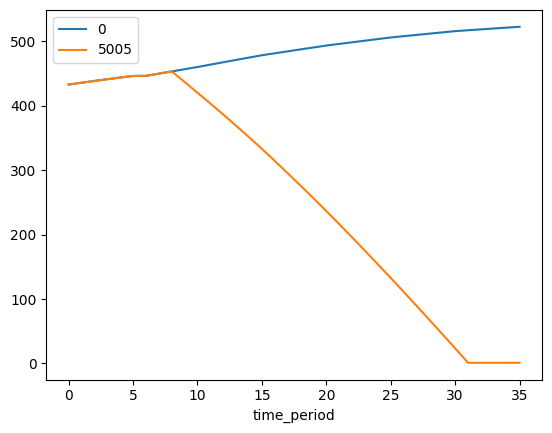

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [47]:
key = "this"
def func(**kwargs):
    for k in kwargs.keys():
        val = kwargs.get(k)
        print(f"{k}:\t{val}")
        
func(**{"strategy_id": 0, "primary_id": 2})

strategy_id:	0
primary_id:	2


In [25]:
importlib.reload(sa)
importlib.reload(me)

model_energy = me.NonElectricEnergy(sa.model_attributes)
model_afolu = mafl.AFOLU(sa.model_attributes)
model_ippu = mi.IPPU(sa.model_attributes)
model_ce = mce.CircularEconomy(sa.model_attributes)


df_ins = df_input.copy()

# afolu
df_out_afolu = model_afolu.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_afolu,
    model_ce.integration_variables + model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# circular economy
df_out_ce = model_ce.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_ce,
    model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# ippu
if False:
    df_out_ippu = model_ippu.project(df_ins)
    df_ins = sa.model_attributes.transfer_df_variables(
        df_ins,
        df_out_ippu,
        model_energy.integration_variables_non_fgtv
    )

    df_out_energy = model_energy.project(df_ins)



In [95]:
#sa.model_attributes.get_subsector_variables("Carbon Capture and Sequestration")
subsec = "ccsq"

for subsec in ["ccsq", "scoe", "trns", "inen"]:
    check1 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if f"energy_demand_enfu_subsector_total_pj_{subsec}" in x]
    ].sum(axis = 1))

    check2 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
    ].sum(axis = 1))
    
    check3 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" in x)]
    ].sum(axis = 1))
    
    print(f"subsec {subsec}:")
    print(check1 - check2)
    print(check1 - check3)
    print("")

subsec ccsq:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

subsec scoe:
[ 0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00 -2.27373675e-13 -2.27373675e-13  0.00000000e+00
 -2.27373675e-13  0.00000000e+00  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[-2.27373675e-13 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0

In [63]:
print(subsec)
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
].sum(axis = 1)

df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
]
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
]

inen


,energy_demand_enfu_subsector_total_pj_inen_fuel_biofuels,energy_demand_enfu_subsector_total_pj_inen_fuel_biogas,energy_demand_enfu_subsector_total_pj_inen_fuel_biomass,energy_demand_enfu_subsector_total_pj_inen_fuel_coal,energy_demand_enfu_subsector_total_pj_inen_fuel_coke,energy_demand_enfu_subsector_total_pj_inen_fuel_diesel,energy_demand_enfu_subsector_total_pj_inen_fuel_electricity,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_furnace,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_petroleum_liquid,energy_demand_enfu_subsector_total_pj_inen_fuel_gasoline,...,energy_demand_enfu_subsector_total_pj_inen_fuel_hydropower,energy_demand_enfu_subsector_total_pj_inen_fuel_kerosene,energy_demand_enfu_subsector_total_pj_inen_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_inen_fuel_nuclear,energy_demand_enfu_subsector_total_pj_inen_fuel_ocean,energy_demand_enfu_subsector_total_pj_inen_fuel_oil,energy_demand_enfu_subsector_total_pj_inen_fuel_other,energy_demand_enfu_subsector_total_pj_inen_fuel_solar,energy_demand_enfu_subsector_total_pj_inen_fuel_waste,energy_demand_enfu_subsector_total_pj_inen_fuel_wind
0,0.0,0.0,2392.550271,1156.498987,977.969437,1.795398,5660.577095,264.509709,0.126464,0.241881,...,0.0,0.0,7676.644206,0.0,0.0,6992.150941,0.0,25.121778,0.0,0.0
1,0.0,0.0,2390.047010,1155.288973,976.932265,1.802197,5654.652551,264.226550,0.126943,0.242797,...,0.0,0.0,7668.603903,0.0,0.0,6984.826270,0.0,25.095494,0.0,0.0
2,0.0,0.0,2387.535988,1154.075208,975.892071,1.801933,5648.705836,263.942613,0.126925,0.242762,...,0.0,0.0,7660.538798,0.0,0.0,6977.479001,0.0,25.069128,0.0,0.0
3,0.0,0.0,2385.017195,1152.857687,974.848951,1.807626,5642.744148,263.657947,0.127326,0.243529,...,0.0,0.0,7652.448915,0.0,0.0,6970.109206,0.0,25.042681,0.0,0.0
4,0.0,0.0,2382.490633,1151.636410,973.803042,1.810135,5636.762524,263.372617,0.127503,0.243867,...,0.0,0.0,7644.334349,0.0,0.0,6962.716958,0.0,25.016152,0.0,0.0
5,0.0,0.0,2379.956288,1150.411371,972.754439,1.848598,5630.782554,263.086672,0.130212,0.249049,...,0.0,0.0,7636.195115,0.0,0.0,6955.302400,0.0,24.989541,0.0,0.0
6,0.0,0.0,2389.686941,1155.114925,976.744397,1.888368,5653.827919,264.166795,0.133013,0.254407,...,0.0,0.0,7667.423370,0.0,0.0,6983.747337,0.0,25.091713,0.0,0.0
7,0.0,0.0,2399.293969,1159.758722,980.671442,1.929625,5676.575460,265.227176,0.135919,0.259965,...,0.0,0.0,7698.247286,0.0,0.0,7011.822795,0.0,25.192587,0.0,0.0
8,0.0,0.0,2408.786445,1164.347148,984.551620,1.972318,5699.052796,266.274868,0.138926,0.265717,...,0.0,0.0,7728.703626,0.0,0.0,7039.563453,0.0,25.292258,0.0,0.0
9,0.0,0.0,2418.167497,1168.881714,988.386211,2.016493,5721.267356,267.310219,0.142038,0.271668,...,0.0,0.0,7758.802431,0.0,0.0,7066.978456,0.0,25.390759,0.0,0.0


In [77]:
import inspect
import time
inspect.getmembers(sisepuede.database.db)

dir_exp = os.path.join(sisepuede.file_struct.dir_out, f"csvs_{sisepuede.analysis_id.id_fs_safe}")
if not os.path.exists(dir_exp):
    os.makedirs(dir_exp, exist_ok = True)
    
t0 = time.time()
for k in sisepuede.database.db.dict_iterative_database_tables:
    
    print(f"Starting table {k}...")
    
    fp_write = os.path.join(dir_exp, f"{k}.csv")
    
    if not os.path.exists(fp_write):
        idt = sisepuede.database.db.dict_iterative_database_tables.get(k)
        tab = idt.read_table()

        tab.to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        ) if (tab is not None) else None
    
    t_elapse = np.round(time.time() - t0, decimals = 4)
    print(f"Table {k} complete at {t_elapse} seconds.\n\n")
    


Starting table ANALYSIS_METADATA...
Table ANALYSIS_METADATA complete at 0.0016 seconds.


Starting table ATTRIBUTE_DESIGN...
Table ATTRIBUTE_DESIGN complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES...
Table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS...
Table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS complete at 0.0018 seconds.


Starting table ATTRIBUTE_PRIMARY...
Table ATTRIBUTE_PRIMARY complete at 0.0019 seconds.


Starting table ATTRIBUTE_STRATEGY...
Table ATTRIBUTE_STRATEGY complete at 0.0019 seconds.


Starting table MODEL_BASE_INPUT_DATABASE...
Table MODEL_BASE_INPUT_DATABASE complete at 0.002 seconds.


Starting table MODEL_INPUT...
Table MODEL_INPUT complete at 0.0022 seconds.


Starting table MODEL_OUTPUT...
Table MODEL_OUTPUT complete at 23.5008 seconds.




In [64]:
df = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").read_table();


##  RUBBER AND LEATHER ISSUES

In [ ]:
dict_inputs = sisepuede.generate_scenario_database_from_primary_key(0);


In [30]:
region_check = "brazil"
df_input_check = dict_inputs.get(region_check)
df_output_check = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin([region_check])
].reset_index(drop = True)

In [31]:
df_input_check[[x for x in df_input_check.columns if "rubber" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,demscalar_ippu_rubber_and_leather,ef_waso_incineration_tonne_n2o_per_tonne_rubber_leather,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_waso_msw_to_gdppc_rubber_leather,factor_waso_waste_per_capita_scalar_rubber_leather,frac_inen_energy_recycled_rubber_and_leather_coal,frac_inen_energy_recycled_rubber_and_leather_coke,frac_inen_energy_recycled_rubber_and_leather_diesel,...,frac_waso_recycled_rubber_leather,physparam_waso_k_rubber_leather,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_rubber_and_leather_tonne,qty_ippu_recycled_rubber_and_leather_tonne_cod_per_m3_ww,qty_ippu_rubber_and_leather_tonne_cod_per_m3_ww,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_rubber_and_leather,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production
0,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.050828,0.005648,0.000187,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
1,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
2,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
3,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
4,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182


In [32]:
df_input_check[[x for x in df_input_check.columns if "cement" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,dem_ippu_average_materials_tonne_per_household_cement,demscalar_ippu_cement,ef_ippu_tonne_co2_per_tonne_production_cement_clinker,elasticity_ippu_cement_production_to_gdp,frac_inen_energy_cement_coal,frac_inen_energy_cement_coke,frac_inen_energy_cement_diesel,frac_inen_energy_cement_electricity,frac_inen_energy_cement_gas_furnace,...,frac_inen_energy_cement_natural_gas,frac_inen_energy_cement_oil,frac_inen_energy_cement_solar,frac_inen_energy_cement_solid_biomass,frac_ippu_cement_clinker,net_imports_cement_clinker_tonne,prodinit_ippu_cement_tonne,qty_ippu_cement_tonne_cod_per_m3_ww,scalar_inen_energy_demand_cement,vol_ippu_cement_m3_ww_per_tonne_production
0,0.02,3.0,0.995377,0.264371,0.25,0.318215,0.035357,0.059189,0.158820,0.0,...,0.064766,0.276215,0.0,0.028249,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
1,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
2,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
3,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
4,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123


In [28]:
df_input_check[[x for x in df_input_check.columns if ("rubber" in x) and x.startswith("frac_waso")]].head()

,frac_waso_initial_composition_ind_rubber_leather,frac_waso_initial_composition_mun_rubber_leather,frac_waso_recycled_rubber_leather
0,0.0,0.0,0.066
1,0.0,0.0,0.066
2,0.0,0.0,0.066
3,0.0,0.0,0.066
4,0.0,0.0,0.066


In [27]:
import inspect
import sqlalchemy
import sql_utilities as sq
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)



In [43]:
df_iar = sq.sql_table_to_df(
    engine,
    "InputActivityRatio"
    #"InputActivityRatio"
)
df_oar = sq.sql_table_to_df(
    engine,
    "OutputActivityRatio"
    #"InputActivityRatio"
)
df_oar

,id,r,t,f,m,y,val
0,1,costa_rica,pp_biogas,fuel_electricity,generate,1000,1.0
1,2,costa_rica,pp_biogas,fuel_electricity,generate,1001,1.0
2,3,costa_rica,pp_biogas,fuel_electricity,generate,1002,1.0
3,4,costa_rica,pp_biogas,fuel_electricity,generate,1003,1.0
4,5,costa_rica,pp_biogas,fuel_electricity,generate,1004,1.0
...,...,...,...,...,...,...,...
967,968,costa_rica,supply_fuel_wind,fuel_wind,generate,1031,1.0
968,969,costa_rica,supply_fuel_wind,fuel_wind,generate,1032,1.0
969,970,costa_rica,supply_fuel_wind,fuel_wind,generate,1033,1.0
970,971,costa_rica,supply_fuel_wind,fuel_wind,generate,1034,1.0


In [2]:
sq.sql_table_to_df(
    engine,
    "FUELS"
    #"InputActivityRatio"
)

NameError: name 'sq' is not defined

In [36]:
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR

In [16]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

In [38]:
df_try[[
    x for x in df_try.columns if ("aviation" in x)
]];
# occrate in aviation is 
df_try2 = df_try[
    df_try["time_period"].isin([0, 1, 2]) & 
    df_try["strategy_id"].isin([0])
].reset_index(drop = True);

df_try2[[
    x for x in df_try2.columns if ("trde" in x)
]]


,deminit_trde_freight_mt_km,deminit_trde_private_and_public_per_capita_passenger_km,deminit_trde_regional_per_capita_passenger_km,demscalar_trde_freight,demscalar_trde_private_and_public,demscalar_trde_regional,elasticity_trde_mtkm_to_gdp_freight,elasticity_trde_pkm_to_gdppc_private_and_public,elasticity_trde_pkm_to_gdppc_regional
0,1.988759e+06,0.008526,0.005480,1.0,1.0,1.0,1.0,0.14,0.3
1,1.955245e+06,0.008501,0.005401,1.0,1.0,1.0,1.0,0.14,0.3
2,1.955245e+06,0.008501,0.005401,1.0,1.0,1.0,1.0,0.14,0.3


In [25]:
df_check = df_out[
    df_out["region"].isin(["brazil"]) &
    df_out["primary_id"].isin([0])
].reset_index(drop = True)
df_check[[
    x for x in df_check.columns if ("regional" in x) and ("trde" in x)
]]


,dem_trde_regional_passenger_km
0,1.120458e+06
1,1.125540e+06
2,1.130507e+06
3,1.135304e+06
4,1.139856e+06
5,1.144110e+06
6,1.147918e+06
7,1.158527e+06
8,1.169114e+06
9,1.179678e+06


In [36]:
df_check[
    df_check["time_period"].isin([0, 2])
][[
    x for x in df_check.columns if ("emission" in x) and ("trns" in x)
]]

,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
0,4.865727e-09,0.0,1.978793e-08,0.000002,0.012289,0.000004,0.455738,0.000004,0.000005,0.000139,...,0.0,5.395002e-08,0.000012,0.828718,0.000241,1.586244,0.000032,0.000013,0.000389,95.992430
2,4.909364e-09,0.0,2.004421e-08,0.000002,0.012187,0.000004,0.087895,0.000004,0.000005,0.000138,...,0.0,5.464875e-08,0.000012,0.821786,0.000248,0.578974,0.000033,0.000013,0.000386,47.141113


In [54]:
flds = list(df_try2.columns)#[x for x in df_try2.columns if ("road_heavy_freight" in x)]
fld_check = []

for fld in flds:
    vec = np.array(df_try2[fld])
    v0, v2 = vec[0], vec[2]
    delta = np.abs(vec[2]/vec[0] - 1)
    
    if (delta > 0.05) and (("trns" in fld) or ("trde" in fld)):
        print(f"field '{fld}':\n\tv0:\t{v0}\n\tv2:\t{v2}\n")
        fld_check.append(fld)

field 'frac_trns_fuelmix_public_electricity':
	v0:	0.0014800197335964
	v2:	0.0009078529278256

field 'frac_trns_fuelmix_road_light_diesel':
	v0:	0.0273322508679524
	v2:	0.0291327470632048

field 'frac_trns_fuelmix_road_light_electricity':
	v0:	0.0002244135545786
	v2:	0.000431209084138

